### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

### Reading Dataset

In [2]:
df = pd.read_csv("../data/customer_booking.csv",encoding='latin-1')

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [3]:
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay   
0               2      Internet  RoundTrip            262              19  \
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage   
0            7        Sat  AKLDEL    New Zealand                    1  \
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration   
0                     0                      0             5.52  \
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [4]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

No null values!

In [5]:
df["sales_channel"].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [6]:
sales_mapping = {
    "Internet": 1,
    "Mobile": 2
}

df["sales_channel"] = df["sales_channel"].map(sales_mapping)

In [7]:
df.head()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay   
0               2              1  RoundTrip            262              19  \
1               1              1  RoundTrip            112              20   
2               2              1  RoundTrip            243              22   
3               1              1  RoundTrip             96              31   
4               2              1  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage   
0            7        Sat  AKLDEL    New Zealand                    1  \
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration   
0                     0                      0             5.52  \
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [8]:
df["trip_type"].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [9]:
trip_mapping = {
    "RoundTrip": 1,
    "OneWay": 2,
    "CircleTrip": 3
}

df["trip_type"] = df["trip_type"].map(trip_mapping)

In [10]:
df.head()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay   
0               2              1          1            262              19  \
1               1              1          1            112              20   
2               2              1          1            243              22   
3               1              1          1             96              31   
4               2              1          1             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage   
0            7        Sat  AKLDEL    New Zealand                    1  \
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration   
0                     0                      0             5.52  \
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [11]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [12]:
day_mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(day_mapping)

In [13]:
df["route"].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [14]:
route_map = LabelEncoder()

route_map.fit(df['route'])

LabelEncoder()

In [15]:
df["route"] = route_map.transform(df['route'])

In [16]:
df["booking_origin"].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [17]:
booking_map = LabelEncoder()

booking_map.fit(df['booking_origin'])

LabelEncoder()

In [18]:
df['booking_origin'] = booking_map.transform(df['booking_origin'])

In [19]:
df.head()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay   
0               2              1          1            262              19  \
1               1              1          1            112              20   
2               2              1          1            243              22   
3               1              1          1             96              31   
4               2              1          1             68              22   

   flight_hour  flight_day  route  booking_origin  wants_extra_baggage   
0            7           6      0              61                    1  \
1            3           6      0              61                    0   
2           17           3      0              36                    1   
3            4           6      0              61                    0   
4           15           3      0              36                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration   
0                     0                      0             5.52  \
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

### Correlation plot

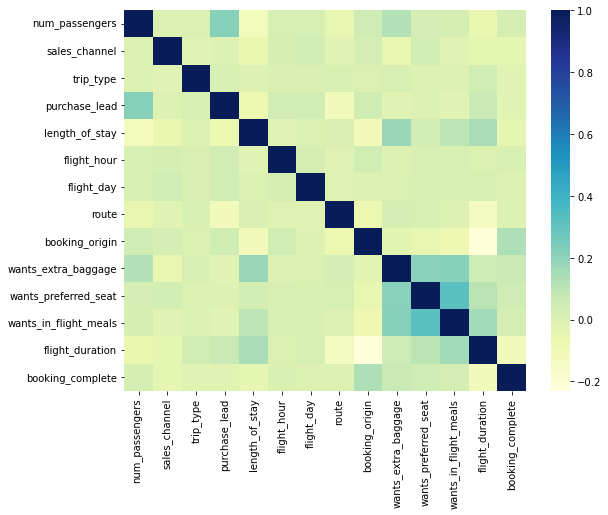

In [20]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

No columns are correlated. We don't have to get rid of any column

Checking the distribution of target

In [21]:
df["booking_complete"].value_counts()*100/df.shape[0]

booking_complete
0    85.044
1    14.956
Name: count, dtype: float64

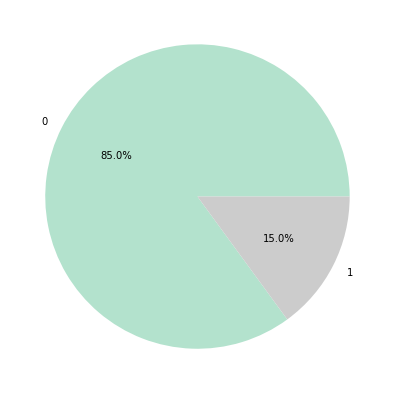

In [22]:
plt.figure(figsize=(9,7))
df.groupby('booking_complete').size().plot(kind='pie',
                                        autopct='%1.1f%%',
                                          cmap='Pastel2')
plt.show()

Since 85% of the data has target 0, this might bias the results.\
We have to either upsample or downsample.\
But, downsample will lead of loss of data. Hence, we are going to upsample the data.

In [23]:
booking0 = df[df['booking_complete']==0]
booking1 = df[df['booking_complete']==1]

In [24]:
from sklearn.utils import resample

booking1_upsample = resample(booking1,
                            replace=True,
                            n_samples = len(booking0),
                            random_state=98)
booking1_upsample.shape

(42522, 14)

In [25]:
data = pd.concat([booking0, booking1_upsample])

In [26]:
data.shape

(85044, 14)

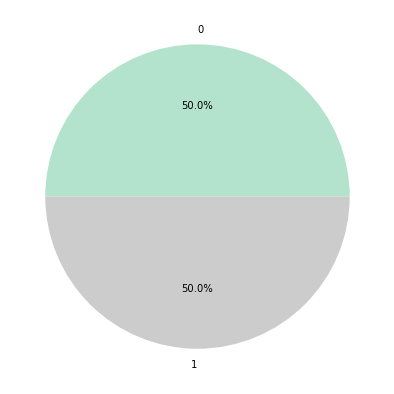

In [27]:
plt.figure(figsize=(9,7))
data.groupby('booking_complete').size().plot(kind='pie',
                                        autopct='%1.1f%%',
                                          cmap='Pastel2')
plt.show()

### Split the dataset

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [30]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=98)

### Binary Classification

- Logistic Regression
- Naive Bayes
- Decision Tree
- K nearest neighbors
- Multi Layer Perceptron

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()

x_train_ = sc.fit_transform(x_train)
x_test_ = sc.transform(x_test)

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression()

lr.fit(x_train_,y_train)

lr_pred = lr.predict(x_test_)

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      6287
           1       0.64      0.65      0.64      6470

    accuracy                           0.63     12757
   macro avg       0.63      0.63      0.63     12757
weighted avg       0.63      0.63      0.63     12757



### Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
nb = GaussianNB()

nb.fit(x_train_,y_train)

nb_pred = nb.predict(x_test_)

print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46      6287
           1       0.57      0.85      0.68      6470

    accuracy                           0.60     12757
   macro avg       0.63      0.60      0.57     12757
weighted avg       0.63      0.60      0.58     12757



### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_,y_train)

dtc_pred = dtc.predict(x_test_)

print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      6287
           1       0.89      0.99      0.94      6470

    accuracy                           0.93     12757
   macro avg       0.94      0.93      0.93     12757
weighted avg       0.94      0.93      0.93     12757



In [76]:
dtc_pred[:10],y_test[:10]

(array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0]), array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0]))

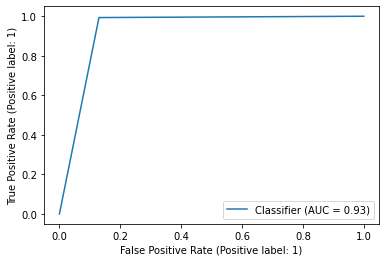

In [82]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, dtc_pred)
plt.show()

In [83]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc, x_train_, y_train, cv=5)

array([0.91063771, 0.91665514, 0.91346752, 0.91035485, 0.91381338])

In [84]:
cross_val_score(dtc, x_test_, y_test, cv=5)

array([0.72923197, 0.71826019, 0.74598197, 0.74010192, 0.72128577])

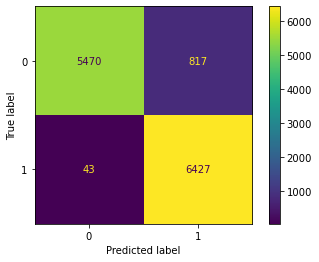

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, dtc_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dtc.classes_)
disp.plot()
plt.show()

### K nearest neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier()

knn.fit(x_train_,y_train)

knn_pred = knn.predict(x_test_)

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      6287
           1       0.74      0.94      0.83      6470

    accuracy                           0.81     12757
   macro avg       0.83      0.80      0.80     12757
weighted avg       0.83      0.81      0.80     12757



### Multi Layer Perceptron

In [48]:
import torch
from torch import nn

In [49]:
class LogisticRegression(torch.nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.linear = torch.nn.Linear(num_features,1)
        
    def forward(self,x):
        logits = self.linear(x)
        probas = torch.sigmoid(logits)
        return probas

In [50]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self,X,y):
        """ Assigns labels(y) are features (x)"""
        self.features = torch.tensor(X, dtype=torch.float32)
        self.labels = torch.tensor(y, dtype=torch.float32)
        
    def __getitem__(self,index):
        """ fetches individual training records"""
        x = self.features[index]
        y = self.labels[index]
        return x,y
    
    def __len__(self):
        """length of the dataset"""
        return self.labels.shape[0]
    
#initialise dataset
train_ds = MyDataset(x_train_, y_train)

#wrap it in  the dataloader
train_loader = DataLoader(dataset=train_ds,
                         batch_size=10,
                         shuffle=True)

In [61]:
import torch.nn.functional as F

torch.manual_seed(0)
model = LogisticRegression(num_features=x_train.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr =0.01)

num_epochs = 10

for epoch in range(num_epochs):
    
    model = model.train()
    for batch_idx, (features,class_labels) in enumerate(train_loader):
         
            probas = model(features)
            
            loss = F.binary_cross_entropy(probas , class_labels.view(probas.shape))
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            print(f"Epoch {epoch+1}/{num_epochs}|\
Batch {batch_idx}/{len(train_loader)}|\
Loss : {loss:.2f}")

Epoch 1/20|Batch 0/7229|Loss : 0.62
Epoch 1/20|Batch 1/7229|Loss : 0.82
Epoch 1/20|Batch 2/7229|Loss : 0.63
Epoch 1/20|Batch 3/7229|Loss : 0.70
Epoch 1/20|Batch 4/7229|Loss : 0.79
Epoch 1/20|Batch 5/7229|Loss : 0.53
Epoch 1/20|Batch 6/7229|Loss : 0.79
Epoch 1/20|Batch 7/7229|Loss : 0.83
Epoch 1/20|Batch 8/7229|Loss : 0.83
Epoch 1/20|Batch 9/7229|Loss : 0.77
Epoch 1/20|Batch 10/7229|Loss : 0.71
Epoch 1/20|Batch 11/7229|Loss : 0.60
Epoch 1/20|Batch 12/7229|Loss : 0.71
Epoch 1/20|Batch 13/7229|Loss : 0.61
Epoch 1/20|Batch 14/7229|Loss : 0.76
Epoch 1/20|Batch 15/7229|Loss : 0.80
Epoch 1/20|Batch 16/7229|Loss : 0.74
Epoch 1/20|Batch 17/7229|Loss : 0.73
Epoch 1/20|Batch 18/7229|Loss : 0.79
Epoch 1/20|Batch 19/7229|Loss : 0.71
Epoch 1/20|Batch 20/7229|Loss : 0.84
Epoch 1/20|Batch 21/7229|Loss : 0.57
Epoch 1/20|Batch 22/7229|Loss : 0.62
Epoch 1/20|Batch 23/7229|Loss : 0.74
Epoch 1/20|Batch 24/7229|Loss : 0.65
Epoch 1/20|Batch 25/7229|Loss : 0.64
Epoch 1/20|Batch 26/7229|Loss : 0.57
Epoch 1/20|

Epoch 1/20|Batch 749/7229|Loss : 0.65
Epoch 1/20|Batch 750/7229|Loss : 0.69
Epoch 1/20|Batch 751/7229|Loss : 0.63
Epoch 1/20|Batch 752/7229|Loss : 0.75
Epoch 1/20|Batch 753/7229|Loss : 0.63
Epoch 1/20|Batch 754/7229|Loss : 0.50
Epoch 1/20|Batch 755/7229|Loss : 0.57
Epoch 1/20|Batch 756/7229|Loss : 0.75
Epoch 1/20|Batch 757/7229|Loss : 0.66
Epoch 1/20|Batch 758/7229|Loss : 0.75
Epoch 1/20|Batch 759/7229|Loss : 0.65
Epoch 1/20|Batch 760/7229|Loss : 0.68
Epoch 1/20|Batch 761/7229|Loss : 0.65
Epoch 1/20|Batch 762/7229|Loss : 0.70
Epoch 1/20|Batch 763/7229|Loss : 0.59
Epoch 1/20|Batch 764/7229|Loss : 0.62
Epoch 1/20|Batch 765/7229|Loss : 0.58
Epoch 1/20|Batch 766/7229|Loss : 0.71
Epoch 1/20|Batch 767/7229|Loss : 0.83
Epoch 1/20|Batch 768/7229|Loss : 0.62
Epoch 1/20|Batch 769/7229|Loss : 0.66
Epoch 1/20|Batch 770/7229|Loss : 0.75
Epoch 1/20|Batch 771/7229|Loss : 0.70
Epoch 1/20|Batch 772/7229|Loss : 0.74
Epoch 1/20|Batch 773/7229|Loss : 0.77
Epoch 1/20|Batch 774/7229|Loss : 0.76
Epoch 1/20|B

Epoch 1/20|Batch 1465/7229|Loss : 0.64
Epoch 1/20|Batch 1466/7229|Loss : 0.71
Epoch 1/20|Batch 1467/7229|Loss : 0.57
Epoch 1/20|Batch 1468/7229|Loss : 0.70
Epoch 1/20|Batch 1469/7229|Loss : 0.60
Epoch 1/20|Batch 1470/7229|Loss : 0.57
Epoch 1/20|Batch 1471/7229|Loss : 0.70
Epoch 1/20|Batch 1472/7229|Loss : 0.61
Epoch 1/20|Batch 1473/7229|Loss : 0.65
Epoch 1/20|Batch 1474/7229|Loss : 0.59
Epoch 1/20|Batch 1475/7229|Loss : 0.57
Epoch 1/20|Batch 1476/7229|Loss : 0.62
Epoch 1/20|Batch 1477/7229|Loss : 0.60
Epoch 1/20|Batch 1478/7229|Loss : 0.63
Epoch 1/20|Batch 1479/7229|Loss : 0.78
Epoch 1/20|Batch 1480/7229|Loss : 0.67
Epoch 1/20|Batch 1481/7229|Loss : 0.65
Epoch 1/20|Batch 1482/7229|Loss : 0.53
Epoch 1/20|Batch 1483/7229|Loss : 0.63
Epoch 1/20|Batch 1484/7229|Loss : 0.51
Epoch 1/20|Batch 1485/7229|Loss : 0.61
Epoch 1/20|Batch 1486/7229|Loss : 0.78
Epoch 1/20|Batch 1487/7229|Loss : 0.75
Epoch 1/20|Batch 1488/7229|Loss : 0.59
Epoch 1/20|Batch 1489/7229|Loss : 0.64
Epoch 1/20|Batch 1490/722

Epoch 1/20|Batch 2181/7229|Loss : 0.70
Epoch 1/20|Batch 2182/7229|Loss : 0.64
Epoch 1/20|Batch 2183/7229|Loss : 0.70
Epoch 1/20|Batch 2184/7229|Loss : 0.73
Epoch 1/20|Batch 2185/7229|Loss : 0.64
Epoch 1/20|Batch 2186/7229|Loss : 0.73
Epoch 1/20|Batch 2187/7229|Loss : 0.67
Epoch 1/20|Batch 2188/7229|Loss : 0.70
Epoch 1/20|Batch 2189/7229|Loss : 0.84
Epoch 1/20|Batch 2190/7229|Loss : 0.64
Epoch 1/20|Batch 2191/7229|Loss : 0.81
Epoch 1/20|Batch 2192/7229|Loss : 0.70
Epoch 1/20|Batch 2193/7229|Loss : 0.66
Epoch 1/20|Batch 2194/7229|Loss : 0.55
Epoch 1/20|Batch 2195/7229|Loss : 0.59
Epoch 1/20|Batch 2196/7229|Loss : 0.80
Epoch 1/20|Batch 2197/7229|Loss : 0.64
Epoch 1/20|Batch 2198/7229|Loss : 0.64
Epoch 1/20|Batch 2199/7229|Loss : 0.77
Epoch 1/20|Batch 2200/7229|Loss : 0.76
Epoch 1/20|Batch 2201/7229|Loss : 0.69
Epoch 1/20|Batch 2202/7229|Loss : 0.50
Epoch 1/20|Batch 2203/7229|Loss : 0.65
Epoch 1/20|Batch 2204/7229|Loss : 0.69
Epoch 1/20|Batch 2205/7229|Loss : 0.51
Epoch 1/20|Batch 2206/722

Epoch 1/20|Batch 2852/7229|Loss : 0.71
Epoch 1/20|Batch 2853/7229|Loss : 0.70
Epoch 1/20|Batch 2854/7229|Loss : 0.53
Epoch 1/20|Batch 2855/7229|Loss : 0.72
Epoch 1/20|Batch 2856/7229|Loss : 0.45
Epoch 1/20|Batch 2857/7229|Loss : 0.64
Epoch 1/20|Batch 2858/7229|Loss : 0.67
Epoch 1/20|Batch 2859/7229|Loss : 0.50
Epoch 1/20|Batch 2860/7229|Loss : 0.68
Epoch 1/20|Batch 2861/7229|Loss : 0.71
Epoch 1/20|Batch 2862/7229|Loss : 0.57
Epoch 1/20|Batch 2863/7229|Loss : 0.59
Epoch 1/20|Batch 2864/7229|Loss : 0.67
Epoch 1/20|Batch 2865/7229|Loss : 0.65
Epoch 1/20|Batch 2866/7229|Loss : 0.81
Epoch 1/20|Batch 2867/7229|Loss : 0.58
Epoch 1/20|Batch 2868/7229|Loss : 0.70
Epoch 1/20|Batch 2869/7229|Loss : 0.52
Epoch 1/20|Batch 2870/7229|Loss : 0.48
Epoch 1/20|Batch 2871/7229|Loss : 0.65
Epoch 1/20|Batch 2872/7229|Loss : 0.63
Epoch 1/20|Batch 2873/7229|Loss : 0.79
Epoch 1/20|Batch 2874/7229|Loss : 0.61
Epoch 1/20|Batch 2875/7229|Loss : 0.63
Epoch 1/20|Batch 2876/7229|Loss : 0.53
Epoch 1/20|Batch 2877/722

Epoch 1/20|Batch 3557/7229|Loss : 0.72
Epoch 1/20|Batch 3558/7229|Loss : 0.82
Epoch 1/20|Batch 3559/7229|Loss : 0.82
Epoch 1/20|Batch 3560/7229|Loss : 0.51
Epoch 1/20|Batch 3561/7229|Loss : 0.63
Epoch 1/20|Batch 3562/7229|Loss : 0.73
Epoch 1/20|Batch 3563/7229|Loss : 0.54
Epoch 1/20|Batch 3564/7229|Loss : 0.62
Epoch 1/20|Batch 3565/7229|Loss : 0.72
Epoch 1/20|Batch 3566/7229|Loss : 0.59
Epoch 1/20|Batch 3567/7229|Loss : 0.69
Epoch 1/20|Batch 3568/7229|Loss : 0.81
Epoch 1/20|Batch 3569/7229|Loss : 0.58
Epoch 1/20|Batch 3570/7229|Loss : 0.65
Epoch 1/20|Batch 3571/7229|Loss : 0.63
Epoch 1/20|Batch 3572/7229|Loss : 0.54
Epoch 1/20|Batch 3573/7229|Loss : 0.67
Epoch 1/20|Batch 3574/7229|Loss : 0.62
Epoch 1/20|Batch 3575/7229|Loss : 0.83
Epoch 1/20|Batch 3576/7229|Loss : 0.66
Epoch 1/20|Batch 3577/7229|Loss : 0.54
Epoch 1/20|Batch 3578/7229|Loss : 0.57
Epoch 1/20|Batch 3579/7229|Loss : 0.52
Epoch 1/20|Batch 3580/7229|Loss : 0.48
Epoch 1/20|Batch 3581/7229|Loss : 0.74
Epoch 1/20|Batch 3582/722

Epoch 1/20|Batch 4251/7229|Loss : 0.70
Epoch 1/20|Batch 4252/7229|Loss : 0.78
Epoch 1/20|Batch 4253/7229|Loss : 0.64
Epoch 1/20|Batch 4254/7229|Loss : 0.51
Epoch 1/20|Batch 4255/7229|Loss : 0.64
Epoch 1/20|Batch 4256/7229|Loss : 0.59
Epoch 1/20|Batch 4257/7229|Loss : 0.62
Epoch 1/20|Batch 4258/7229|Loss : 0.60
Epoch 1/20|Batch 4259/7229|Loss : 0.78
Epoch 1/20|Batch 4260/7229|Loss : 0.68
Epoch 1/20|Batch 4261/7229|Loss : 0.51
Epoch 1/20|Batch 4262/7229|Loss : 0.64
Epoch 1/20|Batch 4263/7229|Loss : 0.62
Epoch 1/20|Batch 4264/7229|Loss : 0.56
Epoch 1/20|Batch 4265/7229|Loss : 0.72
Epoch 1/20|Batch 4266/7229|Loss : 0.62
Epoch 1/20|Batch 4267/7229|Loss : 0.47
Epoch 1/20|Batch 4268/7229|Loss : 0.75
Epoch 1/20|Batch 4269/7229|Loss : 0.68
Epoch 1/20|Batch 4270/7229|Loss : 0.54
Epoch 1/20|Batch 4271/7229|Loss : 0.63
Epoch 1/20|Batch 4272/7229|Loss : 0.66
Epoch 1/20|Batch 4273/7229|Loss : 0.55
Epoch 1/20|Batch 4274/7229|Loss : 0.57
Epoch 1/20|Batch 4275/7229|Loss : 0.54
Epoch 1/20|Batch 4276/722

Epoch 1/20|Batch 4962/7229|Loss : 0.59
Epoch 1/20|Batch 4963/7229|Loss : 0.63
Epoch 1/20|Batch 4964/7229|Loss : 0.53
Epoch 1/20|Batch 4965/7229|Loss : 0.61
Epoch 1/20|Batch 4966/7229|Loss : 0.62
Epoch 1/20|Batch 4967/7229|Loss : 0.84
Epoch 1/20|Batch 4968/7229|Loss : 0.63
Epoch 1/20|Batch 4969/7229|Loss : 0.85
Epoch 1/20|Batch 4970/7229|Loss : 0.72
Epoch 1/20|Batch 4971/7229|Loss : 0.62
Epoch 1/20|Batch 4972/7229|Loss : 0.64
Epoch 1/20|Batch 4973/7229|Loss : 0.65
Epoch 1/20|Batch 4974/7229|Loss : 0.76
Epoch 1/20|Batch 4975/7229|Loss : 0.65
Epoch 1/20|Batch 4976/7229|Loss : 0.62
Epoch 1/20|Batch 4977/7229|Loss : 0.72
Epoch 1/20|Batch 4978/7229|Loss : 0.62
Epoch 1/20|Batch 4979/7229|Loss : 0.64
Epoch 1/20|Batch 4980/7229|Loss : 0.76
Epoch 1/20|Batch 4981/7229|Loss : 0.60
Epoch 1/20|Batch 4982/7229|Loss : 0.63
Epoch 1/20|Batch 4983/7229|Loss : 0.85
Epoch 1/20|Batch 4984/7229|Loss : 0.58
Epoch 1/20|Batch 4985/7229|Loss : 0.57
Epoch 1/20|Batch 4986/7229|Loss : 0.62
Epoch 1/20|Batch 4987/722

Epoch 1/20|Batch 5635/7229|Loss : 0.74
Epoch 1/20|Batch 5636/7229|Loss : 0.72
Epoch 1/20|Batch 5637/7229|Loss : 0.63
Epoch 1/20|Batch 5638/7229|Loss : 0.61
Epoch 1/20|Batch 5639/7229|Loss : 0.78
Epoch 1/20|Batch 5640/7229|Loss : 0.63
Epoch 1/20|Batch 5641/7229|Loss : 0.63
Epoch 1/20|Batch 5642/7229|Loss : 0.65
Epoch 1/20|Batch 5643/7229|Loss : 0.73
Epoch 1/20|Batch 5644/7229|Loss : 0.59
Epoch 1/20|Batch 5645/7229|Loss : 0.70
Epoch 1/20|Batch 5646/7229|Loss : 0.75
Epoch 1/20|Batch 5647/7229|Loss : 0.55
Epoch 1/20|Batch 5648/7229|Loss : 0.70
Epoch 1/20|Batch 5649/7229|Loss : 0.70
Epoch 1/20|Batch 5650/7229|Loss : 0.72
Epoch 1/20|Batch 5651/7229|Loss : 0.62
Epoch 1/20|Batch 5652/7229|Loss : 0.62
Epoch 1/20|Batch 5653/7229|Loss : 0.66
Epoch 1/20|Batch 5654/7229|Loss : 0.68
Epoch 1/20|Batch 5655/7229|Loss : 0.65
Epoch 1/20|Batch 5656/7229|Loss : 0.61
Epoch 1/20|Batch 5657/7229|Loss : 0.68
Epoch 1/20|Batch 5658/7229|Loss : 0.67
Epoch 1/20|Batch 5659/7229|Loss : 0.65
Epoch 1/20|Batch 5660/722

Epoch 1/20|Batch 6283/7229|Loss : 0.70
Epoch 1/20|Batch 6284/7229|Loss : 0.66
Epoch 1/20|Batch 6285/7229|Loss : 0.60
Epoch 1/20|Batch 6286/7229|Loss : 0.50
Epoch 1/20|Batch 6287/7229|Loss : 0.69
Epoch 1/20|Batch 6288/7229|Loss : 0.55
Epoch 1/20|Batch 6289/7229|Loss : 0.61
Epoch 1/20|Batch 6290/7229|Loss : 0.59
Epoch 1/20|Batch 6291/7229|Loss : 0.86
Epoch 1/20|Batch 6292/7229|Loss : 0.61
Epoch 1/20|Batch 6293/7229|Loss : 0.80
Epoch 1/20|Batch 6294/7229|Loss : 0.59
Epoch 1/20|Batch 6295/7229|Loss : 0.64
Epoch 1/20|Batch 6296/7229|Loss : 0.54
Epoch 1/20|Batch 6297/7229|Loss : 0.50
Epoch 1/20|Batch 6298/7229|Loss : 0.76
Epoch 1/20|Batch 6299/7229|Loss : 0.58
Epoch 1/20|Batch 6300/7229|Loss : 0.64
Epoch 1/20|Batch 6301/7229|Loss : 0.60
Epoch 1/20|Batch 6302/7229|Loss : 0.66
Epoch 1/20|Batch 6303/7229|Loss : 0.65
Epoch 1/20|Batch 6304/7229|Loss : 0.74
Epoch 1/20|Batch 6305/7229|Loss : 0.60
Epoch 1/20|Batch 6306/7229|Loss : 0.73
Epoch 1/20|Batch 6307/7229|Loss : 0.89
Epoch 1/20|Batch 6308/722

Epoch 1/20|Batch 6931/7229|Loss : 0.56
Epoch 1/20|Batch 6932/7229|Loss : 0.53
Epoch 1/20|Batch 6933/7229|Loss : 0.57
Epoch 1/20|Batch 6934/7229|Loss : 0.75
Epoch 1/20|Batch 6935/7229|Loss : 0.59
Epoch 1/20|Batch 6936/7229|Loss : 0.59
Epoch 1/20|Batch 6937/7229|Loss : 0.66
Epoch 1/20|Batch 6938/7229|Loss : 0.56
Epoch 1/20|Batch 6939/7229|Loss : 0.63
Epoch 1/20|Batch 6940/7229|Loss : 0.73
Epoch 1/20|Batch 6941/7229|Loss : 0.71
Epoch 1/20|Batch 6942/7229|Loss : 0.76
Epoch 1/20|Batch 6943/7229|Loss : 0.64
Epoch 1/20|Batch 6944/7229|Loss : 0.63
Epoch 1/20|Batch 6945/7229|Loss : 0.75
Epoch 1/20|Batch 6946/7229|Loss : 0.77
Epoch 1/20|Batch 6947/7229|Loss : 0.84
Epoch 1/20|Batch 6948/7229|Loss : 0.66
Epoch 1/20|Batch 6949/7229|Loss : 0.56
Epoch 1/20|Batch 6950/7229|Loss : 0.70
Epoch 1/20|Batch 6951/7229|Loss : 0.69
Epoch 1/20|Batch 6952/7229|Loss : 0.59
Epoch 1/20|Batch 6953/7229|Loss : 0.71
Epoch 1/20|Batch 6954/7229|Loss : 0.76
Epoch 1/20|Batch 6955/7229|Loss : 0.65
Epoch 1/20|Batch 6956/722

Epoch 2/20|Batch 321/7229|Loss : 0.62
Epoch 2/20|Batch 322/7229|Loss : 0.61
Epoch 2/20|Batch 323/7229|Loss : 0.59
Epoch 2/20|Batch 324/7229|Loss : 0.67
Epoch 2/20|Batch 325/7229|Loss : 0.76
Epoch 2/20|Batch 326/7229|Loss : 0.77
Epoch 2/20|Batch 327/7229|Loss : 0.47
Epoch 2/20|Batch 328/7229|Loss : 0.74
Epoch 2/20|Batch 329/7229|Loss : 0.72
Epoch 2/20|Batch 330/7229|Loss : 0.70
Epoch 2/20|Batch 331/7229|Loss : 0.78
Epoch 2/20|Batch 332/7229|Loss : 0.54
Epoch 2/20|Batch 333/7229|Loss : 0.73
Epoch 2/20|Batch 334/7229|Loss : 0.56
Epoch 2/20|Batch 335/7229|Loss : 0.60
Epoch 2/20|Batch 336/7229|Loss : 0.69
Epoch 2/20|Batch 337/7229|Loss : 0.61
Epoch 2/20|Batch 338/7229|Loss : 1.03
Epoch 2/20|Batch 339/7229|Loss : 0.65
Epoch 2/20|Batch 340/7229|Loss : 0.60
Epoch 2/20|Batch 341/7229|Loss : 0.53
Epoch 2/20|Batch 342/7229|Loss : 0.51
Epoch 2/20|Batch 343/7229|Loss : 0.54
Epoch 2/20|Batch 344/7229|Loss : 0.69
Epoch 2/20|Batch 345/7229|Loss : 0.56
Epoch 2/20|Batch 346/7229|Loss : 0.77
Epoch 2/20|B

Epoch 2/20|Batch 1017/7229|Loss : 0.69
Epoch 2/20|Batch 1018/7229|Loss : 0.71
Epoch 2/20|Batch 1019/7229|Loss : 0.63
Epoch 2/20|Batch 1020/7229|Loss : 0.67
Epoch 2/20|Batch 1021/7229|Loss : 0.62
Epoch 2/20|Batch 1022/7229|Loss : 0.57
Epoch 2/20|Batch 1023/7229|Loss : 0.64
Epoch 2/20|Batch 1024/7229|Loss : 0.68
Epoch 2/20|Batch 1025/7229|Loss : 0.72
Epoch 2/20|Batch 1026/7229|Loss : 0.62
Epoch 2/20|Batch 1027/7229|Loss : 0.53
Epoch 2/20|Batch 1028/7229|Loss : 0.59
Epoch 2/20|Batch 1029/7229|Loss : 0.65
Epoch 2/20|Batch 1030/7229|Loss : 0.77
Epoch 2/20|Batch 1031/7229|Loss : 0.76
Epoch 2/20|Batch 1032/7229|Loss : 0.74
Epoch 2/20|Batch 1033/7229|Loss : 0.63
Epoch 2/20|Batch 1034/7229|Loss : 0.70
Epoch 2/20|Batch 1035/7229|Loss : 0.71
Epoch 2/20|Batch 1036/7229|Loss : 0.69
Epoch 2/20|Batch 1037/7229|Loss : 0.77
Epoch 2/20|Batch 1038/7229|Loss : 0.59
Epoch 2/20|Batch 1039/7229|Loss : 0.80
Epoch 2/20|Batch 1040/7229|Loss : 0.56
Epoch 2/20|Batch 1041/7229|Loss : 0.51
Epoch 2/20|Batch 1042/722

Epoch 2/20|Batch 1716/7229|Loss : 0.60
Epoch 2/20|Batch 1717/7229|Loss : 0.64
Epoch 2/20|Batch 1718/7229|Loss : 0.48
Epoch 2/20|Batch 1719/7229|Loss : 0.74
Epoch 2/20|Batch 1720/7229|Loss : 0.57
Epoch 2/20|Batch 1721/7229|Loss : 0.72
Epoch 2/20|Batch 1722/7229|Loss : 0.67
Epoch 2/20|Batch 1723/7229|Loss : 0.66
Epoch 2/20|Batch 1724/7229|Loss : 0.57
Epoch 2/20|Batch 1725/7229|Loss : 0.69
Epoch 2/20|Batch 1726/7229|Loss : 0.59
Epoch 2/20|Batch 1727/7229|Loss : 0.57
Epoch 2/20|Batch 1728/7229|Loss : 0.72
Epoch 2/20|Batch 1729/7229|Loss : 0.62
Epoch 2/20|Batch 1730/7229|Loss : 0.66
Epoch 2/20|Batch 1731/7229|Loss : 0.52
Epoch 2/20|Batch 1732/7229|Loss : 0.77
Epoch 2/20|Batch 1733/7229|Loss : 0.48
Epoch 2/20|Batch 1734/7229|Loss : 0.61
Epoch 2/20|Batch 1735/7229|Loss : 0.70
Epoch 2/20|Batch 1736/7229|Loss : 0.52
Epoch 2/20|Batch 1737/7229|Loss : 0.57
Epoch 2/20|Batch 1738/7229|Loss : 0.55
Epoch 2/20|Batch 1739/7229|Loss : 0.54
Epoch 2/20|Batch 1740/7229|Loss : 0.70
Epoch 2/20|Batch 1741/722

Epoch 2/20|Batch 2362/7229|Loss : 1.26
Epoch 2/20|Batch 2363/7229|Loss : 0.69
Epoch 2/20|Batch 2364/7229|Loss : 0.59
Epoch 2/20|Batch 2365/7229|Loss : 0.62
Epoch 2/20|Batch 2366/7229|Loss : 0.59
Epoch 2/20|Batch 2367/7229|Loss : 0.68
Epoch 2/20|Batch 2368/7229|Loss : 0.68
Epoch 2/20|Batch 2369/7229|Loss : 0.76
Epoch 2/20|Batch 2370/7229|Loss : 0.63
Epoch 2/20|Batch 2371/7229|Loss : 0.71
Epoch 2/20|Batch 2372/7229|Loss : 0.60
Epoch 2/20|Batch 2373/7229|Loss : 0.69
Epoch 2/20|Batch 2374/7229|Loss : 0.62
Epoch 2/20|Batch 2375/7229|Loss : 0.76
Epoch 2/20|Batch 2376/7229|Loss : 0.63
Epoch 2/20|Batch 2377/7229|Loss : 0.72
Epoch 2/20|Batch 2378/7229|Loss : 0.59
Epoch 2/20|Batch 2379/7229|Loss : 0.62
Epoch 2/20|Batch 2380/7229|Loss : 0.70
Epoch 2/20|Batch 2381/7229|Loss : 0.60
Epoch 2/20|Batch 2382/7229|Loss : 0.52
Epoch 2/20|Batch 2383/7229|Loss : 0.75
Epoch 2/20|Batch 2384/7229|Loss : 0.63
Epoch 2/20|Batch 2385/7229|Loss : 0.57
Epoch 2/20|Batch 2386/7229|Loss : 0.69
Epoch 2/20|Batch 2387/722

Epoch 2/20|Batch 3027/7229|Loss : 0.64
Epoch 2/20|Batch 3028/7229|Loss : 0.68
Epoch 2/20|Batch 3029/7229|Loss : 0.56
Epoch 2/20|Batch 3030/7229|Loss : 0.73
Epoch 2/20|Batch 3031/7229|Loss : 0.68
Epoch 2/20|Batch 3032/7229|Loss : 0.76
Epoch 2/20|Batch 3033/7229|Loss : 0.80
Epoch 2/20|Batch 3034/7229|Loss : 0.71
Epoch 2/20|Batch 3035/7229|Loss : 0.48
Epoch 2/20|Batch 3036/7229|Loss : 0.60
Epoch 2/20|Batch 3037/7229|Loss : 0.69
Epoch 2/20|Batch 3038/7229|Loss : 0.66
Epoch 2/20|Batch 3039/7229|Loss : 0.80
Epoch 2/20|Batch 3040/7229|Loss : 0.63
Epoch 2/20|Batch 3041/7229|Loss : 0.58
Epoch 2/20|Batch 3042/7229|Loss : 0.71
Epoch 2/20|Batch 3043/7229|Loss : 0.69
Epoch 2/20|Batch 3044/7229|Loss : 0.49
Epoch 2/20|Batch 3045/7229|Loss : 0.59
Epoch 2/20|Batch 3046/7229|Loss : 0.58
Epoch 2/20|Batch 3047/7229|Loss : 0.56
Epoch 2/20|Batch 3048/7229|Loss : 0.63
Epoch 2/20|Batch 3049/7229|Loss : 0.62
Epoch 2/20|Batch 3050/7229|Loss : 0.62
Epoch 2/20|Batch 3051/7229|Loss : 0.88
Epoch 2/20|Batch 3052/722

Epoch 2/20|Batch 3696/7229|Loss : 0.52
Epoch 2/20|Batch 3697/7229|Loss : 0.63
Epoch 2/20|Batch 3698/7229|Loss : 0.69
Epoch 2/20|Batch 3699/7229|Loss : 0.61
Epoch 2/20|Batch 3700/7229|Loss : 0.59
Epoch 2/20|Batch 3701/7229|Loss : 0.65
Epoch 2/20|Batch 3702/7229|Loss : 0.65
Epoch 2/20|Batch 3703/7229|Loss : 0.66
Epoch 2/20|Batch 3704/7229|Loss : 0.84
Epoch 2/20|Batch 3705/7229|Loss : 0.52
Epoch 2/20|Batch 3706/7229|Loss : 0.76
Epoch 2/20|Batch 3707/7229|Loss : 0.63
Epoch 2/20|Batch 3708/7229|Loss : 0.44
Epoch 2/20|Batch 3709/7229|Loss : 0.83
Epoch 2/20|Batch 3710/7229|Loss : 0.62
Epoch 2/20|Batch 3711/7229|Loss : 0.79
Epoch 2/20|Batch 3712/7229|Loss : 0.53
Epoch 2/20|Batch 3713/7229|Loss : 0.60
Epoch 2/20|Batch 3714/7229|Loss : 0.66
Epoch 2/20|Batch 3715/7229|Loss : 0.44
Epoch 2/20|Batch 3716/7229|Loss : 0.62
Epoch 2/20|Batch 3717/7229|Loss : 0.54
Epoch 2/20|Batch 3718/7229|Loss : 0.78
Epoch 2/20|Batch 3719/7229|Loss : 0.62
Epoch 2/20|Batch 3720/7229|Loss : 0.66
Epoch 2/20|Batch 3721/722

Epoch 2/20|Batch 4376/7229|Loss : 0.75
Epoch 2/20|Batch 4377/7229|Loss : 0.70
Epoch 2/20|Batch 4378/7229|Loss : 0.65
Epoch 2/20|Batch 4379/7229|Loss : 0.56
Epoch 2/20|Batch 4380/7229|Loss : 0.72
Epoch 2/20|Batch 4381/7229|Loss : 0.56
Epoch 2/20|Batch 4382/7229|Loss : 0.70
Epoch 2/20|Batch 4383/7229|Loss : 0.65
Epoch 2/20|Batch 4384/7229|Loss : 0.78
Epoch 2/20|Batch 4385/7229|Loss : 0.63
Epoch 2/20|Batch 4386/7229|Loss : 0.67
Epoch 2/20|Batch 4387/7229|Loss : 0.71
Epoch 2/20|Batch 4388/7229|Loss : 0.73
Epoch 2/20|Batch 4389/7229|Loss : 0.66
Epoch 2/20|Batch 4390/7229|Loss : 0.72
Epoch 2/20|Batch 4391/7229|Loss : 0.76
Epoch 2/20|Batch 4392/7229|Loss : 0.53
Epoch 2/20|Batch 4393/7229|Loss : 0.66
Epoch 2/20|Batch 4394/7229|Loss : 0.67
Epoch 2/20|Batch 4395/7229|Loss : 0.60
Epoch 2/20|Batch 4396/7229|Loss : 0.80
Epoch 2/20|Batch 4397/7229|Loss : 0.77
Epoch 2/20|Batch 4398/7229|Loss : 0.75
Epoch 2/20|Batch 4399/7229|Loss : 0.68
Epoch 2/20|Batch 4400/7229|Loss : 0.67
Epoch 2/20|Batch 4401/722

Epoch 2/20|Batch 5067/7229|Loss : 0.67
Epoch 2/20|Batch 5068/7229|Loss : 0.58
Epoch 2/20|Batch 5069/7229|Loss : 0.63
Epoch 2/20|Batch 5070/7229|Loss : 0.69
Epoch 2/20|Batch 5071/7229|Loss : 0.50
Epoch 2/20|Batch 5072/7229|Loss : 0.82
Epoch 2/20|Batch 5073/7229|Loss : 0.64
Epoch 2/20|Batch 5074/7229|Loss : 0.60
Epoch 2/20|Batch 5075/7229|Loss : 0.64
Epoch 2/20|Batch 5076/7229|Loss : 0.62
Epoch 2/20|Batch 5077/7229|Loss : 0.75
Epoch 2/20|Batch 5078/7229|Loss : 0.81
Epoch 2/20|Batch 5079/7229|Loss : 0.81
Epoch 2/20|Batch 5080/7229|Loss : 0.60
Epoch 2/20|Batch 5081/7229|Loss : 0.64
Epoch 2/20|Batch 5082/7229|Loss : 0.63
Epoch 2/20|Batch 5083/7229|Loss : 0.57
Epoch 2/20|Batch 5084/7229|Loss : 0.70
Epoch 2/20|Batch 5085/7229|Loss : 0.60
Epoch 2/20|Batch 5086/7229|Loss : 0.67
Epoch 2/20|Batch 5087/7229|Loss : 0.71
Epoch 2/20|Batch 5088/7229|Loss : 0.57
Epoch 2/20|Batch 5089/7229|Loss : 0.57
Epoch 2/20|Batch 5090/7229|Loss : 0.59
Epoch 2/20|Batch 5091/7229|Loss : 0.66
Epoch 2/20|Batch 5092/722

Epoch 2/20|Batch 5760/7229|Loss : 0.63
Epoch 2/20|Batch 5761/7229|Loss : 0.86
Epoch 2/20|Batch 5762/7229|Loss : 0.82
Epoch 2/20|Batch 5763/7229|Loss : 0.62
Epoch 2/20|Batch 5764/7229|Loss : 0.68
Epoch 2/20|Batch 5765/7229|Loss : 0.59
Epoch 2/20|Batch 5766/7229|Loss : 0.72
Epoch 2/20|Batch 5767/7229|Loss : 0.64
Epoch 2/20|Batch 5768/7229|Loss : 0.65
Epoch 2/20|Batch 5769/7229|Loss : 0.47
Epoch 2/20|Batch 5770/7229|Loss : 0.58
Epoch 2/20|Batch 5771/7229|Loss : 0.81
Epoch 2/20|Batch 5772/7229|Loss : 0.62
Epoch 2/20|Batch 5773/7229|Loss : 0.72
Epoch 2/20|Batch 5774/7229|Loss : 0.74
Epoch 2/20|Batch 5775/7229|Loss : 0.62
Epoch 2/20|Batch 5776/7229|Loss : 0.60
Epoch 2/20|Batch 5777/7229|Loss : 0.69
Epoch 2/20|Batch 5778/7229|Loss : 0.82
Epoch 2/20|Batch 5779/7229|Loss : 0.69
Epoch 2/20|Batch 5780/7229|Loss : 0.63
Epoch 2/20|Batch 5781/7229|Loss : 0.73
Epoch 2/20|Batch 5782/7229|Loss : 0.63
Epoch 2/20|Batch 5783/7229|Loss : 0.67
Epoch 2/20|Batch 5784/7229|Loss : 0.61
Epoch 2/20|Batch 5785/722

Epoch 2/20|Batch 6420/7229|Loss : 0.57
Epoch 2/20|Batch 6421/7229|Loss : 0.73
Epoch 2/20|Batch 6422/7229|Loss : 0.64
Epoch 2/20|Batch 6423/7229|Loss : 0.59
Epoch 2/20|Batch 6424/7229|Loss : 0.69
Epoch 2/20|Batch 6425/7229|Loss : 0.65
Epoch 2/20|Batch 6426/7229|Loss : 0.73
Epoch 2/20|Batch 6427/7229|Loss : 0.71
Epoch 2/20|Batch 6428/7229|Loss : 0.54
Epoch 2/20|Batch 6429/7229|Loss : 0.79
Epoch 2/20|Batch 6430/7229|Loss : 0.70
Epoch 2/20|Batch 6431/7229|Loss : 0.54
Epoch 2/20|Batch 6432/7229|Loss : 0.54
Epoch 2/20|Batch 6433/7229|Loss : 0.62
Epoch 2/20|Batch 6434/7229|Loss : 0.56
Epoch 2/20|Batch 6435/7229|Loss : 0.73
Epoch 2/20|Batch 6436/7229|Loss : 0.54
Epoch 2/20|Batch 6437/7229|Loss : 0.57
Epoch 2/20|Batch 6438/7229|Loss : 0.68
Epoch 2/20|Batch 6439/7229|Loss : 0.53
Epoch 2/20|Batch 6440/7229|Loss : 0.71
Epoch 2/20|Batch 6441/7229|Loss : 0.63
Epoch 2/20|Batch 6442/7229|Loss : 0.63
Epoch 2/20|Batch 6443/7229|Loss : 0.59
Epoch 2/20|Batch 6444/7229|Loss : 0.62
Epoch 2/20|Batch 6445/722

Epoch 2/20|Batch 7096/7229|Loss : 0.70
Epoch 2/20|Batch 7097/7229|Loss : 0.67
Epoch 2/20|Batch 7098/7229|Loss : 0.69
Epoch 2/20|Batch 7099/7229|Loss : 0.66
Epoch 2/20|Batch 7100/7229|Loss : 0.75
Epoch 2/20|Batch 7101/7229|Loss : 0.67
Epoch 2/20|Batch 7102/7229|Loss : 0.67
Epoch 2/20|Batch 7103/7229|Loss : 0.55
Epoch 2/20|Batch 7104/7229|Loss : 0.74
Epoch 2/20|Batch 7105/7229|Loss : 0.63
Epoch 2/20|Batch 7106/7229|Loss : 0.58
Epoch 2/20|Batch 7107/7229|Loss : 0.65
Epoch 2/20|Batch 7108/7229|Loss : 0.66
Epoch 2/20|Batch 7109/7229|Loss : 0.62
Epoch 2/20|Batch 7110/7229|Loss : 0.69
Epoch 2/20|Batch 7111/7229|Loss : 0.59
Epoch 2/20|Batch 7112/7229|Loss : 0.82
Epoch 2/20|Batch 7113/7229|Loss : 0.68
Epoch 2/20|Batch 7114/7229|Loss : 0.49
Epoch 2/20|Batch 7115/7229|Loss : 0.63
Epoch 2/20|Batch 7116/7229|Loss : 0.74
Epoch 2/20|Batch 7117/7229|Loss : 0.68
Epoch 2/20|Batch 7118/7229|Loss : 0.65
Epoch 2/20|Batch 7119/7229|Loss : 0.63
Epoch 2/20|Batch 7120/7229|Loss : 0.91
Epoch 2/20|Batch 7121/722

Epoch 3/20|Batch 556/7229|Loss : 0.75
Epoch 3/20|Batch 557/7229|Loss : 0.81
Epoch 3/20|Batch 558/7229|Loss : 0.61
Epoch 3/20|Batch 559/7229|Loss : 0.66
Epoch 3/20|Batch 560/7229|Loss : 0.59
Epoch 3/20|Batch 561/7229|Loss : 0.61
Epoch 3/20|Batch 562/7229|Loss : 0.61
Epoch 3/20|Batch 563/7229|Loss : 0.76
Epoch 3/20|Batch 564/7229|Loss : 0.71
Epoch 3/20|Batch 565/7229|Loss : 0.64
Epoch 3/20|Batch 566/7229|Loss : 0.64
Epoch 3/20|Batch 567/7229|Loss : 0.75
Epoch 3/20|Batch 568/7229|Loss : 0.77
Epoch 3/20|Batch 569/7229|Loss : 0.59
Epoch 3/20|Batch 570/7229|Loss : 0.53
Epoch 3/20|Batch 571/7229|Loss : 0.52
Epoch 3/20|Batch 572/7229|Loss : 0.73
Epoch 3/20|Batch 573/7229|Loss : 0.62
Epoch 3/20|Batch 574/7229|Loss : 0.84
Epoch 3/20|Batch 575/7229|Loss : 0.90
Epoch 3/20|Batch 576/7229|Loss : 0.59
Epoch 3/20|Batch 577/7229|Loss : 0.62
Epoch 3/20|Batch 578/7229|Loss : 0.60
Epoch 3/20|Batch 579/7229|Loss : 0.54
Epoch 3/20|Batch 580/7229|Loss : 0.70
Epoch 3/20|Batch 581/7229|Loss : 0.64
Epoch 3/20|B

Epoch 3/20|Batch 1282/7229|Loss : 0.66
Epoch 3/20|Batch 1283/7229|Loss : 0.63
Epoch 3/20|Batch 1284/7229|Loss : 0.63
Epoch 3/20|Batch 1285/7229|Loss : 0.55
Epoch 3/20|Batch 1286/7229|Loss : 0.72
Epoch 3/20|Batch 1287/7229|Loss : 0.62
Epoch 3/20|Batch 1288/7229|Loss : 0.79
Epoch 3/20|Batch 1289/7229|Loss : 0.95
Epoch 3/20|Batch 1290/7229|Loss : 0.63
Epoch 3/20|Batch 1291/7229|Loss : 0.78
Epoch 3/20|Batch 1292/7229|Loss : 0.58
Epoch 3/20|Batch 1293/7229|Loss : 0.57
Epoch 3/20|Batch 1294/7229|Loss : 0.65
Epoch 3/20|Batch 1295/7229|Loss : 0.71
Epoch 3/20|Batch 1296/7229|Loss : 0.69
Epoch 3/20|Batch 1297/7229|Loss : 0.60
Epoch 3/20|Batch 1298/7229|Loss : 0.64
Epoch 3/20|Batch 1299/7229|Loss : 0.62
Epoch 3/20|Batch 1300/7229|Loss : 0.54
Epoch 3/20|Batch 1301/7229|Loss : 0.60
Epoch 3/20|Batch 1302/7229|Loss : 0.77
Epoch 3/20|Batch 1303/7229|Loss : 0.69
Epoch 3/20|Batch 1304/7229|Loss : 0.63
Epoch 3/20|Batch 1305/7229|Loss : 0.57
Epoch 3/20|Batch 1306/7229|Loss : 0.46
Epoch 3/20|Batch 1307/722

Epoch 3/20|Batch 2010/7229|Loss : 0.61
Epoch 3/20|Batch 2011/7229|Loss : 0.61
Epoch 3/20|Batch 2012/7229|Loss : 0.69
Epoch 3/20|Batch 2013/7229|Loss : 0.79
Epoch 3/20|Batch 2014/7229|Loss : 0.71
Epoch 3/20|Batch 2015/7229|Loss : 0.66
Epoch 3/20|Batch 2016/7229|Loss : 0.73
Epoch 3/20|Batch 2017/7229|Loss : 0.54
Epoch 3/20|Batch 2018/7229|Loss : 0.60
Epoch 3/20|Batch 2019/7229|Loss : 0.65
Epoch 3/20|Batch 2020/7229|Loss : 0.59
Epoch 3/20|Batch 2021/7229|Loss : 0.66
Epoch 3/20|Batch 2022/7229|Loss : 0.70
Epoch 3/20|Batch 2023/7229|Loss : 0.72
Epoch 3/20|Batch 2024/7229|Loss : 0.52
Epoch 3/20|Batch 2025/7229|Loss : 0.59
Epoch 3/20|Batch 2026/7229|Loss : 0.66
Epoch 3/20|Batch 2027/7229|Loss : 0.79
Epoch 3/20|Batch 2028/7229|Loss : 0.64
Epoch 3/20|Batch 2029/7229|Loss : 0.49
Epoch 3/20|Batch 2030/7229|Loss : 0.69
Epoch 3/20|Batch 2031/7229|Loss : 0.72
Epoch 3/20|Batch 2032/7229|Loss : 0.80
Epoch 3/20|Batch 2033/7229|Loss : 0.74
Epoch 3/20|Batch 2034/7229|Loss : 0.61
Epoch 3/20|Batch 2035/722

Epoch 3/20|Batch 2625/7229|Loss : 0.60
Epoch 3/20|Batch 2626/7229|Loss : 0.66
Epoch 3/20|Batch 2627/7229|Loss : 0.75
Epoch 3/20|Batch 2628/7229|Loss : 0.66
Epoch 3/20|Batch 2629/7229|Loss : 0.60
Epoch 3/20|Batch 2630/7229|Loss : 0.67
Epoch 3/20|Batch 2631/7229|Loss : 0.75
Epoch 3/20|Batch 2632/7229|Loss : 0.70
Epoch 3/20|Batch 2633/7229|Loss : 0.85
Epoch 3/20|Batch 2634/7229|Loss : 0.62
Epoch 3/20|Batch 2635/7229|Loss : 0.69
Epoch 3/20|Batch 2636/7229|Loss : 0.68
Epoch 3/20|Batch 2637/7229|Loss : 0.66
Epoch 3/20|Batch 2638/7229|Loss : 0.62
Epoch 3/20|Batch 2639/7229|Loss : 0.56
Epoch 3/20|Batch 2640/7229|Loss : 0.63
Epoch 3/20|Batch 2641/7229|Loss : 0.88
Epoch 3/20|Batch 2642/7229|Loss : 0.62
Epoch 3/20|Batch 2643/7229|Loss : 0.53
Epoch 3/20|Batch 2644/7229|Loss : 0.79
Epoch 3/20|Batch 2645/7229|Loss : 0.61
Epoch 3/20|Batch 2646/7229|Loss : 0.65
Epoch 3/20|Batch 2647/7229|Loss : 0.70
Epoch 3/20|Batch 2648/7229|Loss : 0.73
Epoch 3/20|Batch 2649/7229|Loss : 0.65
Epoch 3/20|Batch 2650/722

Epoch 3/20|Batch 3240/7229|Loss : 0.68
Epoch 3/20|Batch 3241/7229|Loss : 0.64
Epoch 3/20|Batch 3242/7229|Loss : 0.69
Epoch 3/20|Batch 3243/7229|Loss : 0.72
Epoch 3/20|Batch 3244/7229|Loss : 0.55
Epoch 3/20|Batch 3245/7229|Loss : 0.65
Epoch 3/20|Batch 3246/7229|Loss : 0.56
Epoch 3/20|Batch 3247/7229|Loss : 0.62
Epoch 3/20|Batch 3248/7229|Loss : 0.52
Epoch 3/20|Batch 3249/7229|Loss : 0.52
Epoch 3/20|Batch 3250/7229|Loss : 0.67
Epoch 3/20|Batch 3251/7229|Loss : 0.59
Epoch 3/20|Batch 3252/7229|Loss : 0.68
Epoch 3/20|Batch 3253/7229|Loss : 0.83
Epoch 3/20|Batch 3254/7229|Loss : 0.67
Epoch 3/20|Batch 3255/7229|Loss : 0.60
Epoch 3/20|Batch 3256/7229|Loss : 0.71
Epoch 3/20|Batch 3257/7229|Loss : 0.52
Epoch 3/20|Batch 3258/7229|Loss : 0.78
Epoch 3/20|Batch 3259/7229|Loss : 0.51
Epoch 3/20|Batch 3260/7229|Loss : 0.52
Epoch 3/20|Batch 3261/7229|Loss : 0.41
Epoch 3/20|Batch 3262/7229|Loss : 0.62
Epoch 3/20|Batch 3263/7229|Loss : 0.65
Epoch 3/20|Batch 3264/7229|Loss : 0.73
Epoch 3/20|Batch 3265/722

Epoch 3/20|Batch 3881/7229|Loss : 0.60
Epoch 3/20|Batch 3882/7229|Loss : 0.65
Epoch 3/20|Batch 3883/7229|Loss : 0.60
Epoch 3/20|Batch 3884/7229|Loss : 0.50
Epoch 3/20|Batch 3885/7229|Loss : 0.60
Epoch 3/20|Batch 3886/7229|Loss : 0.60
Epoch 3/20|Batch 3887/7229|Loss : 0.60
Epoch 3/20|Batch 3888/7229|Loss : 0.60
Epoch 3/20|Batch 3889/7229|Loss : 0.74
Epoch 3/20|Batch 3890/7229|Loss : 0.74
Epoch 3/20|Batch 3891/7229|Loss : 0.62
Epoch 3/20|Batch 3892/7229|Loss : 0.70
Epoch 3/20|Batch 3893/7229|Loss : 0.69
Epoch 3/20|Batch 3894/7229|Loss : 0.66
Epoch 3/20|Batch 3895/7229|Loss : 0.76
Epoch 3/20|Batch 3896/7229|Loss : 0.56
Epoch 3/20|Batch 3897/7229|Loss : 0.69
Epoch 3/20|Batch 3898/7229|Loss : 0.66
Epoch 3/20|Batch 3899/7229|Loss : 0.66
Epoch 3/20|Batch 3900/7229|Loss : 0.50
Epoch 3/20|Batch 3901/7229|Loss : 0.59
Epoch 3/20|Batch 3902/7229|Loss : 0.60
Epoch 3/20|Batch 3903/7229|Loss : 0.63
Epoch 3/20|Batch 3904/7229|Loss : 0.81
Epoch 3/20|Batch 3905/7229|Loss : 0.63
Epoch 3/20|Batch 3906/722

Epoch 3/20|Batch 4527/7229|Loss : 0.58
Epoch 3/20|Batch 4528/7229|Loss : 0.69
Epoch 3/20|Batch 4529/7229|Loss : 0.68
Epoch 3/20|Batch 4530/7229|Loss : 0.63
Epoch 3/20|Batch 4531/7229|Loss : 0.93
Epoch 3/20|Batch 4532/7229|Loss : 0.75
Epoch 3/20|Batch 4533/7229|Loss : 0.68
Epoch 3/20|Batch 4534/7229|Loss : 0.60
Epoch 3/20|Batch 4535/7229|Loss : 0.58
Epoch 3/20|Batch 4536/7229|Loss : 0.69
Epoch 3/20|Batch 4537/7229|Loss : 0.65
Epoch 3/20|Batch 4538/7229|Loss : 0.64
Epoch 3/20|Batch 4539/7229|Loss : 0.55
Epoch 3/20|Batch 4540/7229|Loss : 0.54
Epoch 3/20|Batch 4541/7229|Loss : 0.75
Epoch 3/20|Batch 4542/7229|Loss : 0.61
Epoch 3/20|Batch 4543/7229|Loss : 0.57
Epoch 3/20|Batch 4544/7229|Loss : 0.44
Epoch 3/20|Batch 4545/7229|Loss : 0.86
Epoch 3/20|Batch 4546/7229|Loss : 0.72
Epoch 3/20|Batch 4547/7229|Loss : 0.89
Epoch 3/20|Batch 4548/7229|Loss : 0.88
Epoch 3/20|Batch 4549/7229|Loss : 0.64
Epoch 3/20|Batch 4550/7229|Loss : 0.70
Epoch 3/20|Batch 4551/7229|Loss : 0.45
Epoch 3/20|Batch 4552/722

Epoch 3/20|Batch 5153/7229|Loss : 0.67
Epoch 3/20|Batch 5154/7229|Loss : 0.69
Epoch 3/20|Batch 5155/7229|Loss : 0.57
Epoch 3/20|Batch 5156/7229|Loss : 0.76
Epoch 3/20|Batch 5157/7229|Loss : 0.68
Epoch 3/20|Batch 5158/7229|Loss : 0.62
Epoch 3/20|Batch 5159/7229|Loss : 0.56
Epoch 3/20|Batch 5160/7229|Loss : 0.63
Epoch 3/20|Batch 5161/7229|Loss : 0.63
Epoch 3/20|Batch 5162/7229|Loss : 0.58
Epoch 3/20|Batch 5163/7229|Loss : 0.53
Epoch 3/20|Batch 5164/7229|Loss : 0.69
Epoch 3/20|Batch 5165/7229|Loss : 0.77
Epoch 3/20|Batch 5166/7229|Loss : 0.67
Epoch 3/20|Batch 5167/7229|Loss : 0.69
Epoch 3/20|Batch 5168/7229|Loss : 0.63
Epoch 3/20|Batch 5169/7229|Loss : 0.66
Epoch 3/20|Batch 5170/7229|Loss : 0.75
Epoch 3/20|Batch 5171/7229|Loss : 0.67
Epoch 3/20|Batch 5172/7229|Loss : 0.70
Epoch 3/20|Batch 5173/7229|Loss : 0.64
Epoch 3/20|Batch 5174/7229|Loss : 0.63
Epoch 3/20|Batch 5175/7229|Loss : 0.63
Epoch 3/20|Batch 5176/7229|Loss : 0.58
Epoch 3/20|Batch 5177/7229|Loss : 0.52
Epoch 3/20|Batch 5178/722

Epoch 3/20|Batch 5815/7229|Loss : 0.68
Epoch 3/20|Batch 5816/7229|Loss : 0.57
Epoch 3/20|Batch 5817/7229|Loss : 0.71
Epoch 3/20|Batch 5818/7229|Loss : 0.62
Epoch 3/20|Batch 5819/7229|Loss : 0.54
Epoch 3/20|Batch 5820/7229|Loss : 0.69
Epoch 3/20|Batch 5821/7229|Loss : 0.80
Epoch 3/20|Batch 5822/7229|Loss : 0.76
Epoch 3/20|Batch 5823/7229|Loss : 0.59
Epoch 3/20|Batch 5824/7229|Loss : 0.77
Epoch 3/20|Batch 5825/7229|Loss : 0.61
Epoch 3/20|Batch 5826/7229|Loss : 0.58
Epoch 3/20|Batch 5827/7229|Loss : 0.47
Epoch 3/20|Batch 5828/7229|Loss : 0.69
Epoch 3/20|Batch 5829/7229|Loss : 0.64
Epoch 3/20|Batch 5830/7229|Loss : 0.69
Epoch 3/20|Batch 5831/7229|Loss : 0.81
Epoch 3/20|Batch 5832/7229|Loss : 0.57
Epoch 3/20|Batch 5833/7229|Loss : 0.48
Epoch 3/20|Batch 5834/7229|Loss : 0.64
Epoch 3/20|Batch 5835/7229|Loss : 0.63
Epoch 3/20|Batch 5836/7229|Loss : 0.66
Epoch 3/20|Batch 5837/7229|Loss : 0.46
Epoch 3/20|Batch 5838/7229|Loss : 0.69
Epoch 3/20|Batch 5839/7229|Loss : 0.60
Epoch 3/20|Batch 5840/722

Epoch 3/20|Batch 6469/7229|Loss : 0.80
Epoch 3/20|Batch 6470/7229|Loss : 0.81
Epoch 3/20|Batch 6471/7229|Loss : 0.63
Epoch 3/20|Batch 6472/7229|Loss : 0.64
Epoch 3/20|Batch 6473/7229|Loss : 0.72
Epoch 3/20|Batch 6474/7229|Loss : 0.70
Epoch 3/20|Batch 6475/7229|Loss : 0.61
Epoch 3/20|Batch 6476/7229|Loss : 0.60
Epoch 3/20|Batch 6477/7229|Loss : 0.62
Epoch 3/20|Batch 6478/7229|Loss : 0.68
Epoch 3/20|Batch 6479/7229|Loss : 0.69
Epoch 3/20|Batch 6480/7229|Loss : 0.61
Epoch 3/20|Batch 6481/7229|Loss : 0.73
Epoch 3/20|Batch 6482/7229|Loss : 0.80
Epoch 3/20|Batch 6483/7229|Loss : 0.66
Epoch 3/20|Batch 6484/7229|Loss : 0.65
Epoch 3/20|Batch 6485/7229|Loss : 0.78
Epoch 3/20|Batch 6486/7229|Loss : 0.83
Epoch 3/20|Batch 6487/7229|Loss : 0.65
Epoch 3/20|Batch 6488/7229|Loss : 0.62
Epoch 3/20|Batch 6489/7229|Loss : 0.75
Epoch 3/20|Batch 6490/7229|Loss : 0.68
Epoch 3/20|Batch 6491/7229|Loss : 0.70
Epoch 3/20|Batch 6492/7229|Loss : 0.54
Epoch 3/20|Batch 6493/7229|Loss : 0.68
Epoch 3/20|Batch 6494/722

Epoch 3/20|Batch 7197/7229|Loss : 0.59
Epoch 3/20|Batch 7198/7229|Loss : 0.67
Epoch 3/20|Batch 7199/7229|Loss : 0.85
Epoch 3/20|Batch 7200/7229|Loss : 0.50
Epoch 3/20|Batch 7201/7229|Loss : 0.66
Epoch 3/20|Batch 7202/7229|Loss : 0.64
Epoch 3/20|Batch 7203/7229|Loss : 0.64
Epoch 3/20|Batch 7204/7229|Loss : 0.69
Epoch 3/20|Batch 7205/7229|Loss : 0.65
Epoch 3/20|Batch 7206/7229|Loss : 0.79
Epoch 3/20|Batch 7207/7229|Loss : 0.71
Epoch 3/20|Batch 7208/7229|Loss : 0.66
Epoch 3/20|Batch 7209/7229|Loss : 0.63
Epoch 3/20|Batch 7210/7229|Loss : 0.48
Epoch 3/20|Batch 7211/7229|Loss : 0.67
Epoch 3/20|Batch 7212/7229|Loss : 0.62
Epoch 3/20|Batch 7213/7229|Loss : 0.70
Epoch 3/20|Batch 7214/7229|Loss : 0.66
Epoch 3/20|Batch 7215/7229|Loss : 0.68
Epoch 3/20|Batch 7216/7229|Loss : 0.56
Epoch 3/20|Batch 7217/7229|Loss : 0.82
Epoch 3/20|Batch 7218/7229|Loss : 0.81
Epoch 3/20|Batch 7219/7229|Loss : 0.70
Epoch 3/20|Batch 7220/7229|Loss : 0.67
Epoch 3/20|Batch 7221/7229|Loss : 0.81
Epoch 3/20|Batch 7222/722

Epoch 4/20|Batch 642/7229|Loss : 0.44
Epoch 4/20|Batch 643/7229|Loss : 0.83
Epoch 4/20|Batch 644/7229|Loss : 0.66
Epoch 4/20|Batch 645/7229|Loss : 0.53
Epoch 4/20|Batch 646/7229|Loss : 0.46
Epoch 4/20|Batch 647/7229|Loss : 0.63
Epoch 4/20|Batch 648/7229|Loss : 0.71
Epoch 4/20|Batch 649/7229|Loss : 0.63
Epoch 4/20|Batch 650/7229|Loss : 0.74
Epoch 4/20|Batch 651/7229|Loss : 0.67
Epoch 4/20|Batch 652/7229|Loss : 0.72
Epoch 4/20|Batch 653/7229|Loss : 0.67
Epoch 4/20|Batch 654/7229|Loss : 0.73
Epoch 4/20|Batch 655/7229|Loss : 0.50
Epoch 4/20|Batch 656/7229|Loss : 0.53
Epoch 4/20|Batch 657/7229|Loss : 0.64
Epoch 4/20|Batch 658/7229|Loss : 0.53
Epoch 4/20|Batch 659/7229|Loss : 0.68
Epoch 4/20|Batch 660/7229|Loss : 0.67
Epoch 4/20|Batch 661/7229|Loss : 0.73
Epoch 4/20|Batch 662/7229|Loss : 0.82
Epoch 4/20|Batch 663/7229|Loss : 0.66
Epoch 4/20|Batch 664/7229|Loss : 0.78
Epoch 4/20|Batch 665/7229|Loss : 0.80
Epoch 4/20|Batch 666/7229|Loss : 0.68
Epoch 4/20|Batch 667/7229|Loss : 0.67
Epoch 4/20|B

Epoch 4/20|Batch 1354/7229|Loss : 0.66
Epoch 4/20|Batch 1355/7229|Loss : 0.70
Epoch 4/20|Batch 1356/7229|Loss : 0.84
Epoch 4/20|Batch 1357/7229|Loss : 0.75
Epoch 4/20|Batch 1358/7229|Loss : 0.75
Epoch 4/20|Batch 1359/7229|Loss : 0.64
Epoch 4/20|Batch 1360/7229|Loss : 0.67
Epoch 4/20|Batch 1361/7229|Loss : 0.65
Epoch 4/20|Batch 1362/7229|Loss : 0.62
Epoch 4/20|Batch 1363/7229|Loss : 0.72
Epoch 4/20|Batch 1364/7229|Loss : 0.58
Epoch 4/20|Batch 1365/7229|Loss : 0.76
Epoch 4/20|Batch 1366/7229|Loss : 0.60
Epoch 4/20|Batch 1367/7229|Loss : 0.64
Epoch 4/20|Batch 1368/7229|Loss : 0.70
Epoch 4/20|Batch 1369/7229|Loss : 0.84
Epoch 4/20|Batch 1370/7229|Loss : 0.75
Epoch 4/20|Batch 1371/7229|Loss : 0.61
Epoch 4/20|Batch 1372/7229|Loss : 0.52
Epoch 4/20|Batch 1373/7229|Loss : 0.75
Epoch 4/20|Batch 1374/7229|Loss : 0.65
Epoch 4/20|Batch 1375/7229|Loss : 0.55
Epoch 4/20|Batch 1376/7229|Loss : 0.57
Epoch 4/20|Batch 1377/7229|Loss : 0.75
Epoch 4/20|Batch 1378/7229|Loss : 0.61
Epoch 4/20|Batch 1379/722

Epoch 4/20|Batch 2047/7229|Loss : 0.50
Epoch 4/20|Batch 2048/7229|Loss : 0.66
Epoch 4/20|Batch 2049/7229|Loss : 0.57
Epoch 4/20|Batch 2050/7229|Loss : 0.76
Epoch 4/20|Batch 2051/7229|Loss : 0.77
Epoch 4/20|Batch 2052/7229|Loss : 0.60
Epoch 4/20|Batch 2053/7229|Loss : 0.68
Epoch 4/20|Batch 2054/7229|Loss : 0.61
Epoch 4/20|Batch 2055/7229|Loss : 0.61
Epoch 4/20|Batch 2056/7229|Loss : 0.50
Epoch 4/20|Batch 2057/7229|Loss : 0.70
Epoch 4/20|Batch 2058/7229|Loss : 0.53
Epoch 4/20|Batch 2059/7229|Loss : 0.66
Epoch 4/20|Batch 2060/7229|Loss : 0.64
Epoch 4/20|Batch 2061/7229|Loss : 0.64
Epoch 4/20|Batch 2062/7229|Loss : 0.69
Epoch 4/20|Batch 2063/7229|Loss : 0.69
Epoch 4/20|Batch 2064/7229|Loss : 0.56
Epoch 4/20|Batch 2065/7229|Loss : 0.59
Epoch 4/20|Batch 2066/7229|Loss : 0.69
Epoch 4/20|Batch 2067/7229|Loss : 0.69
Epoch 4/20|Batch 2068/7229|Loss : 0.66
Epoch 4/20|Batch 2069/7229|Loss : 0.69
Epoch 4/20|Batch 2070/7229|Loss : 0.76
Epoch 4/20|Batch 2071/7229|Loss : 0.74
Epoch 4/20|Batch 2072/722

Epoch 4/20|Batch 2722/7229|Loss : 0.62
Epoch 4/20|Batch 2723/7229|Loss : 0.90
Epoch 4/20|Batch 2724/7229|Loss : 0.73
Epoch 4/20|Batch 2725/7229|Loss : 0.71
Epoch 4/20|Batch 2726/7229|Loss : 0.55
Epoch 4/20|Batch 2727/7229|Loss : 0.58
Epoch 4/20|Batch 2728/7229|Loss : 0.48
Epoch 4/20|Batch 2729/7229|Loss : 0.53
Epoch 4/20|Batch 2730/7229|Loss : 0.68
Epoch 4/20|Batch 2731/7229|Loss : 0.60
Epoch 4/20|Batch 2732/7229|Loss : 0.56
Epoch 4/20|Batch 2733/7229|Loss : 0.62
Epoch 4/20|Batch 2734/7229|Loss : 0.59
Epoch 4/20|Batch 2735/7229|Loss : 0.62
Epoch 4/20|Batch 2736/7229|Loss : 0.81
Epoch 4/20|Batch 2737/7229|Loss : 0.71
Epoch 4/20|Batch 2738/7229|Loss : 0.83
Epoch 4/20|Batch 2739/7229|Loss : 0.56
Epoch 4/20|Batch 2740/7229|Loss : 0.67
Epoch 4/20|Batch 2741/7229|Loss : 0.65
Epoch 4/20|Batch 2742/7229|Loss : 0.77
Epoch 4/20|Batch 2743/7229|Loss : 0.75
Epoch 4/20|Batch 2744/7229|Loss : 0.60
Epoch 4/20|Batch 2745/7229|Loss : 0.56
Epoch 4/20|Batch 2746/7229|Loss : 0.56
Epoch 4/20|Batch 2747/722

Epoch 4/20|Batch 3438/7229|Loss : 0.64
Epoch 4/20|Batch 3439/7229|Loss : 0.60
Epoch 4/20|Batch 3440/7229|Loss : 0.64
Epoch 4/20|Batch 3441/7229|Loss : 0.75
Epoch 4/20|Batch 3442/7229|Loss : 0.53
Epoch 4/20|Batch 3443/7229|Loss : 0.62
Epoch 4/20|Batch 3444/7229|Loss : 0.87
Epoch 4/20|Batch 3445/7229|Loss : 0.66
Epoch 4/20|Batch 3446/7229|Loss : 0.66
Epoch 4/20|Batch 3447/7229|Loss : 0.68
Epoch 4/20|Batch 3448/7229|Loss : 0.81
Epoch 4/20|Batch 3449/7229|Loss : 0.57
Epoch 4/20|Batch 3450/7229|Loss : 0.65
Epoch 4/20|Batch 3451/7229|Loss : 0.56
Epoch 4/20|Batch 3452/7229|Loss : 0.68
Epoch 4/20|Batch 3453/7229|Loss : 0.57
Epoch 4/20|Batch 3454/7229|Loss : 0.73
Epoch 4/20|Batch 3455/7229|Loss : 0.60
Epoch 4/20|Batch 3456/7229|Loss : 0.67
Epoch 4/20|Batch 3457/7229|Loss : 0.66
Epoch 4/20|Batch 3458/7229|Loss : 0.76
Epoch 4/20|Batch 3459/7229|Loss : 0.56
Epoch 4/20|Batch 3460/7229|Loss : 0.63
Epoch 4/20|Batch 3461/7229|Loss : 0.60
Epoch 4/20|Batch 3462/7229|Loss : 0.56
Epoch 4/20|Batch 3463/722

Epoch 4/20|Batch 4097/7229|Loss : 0.69
Epoch 4/20|Batch 4098/7229|Loss : 0.53
Epoch 4/20|Batch 4099/7229|Loss : 0.58
Epoch 4/20|Batch 4100/7229|Loss : 0.50
Epoch 4/20|Batch 4101/7229|Loss : 0.57
Epoch 4/20|Batch 4102/7229|Loss : 0.62
Epoch 4/20|Batch 4103/7229|Loss : 0.46
Epoch 4/20|Batch 4104/7229|Loss : 0.62
Epoch 4/20|Batch 4105/7229|Loss : 0.64
Epoch 4/20|Batch 4106/7229|Loss : 0.83
Epoch 4/20|Batch 4107/7229|Loss : 0.76
Epoch 4/20|Batch 4108/7229|Loss : 0.56
Epoch 4/20|Batch 4109/7229|Loss : 0.78
Epoch 4/20|Batch 4110/7229|Loss : 0.77
Epoch 4/20|Batch 4111/7229|Loss : 0.57
Epoch 4/20|Batch 4112/7229|Loss : 0.64
Epoch 4/20|Batch 4113/7229|Loss : 0.62
Epoch 4/20|Batch 4114/7229|Loss : 0.64
Epoch 4/20|Batch 4115/7229|Loss : 0.57
Epoch 4/20|Batch 4116/7229|Loss : 0.69
Epoch 4/20|Batch 4117/7229|Loss : 0.62
Epoch 4/20|Batch 4118/7229|Loss : 0.63
Epoch 4/20|Batch 4119/7229|Loss : 0.47
Epoch 4/20|Batch 4120/7229|Loss : 0.58
Epoch 4/20|Batch 4121/7229|Loss : 0.76
Epoch 4/20|Batch 4122/722

Epoch 4/20|Batch 4775/7229|Loss : 0.69
Epoch 4/20|Batch 4776/7229|Loss : 0.52
Epoch 4/20|Batch 4777/7229|Loss : 0.73
Epoch 4/20|Batch 4778/7229|Loss : 0.57
Epoch 4/20|Batch 4779/7229|Loss : 0.65
Epoch 4/20|Batch 4780/7229|Loss : 0.70
Epoch 4/20|Batch 4781/7229|Loss : 0.51
Epoch 4/20|Batch 4782/7229|Loss : 0.76
Epoch 4/20|Batch 4783/7229|Loss : 0.64
Epoch 4/20|Batch 4784/7229|Loss : 0.53
Epoch 4/20|Batch 4785/7229|Loss : 0.66
Epoch 4/20|Batch 4786/7229|Loss : 0.60
Epoch 4/20|Batch 4787/7229|Loss : 0.59
Epoch 4/20|Batch 4788/7229|Loss : 0.54
Epoch 4/20|Batch 4789/7229|Loss : 0.53
Epoch 4/20|Batch 4790/7229|Loss : 0.72
Epoch 4/20|Batch 4791/7229|Loss : 0.61
Epoch 4/20|Batch 4792/7229|Loss : 0.71
Epoch 4/20|Batch 4793/7229|Loss : 0.59
Epoch 4/20|Batch 4794/7229|Loss : 0.64
Epoch 4/20|Batch 4795/7229|Loss : 0.69
Epoch 4/20|Batch 4796/7229|Loss : 0.53
Epoch 4/20|Batch 4797/7229|Loss : 0.72
Epoch 4/20|Batch 4798/7229|Loss : 0.64
Epoch 4/20|Batch 4799/7229|Loss : 0.72
Epoch 4/20|Batch 4800/722

Epoch 4/20|Batch 5470/7229|Loss : 0.62
Epoch 4/20|Batch 5471/7229|Loss : 0.63
Epoch 4/20|Batch 5472/7229|Loss : 0.68
Epoch 4/20|Batch 5473/7229|Loss : 0.73
Epoch 4/20|Batch 5474/7229|Loss : 0.61
Epoch 4/20|Batch 5475/7229|Loss : 0.48
Epoch 4/20|Batch 5476/7229|Loss : 0.50
Epoch 4/20|Batch 5477/7229|Loss : 0.77
Epoch 4/20|Batch 5478/7229|Loss : 0.50
Epoch 4/20|Batch 5479/7229|Loss : 0.62
Epoch 4/20|Batch 5480/7229|Loss : 0.78
Epoch 4/20|Batch 5481/7229|Loss : 0.62
Epoch 4/20|Batch 5482/7229|Loss : 0.71
Epoch 4/20|Batch 5483/7229|Loss : 0.71
Epoch 4/20|Batch 5484/7229|Loss : 0.60
Epoch 4/20|Batch 5485/7229|Loss : 0.71
Epoch 4/20|Batch 5486/7229|Loss : 0.65
Epoch 4/20|Batch 5487/7229|Loss : 0.77
Epoch 4/20|Batch 5488/7229|Loss : 0.61
Epoch 4/20|Batch 5489/7229|Loss : 0.56
Epoch 4/20|Batch 5490/7229|Loss : 0.68
Epoch 4/20|Batch 5491/7229|Loss : 0.61
Epoch 4/20|Batch 5492/7229|Loss : 0.59
Epoch 4/20|Batch 5493/7229|Loss : 0.50
Epoch 4/20|Batch 5494/7229|Loss : 0.69
Epoch 4/20|Batch 5495/722

Epoch 4/20|Batch 6154/7229|Loss : 0.70
Epoch 4/20|Batch 6155/7229|Loss : 0.71
Epoch 4/20|Batch 6156/7229|Loss : 0.70
Epoch 4/20|Batch 6157/7229|Loss : 0.60
Epoch 4/20|Batch 6158/7229|Loss : 0.56
Epoch 4/20|Batch 6159/7229|Loss : 0.59
Epoch 4/20|Batch 6160/7229|Loss : 0.66
Epoch 4/20|Batch 6161/7229|Loss : 0.62
Epoch 4/20|Batch 6162/7229|Loss : 0.77
Epoch 4/20|Batch 6163/7229|Loss : 0.54
Epoch 4/20|Batch 6164/7229|Loss : 0.64
Epoch 4/20|Batch 6165/7229|Loss : 0.65
Epoch 4/20|Batch 6166/7229|Loss : 0.72
Epoch 4/20|Batch 6167/7229|Loss : 0.54
Epoch 4/20|Batch 6168/7229|Loss : 0.74
Epoch 4/20|Batch 6169/7229|Loss : 0.54
Epoch 4/20|Batch 6170/7229|Loss : 0.51
Epoch 4/20|Batch 6171/7229|Loss : 0.72
Epoch 4/20|Batch 6172/7229|Loss : 0.68
Epoch 4/20|Batch 6173/7229|Loss : 0.58
Epoch 4/20|Batch 6174/7229|Loss : 0.75
Epoch 4/20|Batch 6175/7229|Loss : 0.80
Epoch 4/20|Batch 6176/7229|Loss : 0.73
Epoch 4/20|Batch 6177/7229|Loss : 0.49
Epoch 4/20|Batch 6178/7229|Loss : 0.58
Epoch 4/20|Batch 6179/722

Epoch 4/20|Batch 6833/7229|Loss : 0.65
Epoch 4/20|Batch 6834/7229|Loss : 0.61
Epoch 4/20|Batch 6835/7229|Loss : 0.57
Epoch 4/20|Batch 6836/7229|Loss : 0.70
Epoch 4/20|Batch 6837/7229|Loss : 0.67
Epoch 4/20|Batch 6838/7229|Loss : 0.74
Epoch 4/20|Batch 6839/7229|Loss : 0.66
Epoch 4/20|Batch 6840/7229|Loss : 0.61
Epoch 4/20|Batch 6841/7229|Loss : 0.59
Epoch 4/20|Batch 6842/7229|Loss : 0.46
Epoch 4/20|Batch 6843/7229|Loss : 0.57
Epoch 4/20|Batch 6844/7229|Loss : 0.59
Epoch 4/20|Batch 6845/7229|Loss : 0.61
Epoch 4/20|Batch 6846/7229|Loss : 0.53
Epoch 4/20|Batch 6847/7229|Loss : 0.65
Epoch 4/20|Batch 6848/7229|Loss : 0.72
Epoch 4/20|Batch 6849/7229|Loss : 0.66
Epoch 4/20|Batch 6850/7229|Loss : 0.60
Epoch 4/20|Batch 6851/7229|Loss : 0.59
Epoch 4/20|Batch 6852/7229|Loss : 0.70
Epoch 4/20|Batch 6853/7229|Loss : 0.49
Epoch 4/20|Batch 6854/7229|Loss : 0.65
Epoch 4/20|Batch 6855/7229|Loss : 0.67
Epoch 4/20|Batch 6856/7229|Loss : 0.63
Epoch 4/20|Batch 6857/7229|Loss : 0.68
Epoch 4/20|Batch 6858/722

Epoch 5/20|Batch 291/7229|Loss : 0.71
Epoch 5/20|Batch 292/7229|Loss : 0.59
Epoch 5/20|Batch 293/7229|Loss : 0.60
Epoch 5/20|Batch 294/7229|Loss : 0.53
Epoch 5/20|Batch 295/7229|Loss : 0.58
Epoch 5/20|Batch 296/7229|Loss : 0.58
Epoch 5/20|Batch 297/7229|Loss : 0.57
Epoch 5/20|Batch 298/7229|Loss : 0.54
Epoch 5/20|Batch 299/7229|Loss : 0.76
Epoch 5/20|Batch 300/7229|Loss : 0.62
Epoch 5/20|Batch 301/7229|Loss : 0.83
Epoch 5/20|Batch 302/7229|Loss : 0.62
Epoch 5/20|Batch 303/7229|Loss : 0.47
Epoch 5/20|Batch 304/7229|Loss : 0.61
Epoch 5/20|Batch 305/7229|Loss : 0.74
Epoch 5/20|Batch 306/7229|Loss : 0.55
Epoch 5/20|Batch 307/7229|Loss : 0.70
Epoch 5/20|Batch 308/7229|Loss : 0.67
Epoch 5/20|Batch 309/7229|Loss : 0.65
Epoch 5/20|Batch 310/7229|Loss : 0.77
Epoch 5/20|Batch 311/7229|Loss : 0.70
Epoch 5/20|Batch 312/7229|Loss : 0.59
Epoch 5/20|Batch 313/7229|Loss : 0.70
Epoch 5/20|Batch 314/7229|Loss : 0.61
Epoch 5/20|Batch 315/7229|Loss : 0.62
Epoch 5/20|Batch 316/7229|Loss : 0.69
Epoch 5/20|B

Epoch 5/20|Batch 1025/7229|Loss : 0.79
Epoch 5/20|Batch 1026/7229|Loss : 0.55
Epoch 5/20|Batch 1027/7229|Loss : 0.63
Epoch 5/20|Batch 1028/7229|Loss : 0.75
Epoch 5/20|Batch 1029/7229|Loss : 0.73
Epoch 5/20|Batch 1030/7229|Loss : 0.66
Epoch 5/20|Batch 1031/7229|Loss : 0.78
Epoch 5/20|Batch 1032/7229|Loss : 0.73
Epoch 5/20|Batch 1033/7229|Loss : 0.67
Epoch 5/20|Batch 1034/7229|Loss : 0.85
Epoch 5/20|Batch 1035/7229|Loss : 0.59
Epoch 5/20|Batch 1036/7229|Loss : 0.66
Epoch 5/20|Batch 1037/7229|Loss : 0.71
Epoch 5/20|Batch 1038/7229|Loss : 0.61
Epoch 5/20|Batch 1039/7229|Loss : 0.71
Epoch 5/20|Batch 1040/7229|Loss : 0.64
Epoch 5/20|Batch 1041/7229|Loss : 0.68
Epoch 5/20|Batch 1042/7229|Loss : 0.75
Epoch 5/20|Batch 1043/7229|Loss : 0.50
Epoch 5/20|Batch 1044/7229|Loss : 0.73
Epoch 5/20|Batch 1045/7229|Loss : 0.71
Epoch 5/20|Batch 1046/7229|Loss : 0.44
Epoch 5/20|Batch 1047/7229|Loss : 0.65
Epoch 5/20|Batch 1048/7229|Loss : 0.52
Epoch 5/20|Batch 1049/7229|Loss : 0.62
Epoch 5/20|Batch 1050/722

Epoch 5/20|Batch 1761/7229|Loss : 0.68
Epoch 5/20|Batch 1762/7229|Loss : 0.53
Epoch 5/20|Batch 1763/7229|Loss : 0.73
Epoch 5/20|Batch 1764/7229|Loss : 0.61
Epoch 5/20|Batch 1765/7229|Loss : 0.75
Epoch 5/20|Batch 1766/7229|Loss : 0.72
Epoch 5/20|Batch 1767/7229|Loss : 0.68
Epoch 5/20|Batch 1768/7229|Loss : 0.64
Epoch 5/20|Batch 1769/7229|Loss : 0.66
Epoch 5/20|Batch 1770/7229|Loss : 0.70
Epoch 5/20|Batch 1771/7229|Loss : 0.73
Epoch 5/20|Batch 1772/7229|Loss : 0.52
Epoch 5/20|Batch 1773/7229|Loss : 0.62
Epoch 5/20|Batch 1774/7229|Loss : 0.60
Epoch 5/20|Batch 1775/7229|Loss : 0.76
Epoch 5/20|Batch 1776/7229|Loss : 0.47
Epoch 5/20|Batch 1777/7229|Loss : 0.64
Epoch 5/20|Batch 1778/7229|Loss : 0.53
Epoch 5/20|Batch 1779/7229|Loss : 0.45
Epoch 5/20|Batch 1780/7229|Loss : 0.79
Epoch 5/20|Batch 1781/7229|Loss : 0.56
Epoch 5/20|Batch 1782/7229|Loss : 0.54
Epoch 5/20|Batch 1783/7229|Loss : 0.53
Epoch 5/20|Batch 1784/7229|Loss : 0.70
Epoch 5/20|Batch 1785/7229|Loss : 0.70
Epoch 5/20|Batch 1786/722

Epoch 5/20|Batch 2482/7229|Loss : 0.79
Epoch 5/20|Batch 2483/7229|Loss : 0.65
Epoch 5/20|Batch 2484/7229|Loss : 0.66
Epoch 5/20|Batch 2485/7229|Loss : 0.73
Epoch 5/20|Batch 2486/7229|Loss : 0.58
Epoch 5/20|Batch 2487/7229|Loss : 0.55
Epoch 5/20|Batch 2488/7229|Loss : 0.80
Epoch 5/20|Batch 2489/7229|Loss : 0.64
Epoch 5/20|Batch 2490/7229|Loss : 0.61
Epoch 5/20|Batch 2491/7229|Loss : 0.58
Epoch 5/20|Batch 2492/7229|Loss : 0.65
Epoch 5/20|Batch 2493/7229|Loss : 0.83
Epoch 5/20|Batch 2494/7229|Loss : 0.57
Epoch 5/20|Batch 2495/7229|Loss : 0.72
Epoch 5/20|Batch 2496/7229|Loss : 0.69
Epoch 5/20|Batch 2497/7229|Loss : 0.72
Epoch 5/20|Batch 2498/7229|Loss : 0.60
Epoch 5/20|Batch 2499/7229|Loss : 0.58
Epoch 5/20|Batch 2500/7229|Loss : 0.56
Epoch 5/20|Batch 2501/7229|Loss : 0.67
Epoch 5/20|Batch 2502/7229|Loss : 0.56
Epoch 5/20|Batch 2503/7229|Loss : 0.59
Epoch 5/20|Batch 2504/7229|Loss : 0.62
Epoch 5/20|Batch 2505/7229|Loss : 0.62
Epoch 5/20|Batch 2506/7229|Loss : 0.75
Epoch 5/20|Batch 2507/722

Epoch 5/20|Batch 3177/7229|Loss : 0.72
Epoch 5/20|Batch 3178/7229|Loss : 0.93
Epoch 5/20|Batch 3179/7229|Loss : 0.65
Epoch 5/20|Batch 3180/7229|Loss : 0.56
Epoch 5/20|Batch 3181/7229|Loss : 0.66
Epoch 5/20|Batch 3182/7229|Loss : 0.59
Epoch 5/20|Batch 3183/7229|Loss : 0.61
Epoch 5/20|Batch 3184/7229|Loss : 0.64
Epoch 5/20|Batch 3185/7229|Loss : 0.66
Epoch 5/20|Batch 3186/7229|Loss : 0.63
Epoch 5/20|Batch 3187/7229|Loss : 0.60
Epoch 5/20|Batch 3188/7229|Loss : 0.67
Epoch 5/20|Batch 3189/7229|Loss : 0.73
Epoch 5/20|Batch 3190/7229|Loss : 0.72
Epoch 5/20|Batch 3191/7229|Loss : 0.67
Epoch 5/20|Batch 3192/7229|Loss : 0.62
Epoch 5/20|Batch 3193/7229|Loss : 0.59
Epoch 5/20|Batch 3194/7229|Loss : 0.57
Epoch 5/20|Batch 3195/7229|Loss : 0.72
Epoch 5/20|Batch 3196/7229|Loss : 0.58
Epoch 5/20|Batch 3197/7229|Loss : 0.61
Epoch 5/20|Batch 3198/7229|Loss : 0.73
Epoch 5/20|Batch 3199/7229|Loss : 0.57
Epoch 5/20|Batch 3200/7229|Loss : 0.60
Epoch 5/20|Batch 3201/7229|Loss : 0.68
Epoch 5/20|Batch 3202/722

Epoch 5/20|Batch 3892/7229|Loss : 0.60
Epoch 5/20|Batch 3893/7229|Loss : 0.69
Epoch 5/20|Batch 3894/7229|Loss : 0.48
Epoch 5/20|Batch 3895/7229|Loss : 0.79
Epoch 5/20|Batch 3896/7229|Loss : 0.63
Epoch 5/20|Batch 3897/7229|Loss : 0.72
Epoch 5/20|Batch 3898/7229|Loss : 0.67
Epoch 5/20|Batch 3899/7229|Loss : 0.62
Epoch 5/20|Batch 3900/7229|Loss : 0.73
Epoch 5/20|Batch 3901/7229|Loss : 0.65
Epoch 5/20|Batch 3902/7229|Loss : 0.71
Epoch 5/20|Batch 3903/7229|Loss : 0.50
Epoch 5/20|Batch 3904/7229|Loss : 0.81
Epoch 5/20|Batch 3905/7229|Loss : 0.67
Epoch 5/20|Batch 3906/7229|Loss : 0.71
Epoch 5/20|Batch 3907/7229|Loss : 0.57
Epoch 5/20|Batch 3908/7229|Loss : 0.53
Epoch 5/20|Batch 3909/7229|Loss : 0.65
Epoch 5/20|Batch 3910/7229|Loss : 0.72
Epoch 5/20|Batch 3911/7229|Loss : 0.56
Epoch 5/20|Batch 3912/7229|Loss : 0.64
Epoch 5/20|Batch 3913/7229|Loss : 0.45
Epoch 5/20|Batch 3914/7229|Loss : 0.78
Epoch 5/20|Batch 3915/7229|Loss : 0.58
Epoch 5/20|Batch 3916/7229|Loss : 0.64
Epoch 5/20|Batch 3917/722

Epoch 5/20|Batch 4597/7229|Loss : 0.74
Epoch 5/20|Batch 4598/7229|Loss : 0.67
Epoch 5/20|Batch 4599/7229|Loss : 0.72
Epoch 5/20|Batch 4600/7229|Loss : 0.57
Epoch 5/20|Batch 4601/7229|Loss : 0.56
Epoch 5/20|Batch 4602/7229|Loss : 0.82
Epoch 5/20|Batch 4603/7229|Loss : 0.46
Epoch 5/20|Batch 4604/7229|Loss : 0.65
Epoch 5/20|Batch 4605/7229|Loss : 0.74
Epoch 5/20|Batch 4606/7229|Loss : 0.58
Epoch 5/20|Batch 4607/7229|Loss : 0.68
Epoch 5/20|Batch 4608/7229|Loss : 0.77
Epoch 5/20|Batch 4609/7229|Loss : 0.70
Epoch 5/20|Batch 4610/7229|Loss : 0.79
Epoch 5/20|Batch 4611/7229|Loss : 0.75
Epoch 5/20|Batch 4612/7229|Loss : 0.50
Epoch 5/20|Batch 4613/7229|Loss : 0.67
Epoch 5/20|Batch 4614/7229|Loss : 0.56
Epoch 5/20|Batch 4615/7229|Loss : 0.59
Epoch 5/20|Batch 4616/7229|Loss : 0.58
Epoch 5/20|Batch 4617/7229|Loss : 0.67
Epoch 5/20|Batch 4618/7229|Loss : 0.57
Epoch 5/20|Batch 4619/7229|Loss : 0.86
Epoch 5/20|Batch 4620/7229|Loss : 0.68
Epoch 5/20|Batch 4621/7229|Loss : 0.61
Epoch 5/20|Batch 4622/722

Epoch 5/20|Batch 5324/7229|Loss : 0.63
Epoch 5/20|Batch 5325/7229|Loss : 0.63
Epoch 5/20|Batch 5326/7229|Loss : 0.46
Epoch 5/20|Batch 5327/7229|Loss : 0.67
Epoch 5/20|Batch 5328/7229|Loss : 0.72
Epoch 5/20|Batch 5329/7229|Loss : 0.82
Epoch 5/20|Batch 5330/7229|Loss : 0.79
Epoch 5/20|Batch 5331/7229|Loss : 0.75
Epoch 5/20|Batch 5332/7229|Loss : 0.66
Epoch 5/20|Batch 5333/7229|Loss : 0.59
Epoch 5/20|Batch 5334/7229|Loss : 0.63
Epoch 5/20|Batch 5335/7229|Loss : 0.68
Epoch 5/20|Batch 5336/7229|Loss : 0.69
Epoch 5/20|Batch 5337/7229|Loss : 0.57
Epoch 5/20|Batch 5338/7229|Loss : 0.62
Epoch 5/20|Batch 5339/7229|Loss : 0.47
Epoch 5/20|Batch 5340/7229|Loss : 0.82
Epoch 5/20|Batch 5341/7229|Loss : 0.69
Epoch 5/20|Batch 5342/7229|Loss : 0.73
Epoch 5/20|Batch 5343/7229|Loss : 0.75
Epoch 5/20|Batch 5344/7229|Loss : 0.62
Epoch 5/20|Batch 5345/7229|Loss : 0.78
Epoch 5/20|Batch 5346/7229|Loss : 0.68
Epoch 5/20|Batch 5347/7229|Loss : 0.73
Epoch 5/20|Batch 5348/7229|Loss : 0.69
Epoch 5/20|Batch 5349/722

Epoch 5/20|Batch 6055/7229|Loss : 0.74
Epoch 5/20|Batch 6056/7229|Loss : 0.64
Epoch 5/20|Batch 6057/7229|Loss : 0.69
Epoch 5/20|Batch 6058/7229|Loss : 0.78
Epoch 5/20|Batch 6059/7229|Loss : 0.61
Epoch 5/20|Batch 6060/7229|Loss : 0.60
Epoch 5/20|Batch 6061/7229|Loss : 0.65
Epoch 5/20|Batch 6062/7229|Loss : 0.75
Epoch 5/20|Batch 6063/7229|Loss : 0.70
Epoch 5/20|Batch 6064/7229|Loss : 0.52
Epoch 5/20|Batch 6065/7229|Loss : 0.73
Epoch 5/20|Batch 6066/7229|Loss : 0.73
Epoch 5/20|Batch 6067/7229|Loss : 0.54
Epoch 5/20|Batch 6068/7229|Loss : 0.65
Epoch 5/20|Batch 6069/7229|Loss : 0.56
Epoch 5/20|Batch 6070/7229|Loss : 0.77
Epoch 5/20|Batch 6071/7229|Loss : 0.69
Epoch 5/20|Batch 6072/7229|Loss : 0.74
Epoch 5/20|Batch 6073/7229|Loss : 0.74
Epoch 5/20|Batch 6074/7229|Loss : 0.71
Epoch 5/20|Batch 6075/7229|Loss : 0.62
Epoch 5/20|Batch 6076/7229|Loss : 0.54
Epoch 5/20|Batch 6077/7229|Loss : 0.81
Epoch 5/20|Batch 6078/7229|Loss : 0.68
Epoch 5/20|Batch 6079/7229|Loss : 0.65
Epoch 5/20|Batch 6080/722

Epoch 5/20|Batch 6779/7229|Loss : 0.57
Epoch 5/20|Batch 6780/7229|Loss : 0.81
Epoch 5/20|Batch 6781/7229|Loss : 0.66
Epoch 5/20|Batch 6782/7229|Loss : 0.75
Epoch 5/20|Batch 6783/7229|Loss : 0.57
Epoch 5/20|Batch 6784/7229|Loss : 0.68
Epoch 5/20|Batch 6785/7229|Loss : 0.65
Epoch 5/20|Batch 6786/7229|Loss : 0.62
Epoch 5/20|Batch 6787/7229|Loss : 0.72
Epoch 5/20|Batch 6788/7229|Loss : 0.78
Epoch 5/20|Batch 6789/7229|Loss : 0.78
Epoch 5/20|Batch 6790/7229|Loss : 0.58
Epoch 5/20|Batch 6791/7229|Loss : 0.73
Epoch 5/20|Batch 6792/7229|Loss : 0.77
Epoch 5/20|Batch 6793/7229|Loss : 0.70
Epoch 5/20|Batch 6794/7229|Loss : 0.66
Epoch 5/20|Batch 6795/7229|Loss : 0.83
Epoch 5/20|Batch 6796/7229|Loss : 0.63
Epoch 5/20|Batch 6797/7229|Loss : 0.64
Epoch 5/20|Batch 6798/7229|Loss : 0.68
Epoch 5/20|Batch 6799/7229|Loss : 0.65
Epoch 5/20|Batch 6800/7229|Loss : 0.54
Epoch 5/20|Batch 6801/7229|Loss : 0.63
Epoch 5/20|Batch 6802/7229|Loss : 0.63
Epoch 5/20|Batch 6803/7229|Loss : 0.53
Epoch 5/20|Batch 6804/722

Epoch 6/20|Batch 225/7229|Loss : 0.63
Epoch 6/20|Batch 226/7229|Loss : 0.63
Epoch 6/20|Batch 227/7229|Loss : 0.56
Epoch 6/20|Batch 228/7229|Loss : 0.66
Epoch 6/20|Batch 229/7229|Loss : 0.66
Epoch 6/20|Batch 230/7229|Loss : 0.80
Epoch 6/20|Batch 231/7229|Loss : 0.63
Epoch 6/20|Batch 232/7229|Loss : 0.74
Epoch 6/20|Batch 233/7229|Loss : 0.70
Epoch 6/20|Batch 234/7229|Loss : 0.66
Epoch 6/20|Batch 235/7229|Loss : 0.76
Epoch 6/20|Batch 236/7229|Loss : 0.55
Epoch 6/20|Batch 237/7229|Loss : 0.56
Epoch 6/20|Batch 238/7229|Loss : 0.60
Epoch 6/20|Batch 239/7229|Loss : 0.69
Epoch 6/20|Batch 240/7229|Loss : 0.68
Epoch 6/20|Batch 241/7229|Loss : 0.65
Epoch 6/20|Batch 242/7229|Loss : 0.72
Epoch 6/20|Batch 243/7229|Loss : 0.51
Epoch 6/20|Batch 244/7229|Loss : 0.74
Epoch 6/20|Batch 245/7229|Loss : 0.60
Epoch 6/20|Batch 246/7229|Loss : 0.58
Epoch 6/20|Batch 247/7229|Loss : 0.65
Epoch 6/20|Batch 248/7229|Loss : 0.69
Epoch 6/20|Batch 249/7229|Loss : 0.52
Epoch 6/20|Batch 250/7229|Loss : 0.67
Epoch 6/20|B

Epoch 6/20|Batch 941/7229|Loss : 0.71
Epoch 6/20|Batch 942/7229|Loss : 0.56
Epoch 6/20|Batch 943/7229|Loss : 0.82
Epoch 6/20|Batch 944/7229|Loss : 0.62
Epoch 6/20|Batch 945/7229|Loss : 0.75
Epoch 6/20|Batch 946/7229|Loss : 0.69
Epoch 6/20|Batch 947/7229|Loss : 0.55
Epoch 6/20|Batch 948/7229|Loss : 0.74
Epoch 6/20|Batch 949/7229|Loss : 0.69
Epoch 6/20|Batch 950/7229|Loss : 0.73
Epoch 6/20|Batch 951/7229|Loss : 0.57
Epoch 6/20|Batch 952/7229|Loss : 0.67
Epoch 6/20|Batch 953/7229|Loss : 0.66
Epoch 6/20|Batch 954/7229|Loss : 0.71
Epoch 6/20|Batch 955/7229|Loss : 0.62
Epoch 6/20|Batch 956/7229|Loss : 0.56
Epoch 6/20|Batch 957/7229|Loss : 0.51
Epoch 6/20|Batch 958/7229|Loss : 0.49
Epoch 6/20|Batch 959/7229|Loss : 0.76
Epoch 6/20|Batch 960/7229|Loss : 0.51
Epoch 6/20|Batch 961/7229|Loss : 0.82
Epoch 6/20|Batch 962/7229|Loss : 0.77
Epoch 6/20|Batch 963/7229|Loss : 0.61
Epoch 6/20|Batch 964/7229|Loss : 0.62
Epoch 6/20|Batch 965/7229|Loss : 0.57
Epoch 6/20|Batch 966/7229|Loss : 0.57
Epoch 6/20|B

Epoch 6/20|Batch 1649/7229|Loss : 0.68
Epoch 6/20|Batch 1650/7229|Loss : 0.46
Epoch 6/20|Batch 1651/7229|Loss : 0.66
Epoch 6/20|Batch 1652/7229|Loss : 0.70
Epoch 6/20|Batch 1653/7229|Loss : 0.50
Epoch 6/20|Batch 1654/7229|Loss : 0.70
Epoch 6/20|Batch 1655/7229|Loss : 0.69
Epoch 6/20|Batch 1656/7229|Loss : 0.72
Epoch 6/20|Batch 1657/7229|Loss : 0.63
Epoch 6/20|Batch 1658/7229|Loss : 0.75
Epoch 6/20|Batch 1659/7229|Loss : 0.72
Epoch 6/20|Batch 1660/7229|Loss : 0.77
Epoch 6/20|Batch 1661/7229|Loss : 0.66
Epoch 6/20|Batch 1662/7229|Loss : 0.74
Epoch 6/20|Batch 1663/7229|Loss : 0.52
Epoch 6/20|Batch 1664/7229|Loss : 0.77
Epoch 6/20|Batch 1665/7229|Loss : 0.61
Epoch 6/20|Batch 1666/7229|Loss : 0.66
Epoch 6/20|Batch 1667/7229|Loss : 0.57
Epoch 6/20|Batch 1668/7229|Loss : 0.60
Epoch 6/20|Batch 1669/7229|Loss : 0.63
Epoch 6/20|Batch 1670/7229|Loss : 0.72
Epoch 6/20|Batch 1671/7229|Loss : 0.51
Epoch 6/20|Batch 1672/7229|Loss : 0.60
Epoch 6/20|Batch 1673/7229|Loss : 0.56
Epoch 6/20|Batch 1674/722

Epoch 6/20|Batch 2359/7229|Loss : 0.61
Epoch 6/20|Batch 2360/7229|Loss : 0.78
Epoch 6/20|Batch 2361/7229|Loss : 0.71
Epoch 6/20|Batch 2362/7229|Loss : 0.57
Epoch 6/20|Batch 2363/7229|Loss : 0.70
Epoch 6/20|Batch 2364/7229|Loss : 0.57
Epoch 6/20|Batch 2365/7229|Loss : 0.62
Epoch 6/20|Batch 2366/7229|Loss : 0.56
Epoch 6/20|Batch 2367/7229|Loss : 0.65
Epoch 6/20|Batch 2368/7229|Loss : 0.70
Epoch 6/20|Batch 2369/7229|Loss : 0.66
Epoch 6/20|Batch 2370/7229|Loss : 0.60
Epoch 6/20|Batch 2371/7229|Loss : 0.68
Epoch 6/20|Batch 2372/7229|Loss : 0.73
Epoch 6/20|Batch 2373/7229|Loss : 0.64
Epoch 6/20|Batch 2374/7229|Loss : 0.62
Epoch 6/20|Batch 2375/7229|Loss : 0.65
Epoch 6/20|Batch 2376/7229|Loss : 0.60
Epoch 6/20|Batch 2377/7229|Loss : 0.74
Epoch 6/20|Batch 2378/7229|Loss : 0.51
Epoch 6/20|Batch 2379/7229|Loss : 0.54
Epoch 6/20|Batch 2380/7229|Loss : 0.61
Epoch 6/20|Batch 2381/7229|Loss : 0.59
Epoch 6/20|Batch 2382/7229|Loss : 0.63
Epoch 6/20|Batch 2383/7229|Loss : 0.47
Epoch 6/20|Batch 2384/722

Epoch 6/20|Batch 3067/7229|Loss : 0.81
Epoch 6/20|Batch 3068/7229|Loss : 0.62
Epoch 6/20|Batch 3069/7229|Loss : 0.71
Epoch 6/20|Batch 3070/7229|Loss : 0.64
Epoch 6/20|Batch 3071/7229|Loss : 0.58
Epoch 6/20|Batch 3072/7229|Loss : 0.81
Epoch 6/20|Batch 3073/7229|Loss : 0.67
Epoch 6/20|Batch 3074/7229|Loss : 0.71
Epoch 6/20|Batch 3075/7229|Loss : 0.67
Epoch 6/20|Batch 3076/7229|Loss : 0.65
Epoch 6/20|Batch 3077/7229|Loss : 0.66
Epoch 6/20|Batch 3078/7229|Loss : 0.62
Epoch 6/20|Batch 3079/7229|Loss : 0.74
Epoch 6/20|Batch 3080/7229|Loss : 0.60
Epoch 6/20|Batch 3081/7229|Loss : 0.69
Epoch 6/20|Batch 3082/7229|Loss : 0.72
Epoch 6/20|Batch 3083/7229|Loss : 0.65
Epoch 6/20|Batch 3084/7229|Loss : 0.64
Epoch 6/20|Batch 3085/7229|Loss : 0.65
Epoch 6/20|Batch 3086/7229|Loss : 0.54
Epoch 6/20|Batch 3087/7229|Loss : 0.85
Epoch 6/20|Batch 3088/7229|Loss : 0.70
Epoch 6/20|Batch 3089/7229|Loss : 0.72
Epoch 6/20|Batch 3090/7229|Loss : 0.66
Epoch 6/20|Batch 3091/7229|Loss : 0.60
Epoch 6/20|Batch 3092/722

Epoch 6/20|Batch 3784/7229|Loss : 0.63
Epoch 6/20|Batch 3785/7229|Loss : 0.66
Epoch 6/20|Batch 3786/7229|Loss : 0.80
Epoch 6/20|Batch 3787/7229|Loss : 0.49
Epoch 6/20|Batch 3788/7229|Loss : 0.81
Epoch 6/20|Batch 3789/7229|Loss : 0.60
Epoch 6/20|Batch 3790/7229|Loss : 0.59
Epoch 6/20|Batch 3791/7229|Loss : 0.65
Epoch 6/20|Batch 3792/7229|Loss : 0.61
Epoch 6/20|Batch 3793/7229|Loss : 0.66
Epoch 6/20|Batch 3794/7229|Loss : 0.64
Epoch 6/20|Batch 3795/7229|Loss : 0.57
Epoch 6/20|Batch 3796/7229|Loss : 0.65
Epoch 6/20|Batch 3797/7229|Loss : 0.67
Epoch 6/20|Batch 3798/7229|Loss : 0.65
Epoch 6/20|Batch 3799/7229|Loss : 0.56
Epoch 6/20|Batch 3800/7229|Loss : 0.81
Epoch 6/20|Batch 3801/7229|Loss : 0.72
Epoch 6/20|Batch 3802/7229|Loss : 0.56
Epoch 6/20|Batch 3803/7229|Loss : 0.57
Epoch 6/20|Batch 3804/7229|Loss : 0.73
Epoch 6/20|Batch 3805/7229|Loss : 0.72
Epoch 6/20|Batch 3806/7229|Loss : 0.53
Epoch 6/20|Batch 3807/7229|Loss : 0.83
Epoch 6/20|Batch 3808/7229|Loss : 0.69
Epoch 6/20|Batch 3809/722

Epoch 6/20|Batch 4518/7229|Loss : 0.63
Epoch 6/20|Batch 4519/7229|Loss : 0.57
Epoch 6/20|Batch 4520/7229|Loss : 0.64
Epoch 6/20|Batch 4521/7229|Loss : 0.73
Epoch 6/20|Batch 4522/7229|Loss : 0.60
Epoch 6/20|Batch 4523/7229|Loss : 0.58
Epoch 6/20|Batch 4524/7229|Loss : 0.74
Epoch 6/20|Batch 4525/7229|Loss : 0.70
Epoch 6/20|Batch 4526/7229|Loss : 0.55
Epoch 6/20|Batch 4527/7229|Loss : 0.73
Epoch 6/20|Batch 4528/7229|Loss : 0.67
Epoch 6/20|Batch 4529/7229|Loss : 0.73
Epoch 6/20|Batch 4530/7229|Loss : 0.75
Epoch 6/20|Batch 4531/7229|Loss : 0.77
Epoch 6/20|Batch 4532/7229|Loss : 0.50
Epoch 6/20|Batch 4533/7229|Loss : 0.73
Epoch 6/20|Batch 4534/7229|Loss : 0.57
Epoch 6/20|Batch 4535/7229|Loss : 0.62
Epoch 6/20|Batch 4536/7229|Loss : 0.69
Epoch 6/20|Batch 4537/7229|Loss : 0.65
Epoch 6/20|Batch 4538/7229|Loss : 0.55
Epoch 6/20|Batch 4539/7229|Loss : 0.64
Epoch 6/20|Batch 4540/7229|Loss : 0.63
Epoch 6/20|Batch 4541/7229|Loss : 0.53
Epoch 6/20|Batch 4542/7229|Loss : 0.78
Epoch 6/20|Batch 4543/722

Epoch 6/20|Batch 5250/7229|Loss : 0.82
Epoch 6/20|Batch 5251/7229|Loss : 0.65
Epoch 6/20|Batch 5252/7229|Loss : 0.73
Epoch 6/20|Batch 5253/7229|Loss : 0.52
Epoch 6/20|Batch 5254/7229|Loss : 0.72
Epoch 6/20|Batch 5255/7229|Loss : 0.74
Epoch 6/20|Batch 5256/7229|Loss : 0.72
Epoch 6/20|Batch 5257/7229|Loss : 0.63
Epoch 6/20|Batch 5258/7229|Loss : 0.89
Epoch 6/20|Batch 5259/7229|Loss : 0.61
Epoch 6/20|Batch 5260/7229|Loss : 0.68
Epoch 6/20|Batch 5261/7229|Loss : 0.47
Epoch 6/20|Batch 5262/7229|Loss : 0.58
Epoch 6/20|Batch 5263/7229|Loss : 0.60
Epoch 6/20|Batch 5264/7229|Loss : 0.58
Epoch 6/20|Batch 5265/7229|Loss : 0.52
Epoch 6/20|Batch 5266/7229|Loss : 0.71
Epoch 6/20|Batch 5267/7229|Loss : 0.57
Epoch 6/20|Batch 5268/7229|Loss : 0.63
Epoch 6/20|Batch 5269/7229|Loss : 0.53
Epoch 6/20|Batch 5270/7229|Loss : 0.61
Epoch 6/20|Batch 5271/7229|Loss : 0.60
Epoch 6/20|Batch 5272/7229|Loss : 0.63
Epoch 6/20|Batch 5273/7229|Loss : 0.59
Epoch 6/20|Batch 5274/7229|Loss : 0.58
Epoch 6/20|Batch 5275/722

Epoch 6/20|Batch 5989/7229|Loss : 0.50
Epoch 6/20|Batch 5990/7229|Loss : 0.59
Epoch 6/20|Batch 5991/7229|Loss : 0.81
Epoch 6/20|Batch 5992/7229|Loss : 0.58
Epoch 6/20|Batch 5993/7229|Loss : 0.39
Epoch 6/20|Batch 5994/7229|Loss : 0.55
Epoch 6/20|Batch 5995/7229|Loss : 0.70
Epoch 6/20|Batch 5996/7229|Loss : 0.45
Epoch 6/20|Batch 5997/7229|Loss : 0.71
Epoch 6/20|Batch 5998/7229|Loss : 0.54
Epoch 6/20|Batch 5999/7229|Loss : 0.57
Epoch 6/20|Batch 6000/7229|Loss : 0.69
Epoch 6/20|Batch 6001/7229|Loss : 0.71
Epoch 6/20|Batch 6002/7229|Loss : 0.70
Epoch 6/20|Batch 6003/7229|Loss : 0.78
Epoch 6/20|Batch 6004/7229|Loss : 0.90
Epoch 6/20|Batch 6005/7229|Loss : 0.61
Epoch 6/20|Batch 6006/7229|Loss : 0.48
Epoch 6/20|Batch 6007/7229|Loss : 0.55
Epoch 6/20|Batch 6008/7229|Loss : 0.62
Epoch 6/20|Batch 6009/7229|Loss : 0.74
Epoch 6/20|Batch 6010/7229|Loss : 0.68
Epoch 6/20|Batch 6011/7229|Loss : 0.69
Epoch 6/20|Batch 6012/7229|Loss : 0.83
Epoch 6/20|Batch 6013/7229|Loss : 0.63
Epoch 6/20|Batch 6014/722

Epoch 6/20|Batch 6732/7229|Loss : 0.67
Epoch 6/20|Batch 6733/7229|Loss : 0.62
Epoch 6/20|Batch 6734/7229|Loss : 0.66
Epoch 6/20|Batch 6735/7229|Loss : 0.69
Epoch 6/20|Batch 6736/7229|Loss : 0.48
Epoch 6/20|Batch 6737/7229|Loss : 0.66
Epoch 6/20|Batch 6738/7229|Loss : 0.65
Epoch 6/20|Batch 6739/7229|Loss : 0.62
Epoch 6/20|Batch 6740/7229|Loss : 0.66
Epoch 6/20|Batch 6741/7229|Loss : 0.55
Epoch 6/20|Batch 6742/7229|Loss : 0.53
Epoch 6/20|Batch 6743/7229|Loss : 0.68
Epoch 6/20|Batch 6744/7229|Loss : 0.66
Epoch 6/20|Batch 6745/7229|Loss : 0.67
Epoch 6/20|Batch 6746/7229|Loss : 0.65
Epoch 6/20|Batch 6747/7229|Loss : 0.74
Epoch 6/20|Batch 6748/7229|Loss : 0.71
Epoch 6/20|Batch 6749/7229|Loss : 0.64
Epoch 6/20|Batch 6750/7229|Loss : 0.68
Epoch 6/20|Batch 6751/7229|Loss : 0.66
Epoch 6/20|Batch 6752/7229|Loss : 0.65
Epoch 6/20|Batch 6753/7229|Loss : 0.57
Epoch 6/20|Batch 6754/7229|Loss : 0.59
Epoch 6/20|Batch 6755/7229|Loss : 0.66
Epoch 6/20|Batch 6756/7229|Loss : 0.58
Epoch 6/20|Batch 6757/722

Epoch 7/20|Batch 159/7229|Loss : 0.76
Epoch 7/20|Batch 160/7229|Loss : 0.51
Epoch 7/20|Batch 161/7229|Loss : 0.64
Epoch 7/20|Batch 162/7229|Loss : 0.68
Epoch 7/20|Batch 163/7229|Loss : 0.66
Epoch 7/20|Batch 164/7229|Loss : 0.60
Epoch 7/20|Batch 165/7229|Loss : 0.70
Epoch 7/20|Batch 166/7229|Loss : 0.63
Epoch 7/20|Batch 167/7229|Loss : 0.62
Epoch 7/20|Batch 168/7229|Loss : 0.54
Epoch 7/20|Batch 169/7229|Loss : 0.68
Epoch 7/20|Batch 170/7229|Loss : 0.55
Epoch 7/20|Batch 171/7229|Loss : 0.65
Epoch 7/20|Batch 172/7229|Loss : 0.58
Epoch 7/20|Batch 173/7229|Loss : 0.66
Epoch 7/20|Batch 174/7229|Loss : 0.82
Epoch 7/20|Batch 175/7229|Loss : 0.61
Epoch 7/20|Batch 176/7229|Loss : 0.72
Epoch 7/20|Batch 177/7229|Loss : 0.77
Epoch 7/20|Batch 178/7229|Loss : 0.70
Epoch 7/20|Batch 179/7229|Loss : 0.73
Epoch 7/20|Batch 180/7229|Loss : 0.79
Epoch 7/20|Batch 181/7229|Loss : 0.62
Epoch 7/20|Batch 182/7229|Loss : 0.63
Epoch 7/20|Batch 183/7229|Loss : 0.75
Epoch 7/20|Batch 184/7229|Loss : 0.66
Epoch 7/20|B

Epoch 7/20|Batch 809/7229|Loss : 0.62
Epoch 7/20|Batch 810/7229|Loss : 0.72
Epoch 7/20|Batch 811/7229|Loss : 0.54
Epoch 7/20|Batch 812/7229|Loss : 0.64
Epoch 7/20|Batch 813/7229|Loss : 0.70
Epoch 7/20|Batch 814/7229|Loss : 0.62
Epoch 7/20|Batch 815/7229|Loss : 0.71
Epoch 7/20|Batch 816/7229|Loss : 0.48
Epoch 7/20|Batch 817/7229|Loss : 0.70
Epoch 7/20|Batch 818/7229|Loss : 0.72
Epoch 7/20|Batch 819/7229|Loss : 0.66
Epoch 7/20|Batch 820/7229|Loss : 0.71
Epoch 7/20|Batch 821/7229|Loss : 0.62
Epoch 7/20|Batch 822/7229|Loss : 0.65
Epoch 7/20|Batch 823/7229|Loss : 0.57
Epoch 7/20|Batch 824/7229|Loss : 0.77
Epoch 7/20|Batch 825/7229|Loss : 0.60
Epoch 7/20|Batch 826/7229|Loss : 0.61
Epoch 7/20|Batch 827/7229|Loss : 0.59
Epoch 7/20|Batch 828/7229|Loss : 0.61
Epoch 7/20|Batch 829/7229|Loss : 0.63
Epoch 7/20|Batch 830/7229|Loss : 0.66
Epoch 7/20|Batch 831/7229|Loss : 0.53
Epoch 7/20|Batch 832/7229|Loss : 0.62
Epoch 7/20|Batch 833/7229|Loss : 0.59
Epoch 7/20|Batch 834/7229|Loss : 0.68
Epoch 7/20|B

Epoch 7/20|Batch 1490/7229|Loss : 0.68
Epoch 7/20|Batch 1491/7229|Loss : 0.52
Epoch 7/20|Batch 1492/7229|Loss : 0.71
Epoch 7/20|Batch 1493/7229|Loss : 0.58
Epoch 7/20|Batch 1494/7229|Loss : 0.65
Epoch 7/20|Batch 1495/7229|Loss : 0.66
Epoch 7/20|Batch 1496/7229|Loss : 0.57
Epoch 7/20|Batch 1497/7229|Loss : 0.55
Epoch 7/20|Batch 1498/7229|Loss : 0.54
Epoch 7/20|Batch 1499/7229|Loss : 0.73
Epoch 7/20|Batch 1500/7229|Loss : 0.56
Epoch 7/20|Batch 1501/7229|Loss : 0.68
Epoch 7/20|Batch 1502/7229|Loss : 0.67
Epoch 7/20|Batch 1503/7229|Loss : 0.91
Epoch 7/20|Batch 1504/7229|Loss : 0.68
Epoch 7/20|Batch 1505/7229|Loss : 0.65
Epoch 7/20|Batch 1506/7229|Loss : 0.54
Epoch 7/20|Batch 1507/7229|Loss : 0.76
Epoch 7/20|Batch 1508/7229|Loss : 0.78
Epoch 7/20|Batch 1509/7229|Loss : 0.59
Epoch 7/20|Batch 1510/7229|Loss : 0.61
Epoch 7/20|Batch 1511/7229|Loss : 0.68
Epoch 7/20|Batch 1512/7229|Loss : 0.72
Epoch 7/20|Batch 1513/7229|Loss : 0.55
Epoch 7/20|Batch 1514/7229|Loss : 0.59
Epoch 7/20|Batch 1515/722

Epoch 7/20|Batch 2202/7229|Loss : 0.63
Epoch 7/20|Batch 2203/7229|Loss : 0.65
Epoch 7/20|Batch 2204/7229|Loss : 0.67
Epoch 7/20|Batch 2205/7229|Loss : 0.72
Epoch 7/20|Batch 2206/7229|Loss : 0.68
Epoch 7/20|Batch 2207/7229|Loss : 0.64
Epoch 7/20|Batch 2208/7229|Loss : 0.66
Epoch 7/20|Batch 2209/7229|Loss : 0.78
Epoch 7/20|Batch 2210/7229|Loss : 0.73
Epoch 7/20|Batch 2211/7229|Loss : 0.62
Epoch 7/20|Batch 2212/7229|Loss : 0.62
Epoch 7/20|Batch 2213/7229|Loss : 0.57
Epoch 7/20|Batch 2214/7229|Loss : 0.53
Epoch 7/20|Batch 2215/7229|Loss : 0.61
Epoch 7/20|Batch 2216/7229|Loss : 0.79
Epoch 7/20|Batch 2217/7229|Loss : 0.55
Epoch 7/20|Batch 2218/7229|Loss : 0.62
Epoch 7/20|Batch 2219/7229|Loss : 0.60
Epoch 7/20|Batch 2220/7229|Loss : 0.68
Epoch 7/20|Batch 2221/7229|Loss : 0.56
Epoch 7/20|Batch 2222/7229|Loss : 0.62
Epoch 7/20|Batch 2223/7229|Loss : 0.82
Epoch 7/20|Batch 2224/7229|Loss : 0.63
Epoch 7/20|Batch 2225/7229|Loss : 0.75
Epoch 7/20|Batch 2226/7229|Loss : 0.65
Epoch 7/20|Batch 2227/722

Epoch 7/20|Batch 2874/7229|Loss : 0.67
Epoch 7/20|Batch 2875/7229|Loss : 0.74
Epoch 7/20|Batch 2876/7229|Loss : 0.58
Epoch 7/20|Batch 2877/7229|Loss : 0.67
Epoch 7/20|Batch 2878/7229|Loss : 0.75
Epoch 7/20|Batch 2879/7229|Loss : 0.75
Epoch 7/20|Batch 2880/7229|Loss : 0.54
Epoch 7/20|Batch 2881/7229|Loss : 0.67
Epoch 7/20|Batch 2882/7229|Loss : 0.60
Epoch 7/20|Batch 2883/7229|Loss : 0.74
Epoch 7/20|Batch 2884/7229|Loss : 0.72
Epoch 7/20|Batch 2885/7229|Loss : 0.73
Epoch 7/20|Batch 2886/7229|Loss : 0.60
Epoch 7/20|Batch 2887/7229|Loss : 0.68
Epoch 7/20|Batch 2888/7229|Loss : 0.83
Epoch 7/20|Batch 2889/7229|Loss : 0.87
Epoch 7/20|Batch 2890/7229|Loss : 0.62
Epoch 7/20|Batch 2891/7229|Loss : 0.62
Epoch 7/20|Batch 2892/7229|Loss : 0.60
Epoch 7/20|Batch 2893/7229|Loss : 0.60
Epoch 7/20|Batch 2894/7229|Loss : 0.54
Epoch 7/20|Batch 2895/7229|Loss : 0.70
Epoch 7/20|Batch 2896/7229|Loss : 0.64
Epoch 7/20|Batch 2897/7229|Loss : 0.55
Epoch 7/20|Batch 2898/7229|Loss : 0.71
Epoch 7/20|Batch 2899/722

Epoch 7/20|Batch 3597/7229|Loss : 0.63
Epoch 7/20|Batch 3598/7229|Loss : 0.73
Epoch 7/20|Batch 3599/7229|Loss : 0.65
Epoch 7/20|Batch 3600/7229|Loss : 0.62
Epoch 7/20|Batch 3601/7229|Loss : 0.65
Epoch 7/20|Batch 3602/7229|Loss : 0.56
Epoch 7/20|Batch 3603/7229|Loss : 0.69
Epoch 7/20|Batch 3604/7229|Loss : 0.68
Epoch 7/20|Batch 3605/7229|Loss : 0.78
Epoch 7/20|Batch 3606/7229|Loss : 0.77
Epoch 7/20|Batch 3607/7229|Loss : 0.78
Epoch 7/20|Batch 3608/7229|Loss : 0.59
Epoch 7/20|Batch 3609/7229|Loss : 0.77
Epoch 7/20|Batch 3610/7229|Loss : 0.61
Epoch 7/20|Batch 3611/7229|Loss : 0.63
Epoch 7/20|Batch 3612/7229|Loss : 0.67
Epoch 7/20|Batch 3613/7229|Loss : 0.54
Epoch 7/20|Batch 3614/7229|Loss : 0.59
Epoch 7/20|Batch 3615/7229|Loss : 0.66
Epoch 7/20|Batch 3616/7229|Loss : 0.60
Epoch 7/20|Batch 3617/7229|Loss : 0.72
Epoch 7/20|Batch 3618/7229|Loss : 0.71
Epoch 7/20|Batch 3619/7229|Loss : 0.77
Epoch 7/20|Batch 3620/7229|Loss : 0.75
Epoch 7/20|Batch 3621/7229|Loss : 0.62
Epoch 7/20|Batch 3622/722

Epoch 7/20|Batch 4319/7229|Loss : 0.66
Epoch 7/20|Batch 4320/7229|Loss : 0.70
Epoch 7/20|Batch 4321/7229|Loss : 0.73
Epoch 7/20|Batch 4322/7229|Loss : 0.63
Epoch 7/20|Batch 4323/7229|Loss : 0.69
Epoch 7/20|Batch 4324/7229|Loss : 0.65
Epoch 7/20|Batch 4325/7229|Loss : 0.59
Epoch 7/20|Batch 4326/7229|Loss : 0.67
Epoch 7/20|Batch 4327/7229|Loss : 0.61
Epoch 7/20|Batch 4328/7229|Loss : 0.60
Epoch 7/20|Batch 4329/7229|Loss : 0.66
Epoch 7/20|Batch 4330/7229|Loss : 0.61
Epoch 7/20|Batch 4331/7229|Loss : 0.73
Epoch 7/20|Batch 4332/7229|Loss : 0.61
Epoch 7/20|Batch 4333/7229|Loss : 0.72
Epoch 7/20|Batch 4334/7229|Loss : 0.62
Epoch 7/20|Batch 4335/7229|Loss : 0.81
Epoch 7/20|Batch 4336/7229|Loss : 0.56
Epoch 7/20|Batch 4337/7229|Loss : 0.69
Epoch 7/20|Batch 4338/7229|Loss : 0.49
Epoch 7/20|Batch 4339/7229|Loss : 0.71
Epoch 7/20|Batch 4340/7229|Loss : 0.60
Epoch 7/20|Batch 4341/7229|Loss : 0.65
Epoch 7/20|Batch 4342/7229|Loss : 0.64
Epoch 7/20|Batch 4343/7229|Loss : 0.63
Epoch 7/20|Batch 4344/722

Epoch 7/20|Batch 5033/7229|Loss : 0.88
Epoch 7/20|Batch 5034/7229|Loss : 0.80
Epoch 7/20|Batch 5035/7229|Loss : 0.76
Epoch 7/20|Batch 5036/7229|Loss : 0.73
Epoch 7/20|Batch 5037/7229|Loss : 0.71
Epoch 7/20|Batch 5038/7229|Loss : 0.54
Epoch 7/20|Batch 5039/7229|Loss : 0.84
Epoch 7/20|Batch 5040/7229|Loss : 0.63
Epoch 7/20|Batch 5041/7229|Loss : 0.75
Epoch 7/20|Batch 5042/7229|Loss : 0.70
Epoch 7/20|Batch 5043/7229|Loss : 0.75
Epoch 7/20|Batch 5044/7229|Loss : 0.67
Epoch 7/20|Batch 5045/7229|Loss : 0.63
Epoch 7/20|Batch 5046/7229|Loss : 0.60
Epoch 7/20|Batch 5047/7229|Loss : 0.68
Epoch 7/20|Batch 5048/7229|Loss : 0.55
Epoch 7/20|Batch 5049/7229|Loss : 0.57
Epoch 7/20|Batch 5050/7229|Loss : 0.72
Epoch 7/20|Batch 5051/7229|Loss : 0.54
Epoch 7/20|Batch 5052/7229|Loss : 0.50
Epoch 7/20|Batch 5053/7229|Loss : 0.54
Epoch 7/20|Batch 5054/7229|Loss : 0.62
Epoch 7/20|Batch 5055/7229|Loss : 0.83
Epoch 7/20|Batch 5056/7229|Loss : 0.76
Epoch 7/20|Batch 5057/7229|Loss : 0.77
Epoch 7/20|Batch 5058/722

Epoch 7/20|Batch 5586/7229|Loss : 0.67
Epoch 7/20|Batch 5587/7229|Loss : 0.83
Epoch 7/20|Batch 5588/7229|Loss : 0.58
Epoch 7/20|Batch 5589/7229|Loss : 0.51
Epoch 7/20|Batch 5590/7229|Loss : 0.64
Epoch 7/20|Batch 5591/7229|Loss : 0.83
Epoch 7/20|Batch 5592/7229|Loss : 0.71
Epoch 7/20|Batch 5593/7229|Loss : 0.63
Epoch 7/20|Batch 5594/7229|Loss : 0.61
Epoch 7/20|Batch 5595/7229|Loss : 0.48
Epoch 7/20|Batch 5596/7229|Loss : 0.71
Epoch 7/20|Batch 5597/7229|Loss : 0.66
Epoch 7/20|Batch 5598/7229|Loss : 0.65
Epoch 7/20|Batch 5599/7229|Loss : 0.67
Epoch 7/20|Batch 5600/7229|Loss : 0.58
Epoch 7/20|Batch 5601/7229|Loss : 0.73
Epoch 7/20|Batch 5602/7229|Loss : 0.78
Epoch 7/20|Batch 5603/7229|Loss : 0.51
Epoch 7/20|Batch 5604/7229|Loss : 0.69
Epoch 7/20|Batch 5605/7229|Loss : 0.54
Epoch 7/20|Batch 5606/7229|Loss : 0.60
Epoch 7/20|Batch 5607/7229|Loss : 0.64
Epoch 7/20|Batch 5608/7229|Loss : 0.68
Epoch 7/20|Batch 5609/7229|Loss : 0.67
Epoch 7/20|Batch 5610/7229|Loss : 0.65
Epoch 7/20|Batch 5611/722

Epoch 7/20|Batch 6191/7229|Loss : 0.73
Epoch 7/20|Batch 6192/7229|Loss : 0.59
Epoch 7/20|Batch 6193/7229|Loss : 0.63
Epoch 7/20|Batch 6194/7229|Loss : 0.55
Epoch 7/20|Batch 6195/7229|Loss : 0.58
Epoch 7/20|Batch 6196/7229|Loss : 0.64
Epoch 7/20|Batch 6197/7229|Loss : 0.67
Epoch 7/20|Batch 6198/7229|Loss : 0.63
Epoch 7/20|Batch 6199/7229|Loss : 0.59
Epoch 7/20|Batch 6200/7229|Loss : 0.60
Epoch 7/20|Batch 6201/7229|Loss : 0.61
Epoch 7/20|Batch 6202/7229|Loss : 0.72
Epoch 7/20|Batch 6203/7229|Loss : 0.74
Epoch 7/20|Batch 6204/7229|Loss : 0.53
Epoch 7/20|Batch 6205/7229|Loss : 0.63
Epoch 7/20|Batch 6206/7229|Loss : 0.53
Epoch 7/20|Batch 6207/7229|Loss : 0.60
Epoch 7/20|Batch 6208/7229|Loss : 0.51
Epoch 7/20|Batch 6209/7229|Loss : 0.55
Epoch 7/20|Batch 6210/7229|Loss : 0.71
Epoch 7/20|Batch 6211/7229|Loss : 0.68
Epoch 7/20|Batch 6212/7229|Loss : 0.63
Epoch 7/20|Batch 6213/7229|Loss : 0.74
Epoch 7/20|Batch 6214/7229|Loss : 0.82
Epoch 7/20|Batch 6215/7229|Loss : 0.71
Epoch 7/20|Batch 6216/722

Epoch 7/20|Batch 6858/7229|Loss : 0.57
Epoch 7/20|Batch 6859/7229|Loss : 0.49
Epoch 7/20|Batch 6860/7229|Loss : 0.61
Epoch 7/20|Batch 6861/7229|Loss : 0.59
Epoch 7/20|Batch 6862/7229|Loss : 0.66
Epoch 7/20|Batch 6863/7229|Loss : 0.65
Epoch 7/20|Batch 6864/7229|Loss : 0.73
Epoch 7/20|Batch 6865/7229|Loss : 0.59
Epoch 7/20|Batch 6866/7229|Loss : 0.66
Epoch 7/20|Batch 6867/7229|Loss : 0.85
Epoch 7/20|Batch 6868/7229|Loss : 0.67
Epoch 7/20|Batch 6869/7229|Loss : 0.64
Epoch 7/20|Batch 6870/7229|Loss : 0.64
Epoch 7/20|Batch 6871/7229|Loss : 0.53
Epoch 7/20|Batch 6872/7229|Loss : 0.54
Epoch 7/20|Batch 6873/7229|Loss : 0.76
Epoch 7/20|Batch 6874/7229|Loss : 0.47
Epoch 7/20|Batch 6875/7229|Loss : 0.46
Epoch 7/20|Batch 6876/7229|Loss : 0.58
Epoch 7/20|Batch 6877/7229|Loss : 0.63
Epoch 7/20|Batch 6878/7229|Loss : 0.58
Epoch 7/20|Batch 6879/7229|Loss : 0.69
Epoch 7/20|Batch 6880/7229|Loss : 0.77
Epoch 7/20|Batch 6881/7229|Loss : 0.71
Epoch 7/20|Batch 6882/7229|Loss : 0.66
Epoch 7/20|Batch 6883/722

Epoch 8/20|Batch 312/7229|Loss : 0.65
Epoch 8/20|Batch 313/7229|Loss : 0.62
Epoch 8/20|Batch 314/7229|Loss : 0.70
Epoch 8/20|Batch 315/7229|Loss : 0.74
Epoch 8/20|Batch 316/7229|Loss : 0.57
Epoch 8/20|Batch 317/7229|Loss : 0.61
Epoch 8/20|Batch 318/7229|Loss : 0.61
Epoch 8/20|Batch 319/7229|Loss : 0.86
Epoch 8/20|Batch 320/7229|Loss : 0.63
Epoch 8/20|Batch 321/7229|Loss : 0.64
Epoch 8/20|Batch 322/7229|Loss : 0.68
Epoch 8/20|Batch 323/7229|Loss : 0.55
Epoch 8/20|Batch 324/7229|Loss : 0.60
Epoch 8/20|Batch 325/7229|Loss : 0.58
Epoch 8/20|Batch 326/7229|Loss : 0.72
Epoch 8/20|Batch 327/7229|Loss : 0.62
Epoch 8/20|Batch 328/7229|Loss : 0.77
Epoch 8/20|Batch 329/7229|Loss : 0.71
Epoch 8/20|Batch 330/7229|Loss : 0.91
Epoch 8/20|Batch 331/7229|Loss : 0.58
Epoch 8/20|Batch 332/7229|Loss : 0.76
Epoch 8/20|Batch 333/7229|Loss : 0.60
Epoch 8/20|Batch 334/7229|Loss : 0.56
Epoch 8/20|Batch 335/7229|Loss : 0.80
Epoch 8/20|Batch 336/7229|Loss : 0.75
Epoch 8/20|Batch 337/7229|Loss : 0.60
Epoch 8/20|B

Epoch 8/20|Batch 1011/7229|Loss : 0.83
Epoch 8/20|Batch 1012/7229|Loss : 0.68
Epoch 8/20|Batch 1013/7229|Loss : 0.81
Epoch 8/20|Batch 1014/7229|Loss : 0.62
Epoch 8/20|Batch 1015/7229|Loss : 0.76
Epoch 8/20|Batch 1016/7229|Loss : 0.58
Epoch 8/20|Batch 1017/7229|Loss : 0.77
Epoch 8/20|Batch 1018/7229|Loss : 0.67
Epoch 8/20|Batch 1019/7229|Loss : 0.58
Epoch 8/20|Batch 1020/7229|Loss : 0.65
Epoch 8/20|Batch 1021/7229|Loss : 0.59
Epoch 8/20|Batch 1022/7229|Loss : 0.59
Epoch 8/20|Batch 1023/7229|Loss : 0.65
Epoch 8/20|Batch 1024/7229|Loss : 0.52
Epoch 8/20|Batch 1025/7229|Loss : 0.59
Epoch 8/20|Batch 1026/7229|Loss : 0.75
Epoch 8/20|Batch 1027/7229|Loss : 0.53
Epoch 8/20|Batch 1028/7229|Loss : 0.92
Epoch 8/20|Batch 1029/7229|Loss : 0.67
Epoch 8/20|Batch 1030/7229|Loss : 0.84
Epoch 8/20|Batch 1031/7229|Loss : 0.72
Epoch 8/20|Batch 1032/7229|Loss : 0.61
Epoch 8/20|Batch 1033/7229|Loss : 0.63
Epoch 8/20|Batch 1034/7229|Loss : 0.59
Epoch 8/20|Batch 1035/7229|Loss : 0.61
Epoch 8/20|Batch 1036/722

Epoch 8/20|Batch 1677/7229|Loss : 0.64
Epoch 8/20|Batch 1678/7229|Loss : 0.60
Epoch 8/20|Batch 1679/7229|Loss : 0.71
Epoch 8/20|Batch 1680/7229|Loss : 0.59
Epoch 8/20|Batch 1681/7229|Loss : 0.66
Epoch 8/20|Batch 1682/7229|Loss : 0.60
Epoch 8/20|Batch 1683/7229|Loss : 0.62
Epoch 8/20|Batch 1684/7229|Loss : 0.76
Epoch 8/20|Batch 1685/7229|Loss : 0.64
Epoch 8/20|Batch 1686/7229|Loss : 0.68
Epoch 8/20|Batch 1687/7229|Loss : 0.63
Epoch 8/20|Batch 1688/7229|Loss : 0.74
Epoch 8/20|Batch 1689/7229|Loss : 0.66
Epoch 8/20|Batch 1690/7229|Loss : 0.62
Epoch 8/20|Batch 1691/7229|Loss : 0.62
Epoch 8/20|Batch 1692/7229|Loss : 0.74
Epoch 8/20|Batch 1693/7229|Loss : 0.67
Epoch 8/20|Batch 1694/7229|Loss : 0.60
Epoch 8/20|Batch 1695/7229|Loss : 0.62
Epoch 8/20|Batch 1696/7229|Loss : 0.77
Epoch 8/20|Batch 1697/7229|Loss : 0.67
Epoch 8/20|Batch 1698/7229|Loss : 0.64
Epoch 8/20|Batch 1699/7229|Loss : 0.60
Epoch 8/20|Batch 1700/7229|Loss : 0.58
Epoch 8/20|Batch 1701/7229|Loss : 0.63
Epoch 8/20|Batch 1702/722

Epoch 8/20|Batch 2319/7229|Loss : 0.54
Epoch 8/20|Batch 2320/7229|Loss : 0.70
Epoch 8/20|Batch 2321/7229|Loss : 0.77
Epoch 8/20|Batch 2322/7229|Loss : 0.78
Epoch 8/20|Batch 2323/7229|Loss : 0.58
Epoch 8/20|Batch 2324/7229|Loss : 0.62
Epoch 8/20|Batch 2325/7229|Loss : 0.58
Epoch 8/20|Batch 2326/7229|Loss : 0.66
Epoch 8/20|Batch 2327/7229|Loss : 0.55
Epoch 8/20|Batch 2328/7229|Loss : 0.72
Epoch 8/20|Batch 2329/7229|Loss : 0.68
Epoch 8/20|Batch 2330/7229|Loss : 0.59
Epoch 8/20|Batch 2331/7229|Loss : 0.57
Epoch 8/20|Batch 2332/7229|Loss : 0.60
Epoch 8/20|Batch 2333/7229|Loss : 0.64
Epoch 8/20|Batch 2334/7229|Loss : 0.67
Epoch 8/20|Batch 2335/7229|Loss : 0.55
Epoch 8/20|Batch 2336/7229|Loss : 0.62
Epoch 8/20|Batch 2337/7229|Loss : 0.61
Epoch 8/20|Batch 2338/7229|Loss : 0.44
Epoch 8/20|Batch 2339/7229|Loss : 0.62
Epoch 8/20|Batch 2340/7229|Loss : 0.57
Epoch 8/20|Batch 2341/7229|Loss : 0.55
Epoch 8/20|Batch 2342/7229|Loss : 0.54
Epoch 8/20|Batch 2343/7229|Loss : 0.73
Epoch 8/20|Batch 2344/722

Epoch 8/20|Batch 2998/7229|Loss : 0.71
Epoch 8/20|Batch 2999/7229|Loss : 0.63
Epoch 8/20|Batch 3000/7229|Loss : 0.89
Epoch 8/20|Batch 3001/7229|Loss : 0.68
Epoch 8/20|Batch 3002/7229|Loss : 0.58
Epoch 8/20|Batch 3003/7229|Loss : 0.62
Epoch 8/20|Batch 3004/7229|Loss : 0.50
Epoch 8/20|Batch 3005/7229|Loss : 0.67
Epoch 8/20|Batch 3006/7229|Loss : 0.57
Epoch 8/20|Batch 3007/7229|Loss : 0.55
Epoch 8/20|Batch 3008/7229|Loss : 0.61
Epoch 8/20|Batch 3009/7229|Loss : 0.63
Epoch 8/20|Batch 3010/7229|Loss : 0.69
Epoch 8/20|Batch 3011/7229|Loss : 0.67
Epoch 8/20|Batch 3012/7229|Loss : 0.51
Epoch 8/20|Batch 3013/7229|Loss : 0.53
Epoch 8/20|Batch 3014/7229|Loss : 0.78
Epoch 8/20|Batch 3015/7229|Loss : 0.69
Epoch 8/20|Batch 3016/7229|Loss : 0.67
Epoch 8/20|Batch 3017/7229|Loss : 0.71
Epoch 8/20|Batch 3018/7229|Loss : 0.63
Epoch 8/20|Batch 3019/7229|Loss : 0.59
Epoch 8/20|Batch 3020/7229|Loss : 1.02
Epoch 8/20|Batch 3021/7229|Loss : 0.55
Epoch 8/20|Batch 3022/7229|Loss : 0.75
Epoch 8/20|Batch 3023/722

Epoch 8/20|Batch 3663/7229|Loss : 0.47
Epoch 8/20|Batch 3664/7229|Loss : 0.61
Epoch 8/20|Batch 3665/7229|Loss : 0.79
Epoch 8/20|Batch 3666/7229|Loss : 0.77
Epoch 8/20|Batch 3667/7229|Loss : 0.71
Epoch 8/20|Batch 3668/7229|Loss : 0.79
Epoch 8/20|Batch 3669/7229|Loss : 0.69
Epoch 8/20|Batch 3670/7229|Loss : 0.71
Epoch 8/20|Batch 3671/7229|Loss : 0.56
Epoch 8/20|Batch 3672/7229|Loss : 0.58
Epoch 8/20|Batch 3673/7229|Loss : 0.57
Epoch 8/20|Batch 3674/7229|Loss : 0.65
Epoch 8/20|Batch 3675/7229|Loss : 0.65
Epoch 8/20|Batch 3676/7229|Loss : 0.70
Epoch 8/20|Batch 3677/7229|Loss : 0.78
Epoch 8/20|Batch 3678/7229|Loss : 0.74
Epoch 8/20|Batch 3679/7229|Loss : 0.71
Epoch 8/20|Batch 3680/7229|Loss : 0.63
Epoch 8/20|Batch 3681/7229|Loss : 0.54
Epoch 8/20|Batch 3682/7229|Loss : 0.71
Epoch 8/20|Batch 3683/7229|Loss : 0.73
Epoch 8/20|Batch 3684/7229|Loss : 0.63
Epoch 8/20|Batch 3685/7229|Loss : 0.66
Epoch 8/20|Batch 3686/7229|Loss : 0.69
Epoch 8/20|Batch 3687/7229|Loss : 0.62
Epoch 8/20|Batch 3688/722

Epoch 8/20|Batch 4301/7229|Loss : 0.86
Epoch 8/20|Batch 4302/7229|Loss : 0.75
Epoch 8/20|Batch 4303/7229|Loss : 0.69
Epoch 8/20|Batch 4304/7229|Loss : 0.77
Epoch 8/20|Batch 4305/7229|Loss : 0.68
Epoch 8/20|Batch 4306/7229|Loss : 0.65
Epoch 8/20|Batch 4307/7229|Loss : 0.69
Epoch 8/20|Batch 4308/7229|Loss : 0.78
Epoch 8/20|Batch 4309/7229|Loss : 0.59
Epoch 8/20|Batch 4310/7229|Loss : 0.59
Epoch 8/20|Batch 4311/7229|Loss : 0.84
Epoch 8/20|Batch 4312/7229|Loss : 0.61
Epoch 8/20|Batch 4313/7229|Loss : 0.68
Epoch 8/20|Batch 4314/7229|Loss : 0.56
Epoch 8/20|Batch 4315/7229|Loss : 0.60
Epoch 8/20|Batch 4316/7229|Loss : 0.61
Epoch 8/20|Batch 4317/7229|Loss : 0.69
Epoch 8/20|Batch 4318/7229|Loss : 0.62
Epoch 8/20|Batch 4319/7229|Loss : 0.90
Epoch 8/20|Batch 4320/7229|Loss : 0.76
Epoch 8/20|Batch 4321/7229|Loss : 0.69
Epoch 8/20|Batch 4322/7229|Loss : 0.62
Epoch 8/20|Batch 4323/7229|Loss : 0.57
Epoch 8/20|Batch 4324/7229|Loss : 0.58
Epoch 8/20|Batch 4325/7229|Loss : 0.62
Epoch 8/20|Batch 4326/722

Epoch 8/20|Batch 4988/7229|Loss : 0.67
Epoch 8/20|Batch 4989/7229|Loss : 0.70
Epoch 8/20|Batch 4990/7229|Loss : 0.69
Epoch 8/20|Batch 4991/7229|Loss : 0.71
Epoch 8/20|Batch 4992/7229|Loss : 0.67
Epoch 8/20|Batch 4993/7229|Loss : 0.79
Epoch 8/20|Batch 4994/7229|Loss : 0.79
Epoch 8/20|Batch 4995/7229|Loss : 0.70
Epoch 8/20|Batch 4996/7229|Loss : 0.74
Epoch 8/20|Batch 4997/7229|Loss : 0.62
Epoch 8/20|Batch 4998/7229|Loss : 0.75
Epoch 8/20|Batch 4999/7229|Loss : 0.54
Epoch 8/20|Batch 5000/7229|Loss : 0.65
Epoch 8/20|Batch 5001/7229|Loss : 0.68
Epoch 8/20|Batch 5002/7229|Loss : 0.78
Epoch 8/20|Batch 5003/7229|Loss : 0.61
Epoch 8/20|Batch 5004/7229|Loss : 0.66
Epoch 8/20|Batch 5005/7229|Loss : 0.65
Epoch 8/20|Batch 5006/7229|Loss : 0.73
Epoch 8/20|Batch 5007/7229|Loss : 0.57
Epoch 8/20|Batch 5008/7229|Loss : 0.72
Epoch 8/20|Batch 5009/7229|Loss : 0.72
Epoch 8/20|Batch 5010/7229|Loss : 0.88
Epoch 8/20|Batch 5011/7229|Loss : 0.65
Epoch 8/20|Batch 5012/7229|Loss : 0.61
Epoch 8/20|Batch 5013/722

Epoch 8/20|Batch 5710/7229|Loss : 0.63
Epoch 8/20|Batch 5711/7229|Loss : 0.61
Epoch 8/20|Batch 5712/7229|Loss : 0.56
Epoch 8/20|Batch 5713/7229|Loss : 0.60
Epoch 8/20|Batch 5714/7229|Loss : 0.69
Epoch 8/20|Batch 5715/7229|Loss : 0.58
Epoch 8/20|Batch 5716/7229|Loss : 0.65
Epoch 8/20|Batch 5717/7229|Loss : 0.91
Epoch 8/20|Batch 5718/7229|Loss : 0.63
Epoch 8/20|Batch 5719/7229|Loss : 0.58
Epoch 8/20|Batch 5720/7229|Loss : 0.75
Epoch 8/20|Batch 5721/7229|Loss : 0.72
Epoch 8/20|Batch 5722/7229|Loss : 0.70
Epoch 8/20|Batch 5723/7229|Loss : 0.58
Epoch 8/20|Batch 5724/7229|Loss : 0.75
Epoch 8/20|Batch 5725/7229|Loss : 0.75
Epoch 8/20|Batch 5726/7229|Loss : 0.66
Epoch 8/20|Batch 5727/7229|Loss : 0.98
Epoch 8/20|Batch 5728/7229|Loss : 0.61
Epoch 8/20|Batch 5729/7229|Loss : 0.64
Epoch 8/20|Batch 5730/7229|Loss : 0.54
Epoch 8/20|Batch 5731/7229|Loss : 0.58
Epoch 8/20|Batch 5732/7229|Loss : 0.63
Epoch 8/20|Batch 5733/7229|Loss : 0.51
Epoch 8/20|Batch 5734/7229|Loss : 0.75
Epoch 8/20|Batch 5735/722

Epoch 8/20|Batch 6415/7229|Loss : 0.64
Epoch 8/20|Batch 6416/7229|Loss : 0.81
Epoch 8/20|Batch 6417/7229|Loss : 0.61
Epoch 8/20|Batch 6418/7229|Loss : 0.58
Epoch 8/20|Batch 6419/7229|Loss : 0.69
Epoch 8/20|Batch 6420/7229|Loss : 0.74
Epoch 8/20|Batch 6421/7229|Loss : 0.67
Epoch 8/20|Batch 6422/7229|Loss : 0.54
Epoch 8/20|Batch 6423/7229|Loss : 0.63
Epoch 8/20|Batch 6424/7229|Loss : 0.82
Epoch 8/20|Batch 6425/7229|Loss : 0.75
Epoch 8/20|Batch 6426/7229|Loss : 0.73
Epoch 8/20|Batch 6427/7229|Loss : 0.68
Epoch 8/20|Batch 6428/7229|Loss : 0.62
Epoch 8/20|Batch 6429/7229|Loss : 0.76
Epoch 8/20|Batch 6430/7229|Loss : 0.66
Epoch 8/20|Batch 6431/7229|Loss : 0.66
Epoch 8/20|Batch 6432/7229|Loss : 0.69
Epoch 8/20|Batch 6433/7229|Loss : 0.79
Epoch 8/20|Batch 6434/7229|Loss : 0.61
Epoch 8/20|Batch 6435/7229|Loss : 0.63
Epoch 8/20|Batch 6436/7229|Loss : 0.61
Epoch 8/20|Batch 6437/7229|Loss : 0.62
Epoch 8/20|Batch 6438/7229|Loss : 0.61
Epoch 8/20|Batch 6439/7229|Loss : 0.60
Epoch 8/20|Batch 6440/722

Epoch 8/20|Batch 7050/7229|Loss : 0.51
Epoch 8/20|Batch 7051/7229|Loss : 0.71
Epoch 8/20|Batch 7052/7229|Loss : 0.65
Epoch 8/20|Batch 7053/7229|Loss : 0.76
Epoch 8/20|Batch 7054/7229|Loss : 0.49
Epoch 8/20|Batch 7055/7229|Loss : 0.60
Epoch 8/20|Batch 7056/7229|Loss : 0.72
Epoch 8/20|Batch 7057/7229|Loss : 0.67
Epoch 8/20|Batch 7058/7229|Loss : 0.90
Epoch 8/20|Batch 7059/7229|Loss : 0.61
Epoch 8/20|Batch 7060/7229|Loss : 0.72
Epoch 8/20|Batch 7061/7229|Loss : 0.49
Epoch 8/20|Batch 7062/7229|Loss : 0.56
Epoch 8/20|Batch 7063/7229|Loss : 0.61
Epoch 8/20|Batch 7064/7229|Loss : 0.63
Epoch 8/20|Batch 7065/7229|Loss : 0.54
Epoch 8/20|Batch 7066/7229|Loss : 0.78
Epoch 8/20|Batch 7067/7229|Loss : 0.61
Epoch 8/20|Batch 7068/7229|Loss : 0.69
Epoch 8/20|Batch 7069/7229|Loss : 0.68
Epoch 8/20|Batch 7070/7229|Loss : 0.73
Epoch 8/20|Batch 7071/7229|Loss : 0.79
Epoch 8/20|Batch 7072/7229|Loss : 0.72
Epoch 8/20|Batch 7073/7229|Loss : 0.77
Epoch 8/20|Batch 7074/7229|Loss : 0.64
Epoch 8/20|Batch 7075/722

Epoch 9/20|Batch 381/7229|Loss : 0.67
Epoch 9/20|Batch 382/7229|Loss : 0.56
Epoch 9/20|Batch 383/7229|Loss : 0.56
Epoch 9/20|Batch 384/7229|Loss : 0.84
Epoch 9/20|Batch 385/7229|Loss : 0.62
Epoch 9/20|Batch 386/7229|Loss : 0.65
Epoch 9/20|Batch 387/7229|Loss : 0.65
Epoch 9/20|Batch 388/7229|Loss : 0.67
Epoch 9/20|Batch 389/7229|Loss : 1.01
Epoch 9/20|Batch 390/7229|Loss : 0.57
Epoch 9/20|Batch 391/7229|Loss : 0.91
Epoch 9/20|Batch 392/7229|Loss : 0.66
Epoch 9/20|Batch 393/7229|Loss : 0.66
Epoch 9/20|Batch 394/7229|Loss : 0.84
Epoch 9/20|Batch 395/7229|Loss : 0.67
Epoch 9/20|Batch 396/7229|Loss : 0.68
Epoch 9/20|Batch 397/7229|Loss : 0.61
Epoch 9/20|Batch 398/7229|Loss : 0.52
Epoch 9/20|Batch 399/7229|Loss : 0.65
Epoch 9/20|Batch 400/7229|Loss : 0.63
Epoch 9/20|Batch 401/7229|Loss : 0.73
Epoch 9/20|Batch 402/7229|Loss : 0.69
Epoch 9/20|Batch 403/7229|Loss : 0.70
Epoch 9/20|Batch 404/7229|Loss : 0.65
Epoch 9/20|Batch 405/7229|Loss : 0.71
Epoch 9/20|Batch 406/7229|Loss : 0.59
Epoch 9/20|B

Epoch 9/20|Batch 836/7229|Loss : 0.64
Epoch 9/20|Batch 837/7229|Loss : 0.61
Epoch 9/20|Batch 838/7229|Loss : 0.79
Epoch 9/20|Batch 839/7229|Loss : 0.67
Epoch 9/20|Batch 840/7229|Loss : 0.65
Epoch 9/20|Batch 841/7229|Loss : 0.66
Epoch 9/20|Batch 842/7229|Loss : 0.73
Epoch 9/20|Batch 843/7229|Loss : 0.55
Epoch 9/20|Batch 844/7229|Loss : 0.64
Epoch 9/20|Batch 845/7229|Loss : 0.59
Epoch 9/20|Batch 846/7229|Loss : 0.60
Epoch 9/20|Batch 847/7229|Loss : 0.53
Epoch 9/20|Batch 848/7229|Loss : 0.68
Epoch 9/20|Batch 849/7229|Loss : 0.51
Epoch 9/20|Batch 850/7229|Loss : 0.54
Epoch 9/20|Batch 851/7229|Loss : 0.64
Epoch 9/20|Batch 852/7229|Loss : 0.82
Epoch 9/20|Batch 853/7229|Loss : 0.77
Epoch 9/20|Batch 854/7229|Loss : 0.73
Epoch 9/20|Batch 855/7229|Loss : 0.69
Epoch 9/20|Batch 856/7229|Loss : 0.66
Epoch 9/20|Batch 857/7229|Loss : 0.56
Epoch 9/20|Batch 858/7229|Loss : 0.57
Epoch 9/20|Batch 859/7229|Loss : 0.58
Epoch 9/20|Batch 860/7229|Loss : 0.61
Epoch 9/20|Batch 861/7229|Loss : 0.53
Epoch 9/20|B

Epoch 9/20|Batch 1327/7229|Loss : 0.66
Epoch 9/20|Batch 1328/7229|Loss : 0.74
Epoch 9/20|Batch 1329/7229|Loss : 0.56
Epoch 9/20|Batch 1330/7229|Loss : 0.70
Epoch 9/20|Batch 1331/7229|Loss : 0.69
Epoch 9/20|Batch 1332/7229|Loss : 0.72
Epoch 9/20|Batch 1333/7229|Loss : 0.68
Epoch 9/20|Batch 1334/7229|Loss : 0.68
Epoch 9/20|Batch 1335/7229|Loss : 0.63
Epoch 9/20|Batch 1336/7229|Loss : 0.60
Epoch 9/20|Batch 1337/7229|Loss : 0.71
Epoch 9/20|Batch 1338/7229|Loss : 0.67
Epoch 9/20|Batch 1339/7229|Loss : 0.69
Epoch 9/20|Batch 1340/7229|Loss : 0.61
Epoch 9/20|Batch 1341/7229|Loss : 0.69
Epoch 9/20|Batch 1342/7229|Loss : 0.57
Epoch 9/20|Batch 1343/7229|Loss : 0.66
Epoch 9/20|Batch 1344/7229|Loss : 0.78
Epoch 9/20|Batch 1345/7229|Loss : 0.55
Epoch 9/20|Batch 1346/7229|Loss : 0.54
Epoch 9/20|Batch 1347/7229|Loss : 0.64
Epoch 9/20|Batch 1348/7229|Loss : 0.46
Epoch 9/20|Batch 1349/7229|Loss : 0.54
Epoch 9/20|Batch 1350/7229|Loss : 0.69
Epoch 9/20|Batch 1351/7229|Loss : 0.63
Epoch 9/20|Batch 1352/722

Epoch 9/20|Batch 1981/7229|Loss : 0.83
Epoch 9/20|Batch 1982/7229|Loss : 0.60
Epoch 9/20|Batch 1983/7229|Loss : 0.75
Epoch 9/20|Batch 1984/7229|Loss : 0.62
Epoch 9/20|Batch 1985/7229|Loss : 0.62
Epoch 9/20|Batch 1986/7229|Loss : 0.60
Epoch 9/20|Batch 1987/7229|Loss : 0.81
Epoch 9/20|Batch 1988/7229|Loss : 0.68
Epoch 9/20|Batch 1989/7229|Loss : 0.61
Epoch 9/20|Batch 1990/7229|Loss : 0.62
Epoch 9/20|Batch 1991/7229|Loss : 0.72
Epoch 9/20|Batch 1992/7229|Loss : 0.55
Epoch 9/20|Batch 1993/7229|Loss : 0.68
Epoch 9/20|Batch 1994/7229|Loss : 0.65
Epoch 9/20|Batch 1995/7229|Loss : 0.65
Epoch 9/20|Batch 1996/7229|Loss : 0.61
Epoch 9/20|Batch 1997/7229|Loss : 0.78
Epoch 9/20|Batch 1998/7229|Loss : 0.54
Epoch 9/20|Batch 1999/7229|Loss : 0.55
Epoch 9/20|Batch 2000/7229|Loss : 0.55
Epoch 9/20|Batch 2001/7229|Loss : 0.61
Epoch 9/20|Batch 2002/7229|Loss : 0.62
Epoch 9/20|Batch 2003/7229|Loss : 0.75
Epoch 9/20|Batch 2004/7229|Loss : 0.69
Epoch 9/20|Batch 2005/7229|Loss : 0.55
Epoch 9/20|Batch 2006/722

Epoch 9/20|Batch 2600/7229|Loss : 0.66
Epoch 9/20|Batch 2601/7229|Loss : 0.67
Epoch 9/20|Batch 2602/7229|Loss : 0.57
Epoch 9/20|Batch 2603/7229|Loss : 0.69
Epoch 9/20|Batch 2604/7229|Loss : 0.51
Epoch 9/20|Batch 2605/7229|Loss : 0.95
Epoch 9/20|Batch 2606/7229|Loss : 0.70
Epoch 9/20|Batch 2607/7229|Loss : 0.72
Epoch 9/20|Batch 2608/7229|Loss : 0.67
Epoch 9/20|Batch 2609/7229|Loss : 0.80
Epoch 9/20|Batch 2610/7229|Loss : 0.70
Epoch 9/20|Batch 2611/7229|Loss : 0.73
Epoch 9/20|Batch 2612/7229|Loss : 0.60
Epoch 9/20|Batch 2613/7229|Loss : 0.77
Epoch 9/20|Batch 2614/7229|Loss : 0.66
Epoch 9/20|Batch 2615/7229|Loss : 0.58
Epoch 9/20|Batch 2616/7229|Loss : 0.68
Epoch 9/20|Batch 2617/7229|Loss : 0.69
Epoch 9/20|Batch 2618/7229|Loss : 0.66
Epoch 9/20|Batch 2619/7229|Loss : 0.79
Epoch 9/20|Batch 2620/7229|Loss : 0.72
Epoch 9/20|Batch 2621/7229|Loss : 0.54
Epoch 9/20|Batch 2622/7229|Loss : 0.64
Epoch 9/20|Batch 2623/7229|Loss : 0.70
Epoch 9/20|Batch 2624/7229|Loss : 0.63
Epoch 9/20|Batch 2625/722

Epoch 9/20|Batch 3259/7229|Loss : 0.84
Epoch 9/20|Batch 3260/7229|Loss : 0.57
Epoch 9/20|Batch 3261/7229|Loss : 0.69
Epoch 9/20|Batch 3262/7229|Loss : 0.51
Epoch 9/20|Batch 3263/7229|Loss : 0.58
Epoch 9/20|Batch 3264/7229|Loss : 0.66
Epoch 9/20|Batch 3265/7229|Loss : 0.63
Epoch 9/20|Batch 3266/7229|Loss : 0.51
Epoch 9/20|Batch 3267/7229|Loss : 0.58
Epoch 9/20|Batch 3268/7229|Loss : 0.59
Epoch 9/20|Batch 3269/7229|Loss : 0.46
Epoch 9/20|Batch 3270/7229|Loss : 0.65
Epoch 9/20|Batch 3271/7229|Loss : 0.73
Epoch 9/20|Batch 3272/7229|Loss : 0.68
Epoch 9/20|Batch 3273/7229|Loss : 0.75
Epoch 9/20|Batch 3274/7229|Loss : 0.72
Epoch 9/20|Batch 3275/7229|Loss : 0.47
Epoch 9/20|Batch 3276/7229|Loss : 0.60
Epoch 9/20|Batch 3277/7229|Loss : 0.67
Epoch 9/20|Batch 3278/7229|Loss : 0.73
Epoch 9/20|Batch 3279/7229|Loss : 0.71
Epoch 9/20|Batch 3280/7229|Loss : 0.75
Epoch 9/20|Batch 3281/7229|Loss : 0.60
Epoch 9/20|Batch 3282/7229|Loss : 0.66
Epoch 9/20|Batch 3283/7229|Loss : 1.00
Epoch 9/20|Batch 3284/722

Epoch 9/20|Batch 3983/7229|Loss : 0.80
Epoch 9/20|Batch 3984/7229|Loss : 0.72
Epoch 9/20|Batch 3985/7229|Loss : 0.69
Epoch 9/20|Batch 3986/7229|Loss : 0.53
Epoch 9/20|Batch 3987/7229|Loss : 0.65
Epoch 9/20|Batch 3988/7229|Loss : 0.75
Epoch 9/20|Batch 3989/7229|Loss : 0.60
Epoch 9/20|Batch 3990/7229|Loss : 0.61
Epoch 9/20|Batch 3991/7229|Loss : 0.61
Epoch 9/20|Batch 3992/7229|Loss : 0.61
Epoch 9/20|Batch 3993/7229|Loss : 0.57
Epoch 9/20|Batch 3994/7229|Loss : 0.64
Epoch 9/20|Batch 3995/7229|Loss : 0.65
Epoch 9/20|Batch 3996/7229|Loss : 0.64
Epoch 9/20|Batch 3997/7229|Loss : 0.65
Epoch 9/20|Batch 3998/7229|Loss : 0.72
Epoch 9/20|Batch 3999/7229|Loss : 0.70
Epoch 9/20|Batch 4000/7229|Loss : 0.63
Epoch 9/20|Batch 4001/7229|Loss : 0.66
Epoch 9/20|Batch 4002/7229|Loss : 0.57
Epoch 9/20|Batch 4003/7229|Loss : 0.90
Epoch 9/20|Batch 4004/7229|Loss : 0.52
Epoch 9/20|Batch 4005/7229|Loss : 0.50
Epoch 9/20|Batch 4006/7229|Loss : 0.73
Epoch 9/20|Batch 4007/7229|Loss : 0.64
Epoch 9/20|Batch 4008/722

Epoch 9/20|Batch 4704/7229|Loss : 0.70
Epoch 9/20|Batch 4705/7229|Loss : 0.55
Epoch 9/20|Batch 4706/7229|Loss : 0.68
Epoch 9/20|Batch 4707/7229|Loss : 0.59
Epoch 9/20|Batch 4708/7229|Loss : 0.77
Epoch 9/20|Batch 4709/7229|Loss : 0.50
Epoch 9/20|Batch 4710/7229|Loss : 0.62
Epoch 9/20|Batch 4711/7229|Loss : 0.67
Epoch 9/20|Batch 4712/7229|Loss : 0.68
Epoch 9/20|Batch 4713/7229|Loss : 0.59
Epoch 9/20|Batch 4714/7229|Loss : 0.69
Epoch 9/20|Batch 4715/7229|Loss : 0.73
Epoch 9/20|Batch 4716/7229|Loss : 0.92
Epoch 9/20|Batch 4717/7229|Loss : 0.61
Epoch 9/20|Batch 4718/7229|Loss : 0.51
Epoch 9/20|Batch 4719/7229|Loss : 0.65
Epoch 9/20|Batch 4720/7229|Loss : 0.70
Epoch 9/20|Batch 4721/7229|Loss : 0.59
Epoch 9/20|Batch 4722/7229|Loss : 0.75
Epoch 9/20|Batch 4723/7229|Loss : 0.59
Epoch 9/20|Batch 4724/7229|Loss : 0.58
Epoch 9/20|Batch 4725/7229|Loss : 0.77
Epoch 9/20|Batch 4726/7229|Loss : 0.78
Epoch 9/20|Batch 4727/7229|Loss : 0.67
Epoch 9/20|Batch 4728/7229|Loss : 0.62
Epoch 9/20|Batch 4729/722

Epoch 9/20|Batch 5399/7229|Loss : 0.64
Epoch 9/20|Batch 5400/7229|Loss : 0.62
Epoch 9/20|Batch 5401/7229|Loss : 0.59
Epoch 9/20|Batch 5402/7229|Loss : 0.69
Epoch 9/20|Batch 5403/7229|Loss : 0.65
Epoch 9/20|Batch 5404/7229|Loss : 0.71
Epoch 9/20|Batch 5405/7229|Loss : 0.66
Epoch 9/20|Batch 5406/7229|Loss : 0.47
Epoch 9/20|Batch 5407/7229|Loss : 0.64
Epoch 9/20|Batch 5408/7229|Loss : 0.61
Epoch 9/20|Batch 5409/7229|Loss : 0.69
Epoch 9/20|Batch 5410/7229|Loss : 0.66
Epoch 9/20|Batch 5411/7229|Loss : 0.56
Epoch 9/20|Batch 5412/7229|Loss : 0.70
Epoch 9/20|Batch 5413/7229|Loss : 0.62
Epoch 9/20|Batch 5414/7229|Loss : 0.55
Epoch 9/20|Batch 5415/7229|Loss : 0.81
Epoch 9/20|Batch 5416/7229|Loss : 0.57
Epoch 9/20|Batch 5417/7229|Loss : 0.66
Epoch 9/20|Batch 5418/7229|Loss : 0.64
Epoch 9/20|Batch 5419/7229|Loss : 0.59
Epoch 9/20|Batch 5420/7229|Loss : 0.59
Epoch 9/20|Batch 5421/7229|Loss : 0.64
Epoch 9/20|Batch 5422/7229|Loss : 0.77
Epoch 9/20|Batch 5423/7229|Loss : 0.73
Epoch 9/20|Batch 5424/722

Epoch 9/20|Batch 6078/7229|Loss : 0.68
Epoch 9/20|Batch 6079/7229|Loss : 0.57
Epoch 9/20|Batch 6080/7229|Loss : 0.66
Epoch 9/20|Batch 6081/7229|Loss : 0.68
Epoch 9/20|Batch 6082/7229|Loss : 0.63
Epoch 9/20|Batch 6083/7229|Loss : 0.67
Epoch 9/20|Batch 6084/7229|Loss : 0.57
Epoch 9/20|Batch 6085/7229|Loss : 0.69
Epoch 9/20|Batch 6086/7229|Loss : 0.78
Epoch 9/20|Batch 6087/7229|Loss : 0.64
Epoch 9/20|Batch 6088/7229|Loss : 0.58
Epoch 9/20|Batch 6089/7229|Loss : 0.67
Epoch 9/20|Batch 6090/7229|Loss : 0.65
Epoch 9/20|Batch 6091/7229|Loss : 0.73
Epoch 9/20|Batch 6092/7229|Loss : 0.70
Epoch 9/20|Batch 6093/7229|Loss : 0.75
Epoch 9/20|Batch 6094/7229|Loss : 0.48
Epoch 9/20|Batch 6095/7229|Loss : 0.68
Epoch 9/20|Batch 6096/7229|Loss : 0.56
Epoch 9/20|Batch 6097/7229|Loss : 0.61
Epoch 9/20|Batch 6098/7229|Loss : 0.63
Epoch 9/20|Batch 6099/7229|Loss : 0.72
Epoch 9/20|Batch 6100/7229|Loss : 0.67
Epoch 9/20|Batch 6101/7229|Loss : 0.71
Epoch 9/20|Batch 6102/7229|Loss : 0.63
Epoch 9/20|Batch 6103/722

Epoch 9/20|Batch 6779/7229|Loss : 0.57
Epoch 9/20|Batch 6780/7229|Loss : 0.79
Epoch 9/20|Batch 6781/7229|Loss : 0.70
Epoch 9/20|Batch 6782/7229|Loss : 0.71
Epoch 9/20|Batch 6783/7229|Loss : 0.76
Epoch 9/20|Batch 6784/7229|Loss : 0.60
Epoch 9/20|Batch 6785/7229|Loss : 0.55
Epoch 9/20|Batch 6786/7229|Loss : 0.70
Epoch 9/20|Batch 6787/7229|Loss : 0.52
Epoch 9/20|Batch 6788/7229|Loss : 0.59
Epoch 9/20|Batch 6789/7229|Loss : 0.52
Epoch 9/20|Batch 6790/7229|Loss : 0.64
Epoch 9/20|Batch 6791/7229|Loss : 0.62
Epoch 9/20|Batch 6792/7229|Loss : 0.65
Epoch 9/20|Batch 6793/7229|Loss : 0.83
Epoch 9/20|Batch 6794/7229|Loss : 0.48
Epoch 9/20|Batch 6795/7229|Loss : 0.77
Epoch 9/20|Batch 6796/7229|Loss : 0.80
Epoch 9/20|Batch 6797/7229|Loss : 0.63
Epoch 9/20|Batch 6798/7229|Loss : 0.71
Epoch 9/20|Batch 6799/7229|Loss : 0.65
Epoch 9/20|Batch 6800/7229|Loss : 0.64
Epoch 9/20|Batch 6801/7229|Loss : 0.64
Epoch 9/20|Batch 6802/7229|Loss : 0.53
Epoch 9/20|Batch 6803/7229|Loss : 0.49
Epoch 9/20|Batch 6804/722

Epoch 10/20|Batch 232/7229|Loss : 0.56
Epoch 10/20|Batch 233/7229|Loss : 0.65
Epoch 10/20|Batch 234/7229|Loss : 0.56
Epoch 10/20|Batch 235/7229|Loss : 0.65
Epoch 10/20|Batch 236/7229|Loss : 0.60
Epoch 10/20|Batch 237/7229|Loss : 0.66
Epoch 10/20|Batch 238/7229|Loss : 0.63
Epoch 10/20|Batch 239/7229|Loss : 0.52
Epoch 10/20|Batch 240/7229|Loss : 0.68
Epoch 10/20|Batch 241/7229|Loss : 0.60
Epoch 10/20|Batch 242/7229|Loss : 0.68
Epoch 10/20|Batch 243/7229|Loss : 0.67
Epoch 10/20|Batch 244/7229|Loss : 0.59
Epoch 10/20|Batch 245/7229|Loss : 0.69
Epoch 10/20|Batch 246/7229|Loss : 0.52
Epoch 10/20|Batch 247/7229|Loss : 0.60
Epoch 10/20|Batch 248/7229|Loss : 0.59
Epoch 10/20|Batch 249/7229|Loss : 0.83
Epoch 10/20|Batch 250/7229|Loss : 0.57
Epoch 10/20|Batch 251/7229|Loss : 0.65
Epoch 10/20|Batch 252/7229|Loss : 0.72
Epoch 10/20|Batch 253/7229|Loss : 0.77
Epoch 10/20|Batch 254/7229|Loss : 0.65
Epoch 10/20|Batch 255/7229|Loss : 0.76
Epoch 10/20|Batch 256/7229|Loss : 0.62
Epoch 10/20|Batch 257/722

Epoch 10/20|Batch 894/7229|Loss : 0.51
Epoch 10/20|Batch 895/7229|Loss : 0.71
Epoch 10/20|Batch 896/7229|Loss : 0.65
Epoch 10/20|Batch 897/7229|Loss : 0.49
Epoch 10/20|Batch 898/7229|Loss : 0.91
Epoch 10/20|Batch 899/7229|Loss : 0.68
Epoch 10/20|Batch 900/7229|Loss : 0.67
Epoch 10/20|Batch 901/7229|Loss : 0.60
Epoch 10/20|Batch 902/7229|Loss : 0.58
Epoch 10/20|Batch 903/7229|Loss : 0.67
Epoch 10/20|Batch 904/7229|Loss : 0.73
Epoch 10/20|Batch 905/7229|Loss : 0.76
Epoch 10/20|Batch 906/7229|Loss : 0.66
Epoch 10/20|Batch 907/7229|Loss : 0.59
Epoch 10/20|Batch 908/7229|Loss : 0.61
Epoch 10/20|Batch 909/7229|Loss : 0.57
Epoch 10/20|Batch 910/7229|Loss : 0.68
Epoch 10/20|Batch 911/7229|Loss : 0.55
Epoch 10/20|Batch 912/7229|Loss : 0.77
Epoch 10/20|Batch 913/7229|Loss : 0.56
Epoch 10/20|Batch 914/7229|Loss : 0.55
Epoch 10/20|Batch 915/7229|Loss : 0.68
Epoch 10/20|Batch 916/7229|Loss : 0.67
Epoch 10/20|Batch 917/7229|Loss : 0.85
Epoch 10/20|Batch 918/7229|Loss : 0.51
Epoch 10/20|Batch 919/722

Epoch 10/20|Batch 1555/7229|Loss : 0.82
Epoch 10/20|Batch 1556/7229|Loss : 0.63
Epoch 10/20|Batch 1557/7229|Loss : 0.72
Epoch 10/20|Batch 1558/7229|Loss : 0.61
Epoch 10/20|Batch 1559/7229|Loss : 0.59
Epoch 10/20|Batch 1560/7229|Loss : 0.74
Epoch 10/20|Batch 1561/7229|Loss : 0.56
Epoch 10/20|Batch 1562/7229|Loss : 0.57
Epoch 10/20|Batch 1563/7229|Loss : 0.57
Epoch 10/20|Batch 1564/7229|Loss : 0.59
Epoch 10/20|Batch 1565/7229|Loss : 0.58
Epoch 10/20|Batch 1566/7229|Loss : 0.68
Epoch 10/20|Batch 1567/7229|Loss : 0.80
Epoch 10/20|Batch 1568/7229|Loss : 0.57
Epoch 10/20|Batch 1569/7229|Loss : 0.81
Epoch 10/20|Batch 1570/7229|Loss : 0.76
Epoch 10/20|Batch 1571/7229|Loss : 0.71
Epoch 10/20|Batch 1572/7229|Loss : 0.65
Epoch 10/20|Batch 1573/7229|Loss : 0.76
Epoch 10/20|Batch 1574/7229|Loss : 0.70
Epoch 10/20|Batch 1575/7229|Loss : 0.57
Epoch 10/20|Batch 1576/7229|Loss : 0.74
Epoch 10/20|Batch 1577/7229|Loss : 0.66
Epoch 10/20|Batch 1578/7229|Loss : 0.78
Epoch 10/20|Batch 1579/7229|Loss : 0.66


Epoch 10/20|Batch 2217/7229|Loss : 0.68
Epoch 10/20|Batch 2218/7229|Loss : 0.67
Epoch 10/20|Batch 2219/7229|Loss : 0.70
Epoch 10/20|Batch 2220/7229|Loss : 0.56
Epoch 10/20|Batch 2221/7229|Loss : 0.61
Epoch 10/20|Batch 2222/7229|Loss : 0.54
Epoch 10/20|Batch 2223/7229|Loss : 0.62
Epoch 10/20|Batch 2224/7229|Loss : 0.65
Epoch 10/20|Batch 2225/7229|Loss : 0.68
Epoch 10/20|Batch 2226/7229|Loss : 0.69
Epoch 10/20|Batch 2227/7229|Loss : 0.57
Epoch 10/20|Batch 2228/7229|Loss : 0.58
Epoch 10/20|Batch 2229/7229|Loss : 0.60
Epoch 10/20|Batch 2230/7229|Loss : 0.59
Epoch 10/20|Batch 2231/7229|Loss : 0.54
Epoch 10/20|Batch 2232/7229|Loss : 0.67
Epoch 10/20|Batch 2233/7229|Loss : 0.69
Epoch 10/20|Batch 2234/7229|Loss : 0.59
Epoch 10/20|Batch 2235/7229|Loss : 0.70
Epoch 10/20|Batch 2236/7229|Loss : 0.65
Epoch 10/20|Batch 2237/7229|Loss : 0.58
Epoch 10/20|Batch 2238/7229|Loss : 0.61
Epoch 10/20|Batch 2239/7229|Loss : 0.74
Epoch 10/20|Batch 2240/7229|Loss : 0.50
Epoch 10/20|Batch 2241/7229|Loss : 0.69


Epoch 10/20|Batch 2895/7229|Loss : 0.64
Epoch 10/20|Batch 2896/7229|Loss : 0.62
Epoch 10/20|Batch 2897/7229|Loss : 0.57
Epoch 10/20|Batch 2898/7229|Loss : 0.76
Epoch 10/20|Batch 2899/7229|Loss : 0.61
Epoch 10/20|Batch 2900/7229|Loss : 0.63
Epoch 10/20|Batch 2901/7229|Loss : 0.63
Epoch 10/20|Batch 2902/7229|Loss : 0.67
Epoch 10/20|Batch 2903/7229|Loss : 0.81
Epoch 10/20|Batch 2904/7229|Loss : 0.69
Epoch 10/20|Batch 2905/7229|Loss : 0.66
Epoch 10/20|Batch 2906/7229|Loss : 0.59
Epoch 10/20|Batch 2907/7229|Loss : 0.70
Epoch 10/20|Batch 2908/7229|Loss : 0.69
Epoch 10/20|Batch 2909/7229|Loss : 0.53
Epoch 10/20|Batch 2910/7229|Loss : 0.80
Epoch 10/20|Batch 2911/7229|Loss : 0.60
Epoch 10/20|Batch 2912/7229|Loss : 0.71
Epoch 10/20|Batch 2913/7229|Loss : 0.69
Epoch 10/20|Batch 2914/7229|Loss : 0.65
Epoch 10/20|Batch 2915/7229|Loss : 0.63
Epoch 10/20|Batch 2916/7229|Loss : 0.48
Epoch 10/20|Batch 2917/7229|Loss : 0.62
Epoch 10/20|Batch 2918/7229|Loss : 0.57
Epoch 10/20|Batch 2919/7229|Loss : 0.68


Epoch 10/20|Batch 3614/7229|Loss : 0.66
Epoch 10/20|Batch 3615/7229|Loss : 0.76
Epoch 10/20|Batch 3616/7229|Loss : 0.80
Epoch 10/20|Batch 3617/7229|Loss : 0.76
Epoch 10/20|Batch 3618/7229|Loss : 0.60
Epoch 10/20|Batch 3619/7229|Loss : 0.79
Epoch 10/20|Batch 3620/7229|Loss : 0.74
Epoch 10/20|Batch 3621/7229|Loss : 0.75
Epoch 10/20|Batch 3622/7229|Loss : 0.63
Epoch 10/20|Batch 3623/7229|Loss : 0.60
Epoch 10/20|Batch 3624/7229|Loss : 0.84
Epoch 10/20|Batch 3625/7229|Loss : 0.67
Epoch 10/20|Batch 3626/7229|Loss : 0.81
Epoch 10/20|Batch 3627/7229|Loss : 0.63
Epoch 10/20|Batch 3628/7229|Loss : 0.64
Epoch 10/20|Batch 3629/7229|Loss : 0.58
Epoch 10/20|Batch 3630/7229|Loss : 0.75
Epoch 10/20|Batch 3631/7229|Loss : 0.66
Epoch 10/20|Batch 3632/7229|Loss : 0.54
Epoch 10/20|Batch 3633/7229|Loss : 0.66
Epoch 10/20|Batch 3634/7229|Loss : 0.65
Epoch 10/20|Batch 3635/7229|Loss : 0.69
Epoch 10/20|Batch 3636/7229|Loss : 0.75
Epoch 10/20|Batch 3637/7229|Loss : 0.77
Epoch 10/20|Batch 3638/7229|Loss : 0.70


Epoch 10/20|Batch 4306/7229|Loss : 0.64
Epoch 10/20|Batch 4307/7229|Loss : 0.89
Epoch 10/20|Batch 4308/7229|Loss : 0.84
Epoch 10/20|Batch 4309/7229|Loss : 0.68
Epoch 10/20|Batch 4310/7229|Loss : 0.58
Epoch 10/20|Batch 4311/7229|Loss : 0.66
Epoch 10/20|Batch 4312/7229|Loss : 0.50
Epoch 10/20|Batch 4313/7229|Loss : 0.80
Epoch 10/20|Batch 4314/7229|Loss : 0.72
Epoch 10/20|Batch 4315/7229|Loss : 0.95
Epoch 10/20|Batch 4316/7229|Loss : 0.59
Epoch 10/20|Batch 4317/7229|Loss : 0.60
Epoch 10/20|Batch 4318/7229|Loss : 0.78
Epoch 10/20|Batch 4319/7229|Loss : 0.74
Epoch 10/20|Batch 4320/7229|Loss : 0.65
Epoch 10/20|Batch 4321/7229|Loss : 0.81
Epoch 10/20|Batch 4322/7229|Loss : 0.69
Epoch 10/20|Batch 4323/7229|Loss : 0.62
Epoch 10/20|Batch 4324/7229|Loss : 0.76
Epoch 10/20|Batch 4325/7229|Loss : 0.71
Epoch 10/20|Batch 4326/7229|Loss : 0.83
Epoch 10/20|Batch 4327/7229|Loss : 0.52
Epoch 10/20|Batch 4328/7229|Loss : 0.67
Epoch 10/20|Batch 4329/7229|Loss : 0.58
Epoch 10/20|Batch 4330/7229|Loss : 0.82


Epoch 10/20|Batch 5038/7229|Loss : 0.54
Epoch 10/20|Batch 5039/7229|Loss : 0.68
Epoch 10/20|Batch 5040/7229|Loss : 0.66
Epoch 10/20|Batch 5041/7229|Loss : 0.67
Epoch 10/20|Batch 5042/7229|Loss : 0.51
Epoch 10/20|Batch 5043/7229|Loss : 0.53
Epoch 10/20|Batch 5044/7229|Loss : 0.70
Epoch 10/20|Batch 5045/7229|Loss : 0.65
Epoch 10/20|Batch 5046/7229|Loss : 0.67
Epoch 10/20|Batch 5047/7229|Loss : 0.71
Epoch 10/20|Batch 5048/7229|Loss : 0.57
Epoch 10/20|Batch 5049/7229|Loss : 0.67
Epoch 10/20|Batch 5050/7229|Loss : 0.54
Epoch 10/20|Batch 5051/7229|Loss : 0.68
Epoch 10/20|Batch 5052/7229|Loss : 0.59
Epoch 10/20|Batch 5053/7229|Loss : 0.70
Epoch 10/20|Batch 5054/7229|Loss : 0.60
Epoch 10/20|Batch 5055/7229|Loss : 0.71
Epoch 10/20|Batch 5056/7229|Loss : 0.62
Epoch 10/20|Batch 5057/7229|Loss : 0.68
Epoch 10/20|Batch 5058/7229|Loss : 0.62
Epoch 10/20|Batch 5059/7229|Loss : 0.57
Epoch 10/20|Batch 5060/7229|Loss : 0.46
Epoch 10/20|Batch 5061/7229|Loss : 0.70
Epoch 10/20|Batch 5062/7229|Loss : 0.58


Epoch 10/20|Batch 5665/7229|Loss : 0.70
Epoch 10/20|Batch 5666/7229|Loss : 0.65
Epoch 10/20|Batch 5667/7229|Loss : 0.60
Epoch 10/20|Batch 5668/7229|Loss : 0.65
Epoch 10/20|Batch 5669/7229|Loss : 0.58
Epoch 10/20|Batch 5670/7229|Loss : 0.69
Epoch 10/20|Batch 5671/7229|Loss : 0.64
Epoch 10/20|Batch 5672/7229|Loss : 0.75
Epoch 10/20|Batch 5673/7229|Loss : 0.49
Epoch 10/20|Batch 5674/7229|Loss : 0.55
Epoch 10/20|Batch 5675/7229|Loss : 0.59
Epoch 10/20|Batch 5676/7229|Loss : 0.57
Epoch 10/20|Batch 5677/7229|Loss : 0.70
Epoch 10/20|Batch 5678/7229|Loss : 0.60
Epoch 10/20|Batch 5679/7229|Loss : 0.57
Epoch 10/20|Batch 5680/7229|Loss : 0.62
Epoch 10/20|Batch 5681/7229|Loss : 0.56
Epoch 10/20|Batch 5682/7229|Loss : 0.86
Epoch 10/20|Batch 5683/7229|Loss : 0.63
Epoch 10/20|Batch 5684/7229|Loss : 0.71
Epoch 10/20|Batch 5685/7229|Loss : 0.78
Epoch 10/20|Batch 5686/7229|Loss : 0.57
Epoch 10/20|Batch 5687/7229|Loss : 0.70
Epoch 10/20|Batch 5688/7229|Loss : 0.70
Epoch 10/20|Batch 5689/7229|Loss : 0.60


Epoch 10/20|Batch 6304/7229|Loss : 0.68
Epoch 10/20|Batch 6305/7229|Loss : 0.56
Epoch 10/20|Batch 6306/7229|Loss : 0.69
Epoch 10/20|Batch 6307/7229|Loss : 0.79
Epoch 10/20|Batch 6308/7229|Loss : 0.54
Epoch 10/20|Batch 6309/7229|Loss : 0.61
Epoch 10/20|Batch 6310/7229|Loss : 0.74
Epoch 10/20|Batch 6311/7229|Loss : 0.68
Epoch 10/20|Batch 6312/7229|Loss : 0.57
Epoch 10/20|Batch 6313/7229|Loss : 0.77
Epoch 10/20|Batch 6314/7229|Loss : 0.67
Epoch 10/20|Batch 6315/7229|Loss : 0.53
Epoch 10/20|Batch 6316/7229|Loss : 0.57
Epoch 10/20|Batch 6317/7229|Loss : 0.65
Epoch 10/20|Batch 6318/7229|Loss : 0.76
Epoch 10/20|Batch 6319/7229|Loss : 0.58
Epoch 10/20|Batch 6320/7229|Loss : 0.59
Epoch 10/20|Batch 6321/7229|Loss : 0.63
Epoch 10/20|Batch 6322/7229|Loss : 0.57
Epoch 10/20|Batch 6323/7229|Loss : 0.60
Epoch 10/20|Batch 6324/7229|Loss : 0.53
Epoch 10/20|Batch 6325/7229|Loss : 0.61
Epoch 10/20|Batch 6326/7229|Loss : 0.61
Epoch 10/20|Batch 6327/7229|Loss : 0.69
Epoch 10/20|Batch 6328/7229|Loss : 0.66


Epoch 10/20|Batch 6943/7229|Loss : 0.72
Epoch 10/20|Batch 6944/7229|Loss : 0.87
Epoch 10/20|Batch 6945/7229|Loss : 0.56
Epoch 10/20|Batch 6946/7229|Loss : 0.53
Epoch 10/20|Batch 6947/7229|Loss : 0.72
Epoch 10/20|Batch 6948/7229|Loss : 0.74
Epoch 10/20|Batch 6949/7229|Loss : 0.73
Epoch 10/20|Batch 6950/7229|Loss : 0.54
Epoch 10/20|Batch 6951/7229|Loss : 0.56
Epoch 10/20|Batch 6952/7229|Loss : 0.59
Epoch 10/20|Batch 6953/7229|Loss : 0.82
Epoch 10/20|Batch 6954/7229|Loss : 0.64
Epoch 10/20|Batch 6955/7229|Loss : 0.85
Epoch 10/20|Batch 6956/7229|Loss : 0.82
Epoch 10/20|Batch 6957/7229|Loss : 0.73
Epoch 10/20|Batch 6958/7229|Loss : 0.59
Epoch 10/20|Batch 6959/7229|Loss : 0.69
Epoch 10/20|Batch 6960/7229|Loss : 0.58
Epoch 10/20|Batch 6961/7229|Loss : 0.63
Epoch 10/20|Batch 6962/7229|Loss : 0.75
Epoch 10/20|Batch 6963/7229|Loss : 0.67
Epoch 10/20|Batch 6964/7229|Loss : 0.65
Epoch 10/20|Batch 6965/7229|Loss : 0.59
Epoch 10/20|Batch 6966/7229|Loss : 0.68
Epoch 10/20|Batch 6967/7229|Loss : 0.71


Epoch 11/20|Batch 336/7229|Loss : 0.67
Epoch 11/20|Batch 337/7229|Loss : 0.70
Epoch 11/20|Batch 338/7229|Loss : 0.62
Epoch 11/20|Batch 339/7229|Loss : 0.62
Epoch 11/20|Batch 340/7229|Loss : 0.76
Epoch 11/20|Batch 341/7229|Loss : 0.65
Epoch 11/20|Batch 342/7229|Loss : 0.57
Epoch 11/20|Batch 343/7229|Loss : 0.62
Epoch 11/20|Batch 344/7229|Loss : 0.57
Epoch 11/20|Batch 345/7229|Loss : 0.99
Epoch 11/20|Batch 346/7229|Loss : 0.49
Epoch 11/20|Batch 347/7229|Loss : 0.67
Epoch 11/20|Batch 348/7229|Loss : 0.47
Epoch 11/20|Batch 349/7229|Loss : 0.62
Epoch 11/20|Batch 350/7229|Loss : 0.66
Epoch 11/20|Batch 351/7229|Loss : 0.74
Epoch 11/20|Batch 352/7229|Loss : 0.78
Epoch 11/20|Batch 353/7229|Loss : 0.61
Epoch 11/20|Batch 354/7229|Loss : 0.70
Epoch 11/20|Batch 355/7229|Loss : 0.59
Epoch 11/20|Batch 356/7229|Loss : 0.65
Epoch 11/20|Batch 357/7229|Loss : 0.67
Epoch 11/20|Batch 358/7229|Loss : 0.48
Epoch 11/20|Batch 359/7229|Loss : 0.62
Epoch 11/20|Batch 360/7229|Loss : 0.76
Epoch 11/20|Batch 361/722

Epoch 11/20|Batch 983/7229|Loss : 0.70
Epoch 11/20|Batch 984/7229|Loss : 0.62
Epoch 11/20|Batch 985/7229|Loss : 0.88
Epoch 11/20|Batch 986/7229|Loss : 0.67
Epoch 11/20|Batch 987/7229|Loss : 0.62
Epoch 11/20|Batch 988/7229|Loss : 0.76
Epoch 11/20|Batch 989/7229|Loss : 0.68
Epoch 11/20|Batch 990/7229|Loss : 0.64
Epoch 11/20|Batch 991/7229|Loss : 0.61
Epoch 11/20|Batch 992/7229|Loss : 0.62
Epoch 11/20|Batch 993/7229|Loss : 0.73
Epoch 11/20|Batch 994/7229|Loss : 0.65
Epoch 11/20|Batch 995/7229|Loss : 0.69
Epoch 11/20|Batch 996/7229|Loss : 0.71
Epoch 11/20|Batch 997/7229|Loss : 0.64
Epoch 11/20|Batch 998/7229|Loss : 0.60
Epoch 11/20|Batch 999/7229|Loss : 0.73
Epoch 11/20|Batch 1000/7229|Loss : 0.74
Epoch 11/20|Batch 1001/7229|Loss : 0.58
Epoch 11/20|Batch 1002/7229|Loss : 0.72
Epoch 11/20|Batch 1003/7229|Loss : 0.62
Epoch 11/20|Batch 1004/7229|Loss : 0.64
Epoch 11/20|Batch 1005/7229|Loss : 0.65
Epoch 11/20|Batch 1006/7229|Loss : 0.61
Epoch 11/20|Batch 1007/7229|Loss : 0.65
Epoch 11/20|Batch

Epoch 11/20|Batch 1644/7229|Loss : 0.55
Epoch 11/20|Batch 1645/7229|Loss : 0.65
Epoch 11/20|Batch 1646/7229|Loss : 0.74
Epoch 11/20|Batch 1647/7229|Loss : 0.70
Epoch 11/20|Batch 1648/7229|Loss : 0.62
Epoch 11/20|Batch 1649/7229|Loss : 0.64
Epoch 11/20|Batch 1650/7229|Loss : 0.75
Epoch 11/20|Batch 1651/7229|Loss : 0.74
Epoch 11/20|Batch 1652/7229|Loss : 0.55
Epoch 11/20|Batch 1653/7229|Loss : 0.69
Epoch 11/20|Batch 1654/7229|Loss : 0.68
Epoch 11/20|Batch 1655/7229|Loss : 0.67
Epoch 11/20|Batch 1656/7229|Loss : 0.79
Epoch 11/20|Batch 1657/7229|Loss : 0.61
Epoch 11/20|Batch 1658/7229|Loss : 0.57
Epoch 11/20|Batch 1659/7229|Loss : 0.61
Epoch 11/20|Batch 1660/7229|Loss : 0.77
Epoch 11/20|Batch 1661/7229|Loss : 0.66
Epoch 11/20|Batch 1662/7229|Loss : 0.70
Epoch 11/20|Batch 1663/7229|Loss : 0.68
Epoch 11/20|Batch 1664/7229|Loss : 0.71
Epoch 11/20|Batch 1665/7229|Loss : 0.77
Epoch 11/20|Batch 1666/7229|Loss : 0.69
Epoch 11/20|Batch 1667/7229|Loss : 0.56
Epoch 11/20|Batch 1668/7229|Loss : 0.79


Epoch 11/20|Batch 2348/7229|Loss : 0.73
Epoch 11/20|Batch 2349/7229|Loss : 0.57
Epoch 11/20|Batch 2350/7229|Loss : 0.57
Epoch 11/20|Batch 2351/7229|Loss : 0.74
Epoch 11/20|Batch 2352/7229|Loss : 0.63
Epoch 11/20|Batch 2353/7229|Loss : 0.77
Epoch 11/20|Batch 2354/7229|Loss : 0.68
Epoch 11/20|Batch 2355/7229|Loss : 0.64
Epoch 11/20|Batch 2356/7229|Loss : 0.57
Epoch 11/20|Batch 2357/7229|Loss : 0.60
Epoch 11/20|Batch 2358/7229|Loss : 0.52
Epoch 11/20|Batch 2359/7229|Loss : 0.58
Epoch 11/20|Batch 2360/7229|Loss : 0.68
Epoch 11/20|Batch 2361/7229|Loss : 0.70
Epoch 11/20|Batch 2362/7229|Loss : 0.65
Epoch 11/20|Batch 2363/7229|Loss : 0.63
Epoch 11/20|Batch 2364/7229|Loss : 0.56
Epoch 11/20|Batch 2365/7229|Loss : 0.56
Epoch 11/20|Batch 2366/7229|Loss : 0.62
Epoch 11/20|Batch 2367/7229|Loss : 0.75
Epoch 11/20|Batch 2368/7229|Loss : 0.55
Epoch 11/20|Batch 2369/7229|Loss : 0.72
Epoch 11/20|Batch 2370/7229|Loss : 0.60
Epoch 11/20|Batch 2371/7229|Loss : 0.60
Epoch 11/20|Batch 2372/7229|Loss : 0.56


Epoch 11/20|Batch 3069/7229|Loss : 0.71
Epoch 11/20|Batch 3070/7229|Loss : 0.62
Epoch 11/20|Batch 3071/7229|Loss : 0.65
Epoch 11/20|Batch 3072/7229|Loss : 0.70
Epoch 11/20|Batch 3073/7229|Loss : 0.59
Epoch 11/20|Batch 3074/7229|Loss : 0.65
Epoch 11/20|Batch 3075/7229|Loss : 0.66
Epoch 11/20|Batch 3076/7229|Loss : 0.65
Epoch 11/20|Batch 3077/7229|Loss : 0.72
Epoch 11/20|Batch 3078/7229|Loss : 0.60
Epoch 11/20|Batch 3079/7229|Loss : 0.63
Epoch 11/20|Batch 3080/7229|Loss : 0.61
Epoch 11/20|Batch 3081/7229|Loss : 0.59
Epoch 11/20|Batch 3082/7229|Loss : 0.79
Epoch 11/20|Batch 3083/7229|Loss : 0.82
Epoch 11/20|Batch 3084/7229|Loss : 0.64
Epoch 11/20|Batch 3085/7229|Loss : 0.57
Epoch 11/20|Batch 3086/7229|Loss : 0.56
Epoch 11/20|Batch 3087/7229|Loss : 0.60
Epoch 11/20|Batch 3088/7229|Loss : 0.65
Epoch 11/20|Batch 3089/7229|Loss : 0.79
Epoch 11/20|Batch 3090/7229|Loss : 0.80
Epoch 11/20|Batch 3091/7229|Loss : 0.75
Epoch 11/20|Batch 3092/7229|Loss : 0.81
Epoch 11/20|Batch 3093/7229|Loss : 0.65


Epoch 11/20|Batch 3762/7229|Loss : 0.57
Epoch 11/20|Batch 3763/7229|Loss : 0.63
Epoch 11/20|Batch 3764/7229|Loss : 0.58
Epoch 11/20|Batch 3765/7229|Loss : 0.66
Epoch 11/20|Batch 3766/7229|Loss : 0.62
Epoch 11/20|Batch 3767/7229|Loss : 0.55
Epoch 11/20|Batch 3768/7229|Loss : 0.58
Epoch 11/20|Batch 3769/7229|Loss : 0.83
Epoch 11/20|Batch 3770/7229|Loss : 0.70
Epoch 11/20|Batch 3771/7229|Loss : 0.73
Epoch 11/20|Batch 3772/7229|Loss : 0.60
Epoch 11/20|Batch 3773/7229|Loss : 0.58
Epoch 11/20|Batch 3774/7229|Loss : 0.69
Epoch 11/20|Batch 3775/7229|Loss : 0.69
Epoch 11/20|Batch 3776/7229|Loss : 0.60
Epoch 11/20|Batch 3777/7229|Loss : 0.65
Epoch 11/20|Batch 3778/7229|Loss : 0.58
Epoch 11/20|Batch 3779/7229|Loss : 0.66
Epoch 11/20|Batch 3780/7229|Loss : 0.70
Epoch 11/20|Batch 3781/7229|Loss : 0.75
Epoch 11/20|Batch 3782/7229|Loss : 0.79
Epoch 11/20|Batch 3783/7229|Loss : 0.65
Epoch 11/20|Batch 3784/7229|Loss : 0.67
Epoch 11/20|Batch 3785/7229|Loss : 0.63
Epoch 11/20|Batch 3786/7229|Loss : 0.63


Epoch 11/20|Batch 4404/7229|Loss : 0.68
Epoch 11/20|Batch 4405/7229|Loss : 0.56
Epoch 11/20|Batch 4406/7229|Loss : 0.69
Epoch 11/20|Batch 4407/7229|Loss : 0.70
Epoch 11/20|Batch 4408/7229|Loss : 0.62
Epoch 11/20|Batch 4409/7229|Loss : 0.69
Epoch 11/20|Batch 4410/7229|Loss : 0.54
Epoch 11/20|Batch 4411/7229|Loss : 0.65
Epoch 11/20|Batch 4412/7229|Loss : 0.75
Epoch 11/20|Batch 4413/7229|Loss : 0.72
Epoch 11/20|Batch 4414/7229|Loss : 0.68
Epoch 11/20|Batch 4415/7229|Loss : 0.61
Epoch 11/20|Batch 4416/7229|Loss : 0.67
Epoch 11/20|Batch 4417/7229|Loss : 0.61
Epoch 11/20|Batch 4418/7229|Loss : 0.60
Epoch 11/20|Batch 4419/7229|Loss : 0.67
Epoch 11/20|Batch 4420/7229|Loss : 0.75
Epoch 11/20|Batch 4421/7229|Loss : 0.62
Epoch 11/20|Batch 4422/7229|Loss : 0.67
Epoch 11/20|Batch 4423/7229|Loss : 0.68
Epoch 11/20|Batch 4424/7229|Loss : 0.72
Epoch 11/20|Batch 4425/7229|Loss : 0.84
Epoch 11/20|Batch 4426/7229|Loss : 0.54
Epoch 11/20|Batch 4427/7229|Loss : 0.71
Epoch 11/20|Batch 4428/7229|Loss : 0.81


Epoch 11/20|Batch 5085/7229|Loss : 0.68
Epoch 11/20|Batch 5086/7229|Loss : 0.47
Epoch 11/20|Batch 5087/7229|Loss : 0.65
Epoch 11/20|Batch 5088/7229|Loss : 0.57
Epoch 11/20|Batch 5089/7229|Loss : 0.56
Epoch 11/20|Batch 5090/7229|Loss : 0.67
Epoch 11/20|Batch 5091/7229|Loss : 0.86
Epoch 11/20|Batch 5092/7229|Loss : 0.49
Epoch 11/20|Batch 5093/7229|Loss : 0.71
Epoch 11/20|Batch 5094/7229|Loss : 0.58
Epoch 11/20|Batch 5095/7229|Loss : 0.69
Epoch 11/20|Batch 5096/7229|Loss : 0.59
Epoch 11/20|Batch 5097/7229|Loss : 0.76
Epoch 11/20|Batch 5098/7229|Loss : 0.57
Epoch 11/20|Batch 5099/7229|Loss : 0.71
Epoch 11/20|Batch 5100/7229|Loss : 0.59
Epoch 11/20|Batch 5101/7229|Loss : 0.51
Epoch 11/20|Batch 5102/7229|Loss : 0.61
Epoch 11/20|Batch 5103/7229|Loss : 0.55
Epoch 11/20|Batch 5104/7229|Loss : 0.64
Epoch 11/20|Batch 5105/7229|Loss : 0.69
Epoch 11/20|Batch 5106/7229|Loss : 0.60
Epoch 11/20|Batch 5107/7229|Loss : 0.91
Epoch 11/20|Batch 5108/7229|Loss : 0.66
Epoch 11/20|Batch 5109/7229|Loss : 0.83


Epoch 11/20|Batch 5746/7229|Loss : 0.61
Epoch 11/20|Batch 5747/7229|Loss : 0.64
Epoch 11/20|Batch 5748/7229|Loss : 0.66
Epoch 11/20|Batch 5749/7229|Loss : 0.60
Epoch 11/20|Batch 5750/7229|Loss : 0.52
Epoch 11/20|Batch 5751/7229|Loss : 0.56
Epoch 11/20|Batch 5752/7229|Loss : 0.79
Epoch 11/20|Batch 5753/7229|Loss : 0.77
Epoch 11/20|Batch 5754/7229|Loss : 0.76
Epoch 11/20|Batch 5755/7229|Loss : 0.47
Epoch 11/20|Batch 5756/7229|Loss : 0.55
Epoch 11/20|Batch 5757/7229|Loss : 0.58
Epoch 11/20|Batch 5758/7229|Loss : 0.79
Epoch 11/20|Batch 5759/7229|Loss : 0.65
Epoch 11/20|Batch 5760/7229|Loss : 0.64
Epoch 11/20|Batch 5761/7229|Loss : 0.76
Epoch 11/20|Batch 5762/7229|Loss : 0.74
Epoch 11/20|Batch 5763/7229|Loss : 0.54
Epoch 11/20|Batch 5764/7229|Loss : 0.62
Epoch 11/20|Batch 5765/7229|Loss : 0.58
Epoch 11/20|Batch 5766/7229|Loss : 0.62
Epoch 11/20|Batch 5767/7229|Loss : 0.63
Epoch 11/20|Batch 5768/7229|Loss : 0.76
Epoch 11/20|Batch 5769/7229|Loss : 0.57
Epoch 11/20|Batch 5770/7229|Loss : 0.60


Epoch 11/20|Batch 6398/7229|Loss : 0.72
Epoch 11/20|Batch 6399/7229|Loss : 0.63
Epoch 11/20|Batch 6400/7229|Loss : 0.68
Epoch 11/20|Batch 6401/7229|Loss : 0.64
Epoch 11/20|Batch 6402/7229|Loss : 0.58
Epoch 11/20|Batch 6403/7229|Loss : 0.68
Epoch 11/20|Batch 6404/7229|Loss : 0.70
Epoch 11/20|Batch 6405/7229|Loss : 0.64
Epoch 11/20|Batch 6406/7229|Loss : 0.58
Epoch 11/20|Batch 6407/7229|Loss : 0.68
Epoch 11/20|Batch 6408/7229|Loss : 0.62
Epoch 11/20|Batch 6409/7229|Loss : 0.76
Epoch 11/20|Batch 6410/7229|Loss : 0.76
Epoch 11/20|Batch 6411/7229|Loss : 0.48
Epoch 11/20|Batch 6412/7229|Loss : 0.65
Epoch 11/20|Batch 6413/7229|Loss : 0.81
Epoch 11/20|Batch 6414/7229|Loss : 0.51
Epoch 11/20|Batch 6415/7229|Loss : 0.57
Epoch 11/20|Batch 6416/7229|Loss : 0.57
Epoch 11/20|Batch 6417/7229|Loss : 0.67
Epoch 11/20|Batch 6418/7229|Loss : 0.57
Epoch 11/20|Batch 6419/7229|Loss : 0.70
Epoch 11/20|Batch 6420/7229|Loss : 0.64
Epoch 11/20|Batch 6421/7229|Loss : 0.54
Epoch 11/20|Batch 6422/7229|Loss : 0.81


Epoch 11/20|Batch 7064/7229|Loss : 0.59
Epoch 11/20|Batch 7065/7229|Loss : 0.69
Epoch 11/20|Batch 7066/7229|Loss : 0.64
Epoch 11/20|Batch 7067/7229|Loss : 0.78
Epoch 11/20|Batch 7068/7229|Loss : 0.57
Epoch 11/20|Batch 7069/7229|Loss : 0.76
Epoch 11/20|Batch 7070/7229|Loss : 0.53
Epoch 11/20|Batch 7071/7229|Loss : 0.54
Epoch 11/20|Batch 7072/7229|Loss : 0.75
Epoch 11/20|Batch 7073/7229|Loss : 0.67
Epoch 11/20|Batch 7074/7229|Loss : 0.62
Epoch 11/20|Batch 7075/7229|Loss : 0.71
Epoch 11/20|Batch 7076/7229|Loss : 0.77
Epoch 11/20|Batch 7077/7229|Loss : 0.62
Epoch 11/20|Batch 7078/7229|Loss : 0.73
Epoch 11/20|Batch 7079/7229|Loss : 0.66
Epoch 11/20|Batch 7080/7229|Loss : 0.68
Epoch 11/20|Batch 7081/7229|Loss : 0.57
Epoch 11/20|Batch 7082/7229|Loss : 0.65
Epoch 11/20|Batch 7083/7229|Loss : 0.62
Epoch 11/20|Batch 7084/7229|Loss : 0.83
Epoch 11/20|Batch 7085/7229|Loss : 0.67
Epoch 11/20|Batch 7086/7229|Loss : 0.62
Epoch 11/20|Batch 7087/7229|Loss : 0.82
Epoch 11/20|Batch 7088/7229|Loss : 0.55


Epoch 12/20|Batch 479/7229|Loss : 0.68
Epoch 12/20|Batch 480/7229|Loss : 0.63
Epoch 12/20|Batch 481/7229|Loss : 0.70
Epoch 12/20|Batch 482/7229|Loss : 0.64
Epoch 12/20|Batch 483/7229|Loss : 0.62
Epoch 12/20|Batch 484/7229|Loss : 0.63
Epoch 12/20|Batch 485/7229|Loss : 0.71
Epoch 12/20|Batch 486/7229|Loss : 0.62
Epoch 12/20|Batch 487/7229|Loss : 0.60
Epoch 12/20|Batch 488/7229|Loss : 0.70
Epoch 12/20|Batch 489/7229|Loss : 0.92
Epoch 12/20|Batch 490/7229|Loss : 0.68
Epoch 12/20|Batch 491/7229|Loss : 0.60
Epoch 12/20|Batch 492/7229|Loss : 0.69
Epoch 12/20|Batch 493/7229|Loss : 0.65
Epoch 12/20|Batch 494/7229|Loss : 0.55
Epoch 12/20|Batch 495/7229|Loss : 0.61
Epoch 12/20|Batch 496/7229|Loss : 0.68
Epoch 12/20|Batch 497/7229|Loss : 0.77
Epoch 12/20|Batch 498/7229|Loss : 0.50
Epoch 12/20|Batch 499/7229|Loss : 0.79
Epoch 12/20|Batch 500/7229|Loss : 0.84
Epoch 12/20|Batch 501/7229|Loss : 0.60
Epoch 12/20|Batch 502/7229|Loss : 0.54
Epoch 12/20|Batch 503/7229|Loss : 0.60
Epoch 12/20|Batch 504/722

Epoch 12/20|Batch 1108/7229|Loss : 0.62
Epoch 12/20|Batch 1109/7229|Loss : 0.57
Epoch 12/20|Batch 1110/7229|Loss : 0.67
Epoch 12/20|Batch 1111/7229|Loss : 0.79
Epoch 12/20|Batch 1112/7229|Loss : 0.72
Epoch 12/20|Batch 1113/7229|Loss : 0.67
Epoch 12/20|Batch 1114/7229|Loss : 0.68
Epoch 12/20|Batch 1115/7229|Loss : 0.65
Epoch 12/20|Batch 1116/7229|Loss : 0.78
Epoch 12/20|Batch 1117/7229|Loss : 0.59
Epoch 12/20|Batch 1118/7229|Loss : 0.40
Epoch 12/20|Batch 1119/7229|Loss : 0.50
Epoch 12/20|Batch 1120/7229|Loss : 0.80
Epoch 12/20|Batch 1121/7229|Loss : 0.67
Epoch 12/20|Batch 1122/7229|Loss : 0.60
Epoch 12/20|Batch 1123/7229|Loss : 0.68
Epoch 12/20|Batch 1124/7229|Loss : 0.77
Epoch 12/20|Batch 1125/7229|Loss : 0.55
Epoch 12/20|Batch 1126/7229|Loss : 0.73
Epoch 12/20|Batch 1127/7229|Loss : 0.67
Epoch 12/20|Batch 1128/7229|Loss : 0.66
Epoch 12/20|Batch 1129/7229|Loss : 0.74
Epoch 12/20|Batch 1130/7229|Loss : 0.63
Epoch 12/20|Batch 1131/7229|Loss : 0.56
Epoch 12/20|Batch 1132/7229|Loss : 0.65


Epoch 12/20|Batch 1801/7229|Loss : 0.68
Epoch 12/20|Batch 1802/7229|Loss : 0.51
Epoch 12/20|Batch 1803/7229|Loss : 0.73
Epoch 12/20|Batch 1804/7229|Loss : 0.73
Epoch 12/20|Batch 1805/7229|Loss : 0.89
Epoch 12/20|Batch 1806/7229|Loss : 0.59
Epoch 12/20|Batch 1807/7229|Loss : 0.61
Epoch 12/20|Batch 1808/7229|Loss : 0.71
Epoch 12/20|Batch 1809/7229|Loss : 0.63
Epoch 12/20|Batch 1810/7229|Loss : 0.43
Epoch 12/20|Batch 1811/7229|Loss : 0.62
Epoch 12/20|Batch 1812/7229|Loss : 0.49
Epoch 12/20|Batch 1813/7229|Loss : 0.52
Epoch 12/20|Batch 1814/7229|Loss : 0.67
Epoch 12/20|Batch 1815/7229|Loss : 0.80
Epoch 12/20|Batch 1816/7229|Loss : 0.68
Epoch 12/20|Batch 1817/7229|Loss : 0.70
Epoch 12/20|Batch 1818/7229|Loss : 0.67
Epoch 12/20|Batch 1819/7229|Loss : 0.70
Epoch 12/20|Batch 1820/7229|Loss : 0.66
Epoch 12/20|Batch 1821/7229|Loss : 0.51
Epoch 12/20|Batch 1822/7229|Loss : 0.76
Epoch 12/20|Batch 1823/7229|Loss : 0.62
Epoch 12/20|Batch 1824/7229|Loss : 0.67
Epoch 12/20|Batch 1825/7229|Loss : 0.60


Epoch 12/20|Batch 2462/7229|Loss : 0.60
Epoch 12/20|Batch 2463/7229|Loss : 0.63
Epoch 12/20|Batch 2464/7229|Loss : 0.61
Epoch 12/20|Batch 2465/7229|Loss : 0.58
Epoch 12/20|Batch 2466/7229|Loss : 0.78
Epoch 12/20|Batch 2467/7229|Loss : 0.56
Epoch 12/20|Batch 2468/7229|Loss : 0.52
Epoch 12/20|Batch 2469/7229|Loss : 0.59
Epoch 12/20|Batch 2470/7229|Loss : 0.58
Epoch 12/20|Batch 2471/7229|Loss : 0.64
Epoch 12/20|Batch 2472/7229|Loss : 0.92
Epoch 12/20|Batch 2473/7229|Loss : 0.75
Epoch 12/20|Batch 2474/7229|Loss : 0.62
Epoch 12/20|Batch 2475/7229|Loss : 0.62
Epoch 12/20|Batch 2476/7229|Loss : 0.60
Epoch 12/20|Batch 2477/7229|Loss : 0.75
Epoch 12/20|Batch 2478/7229|Loss : 0.67
Epoch 12/20|Batch 2479/7229|Loss : 0.67
Epoch 12/20|Batch 2480/7229|Loss : 0.60
Epoch 12/20|Batch 2481/7229|Loss : 0.80
Epoch 12/20|Batch 2482/7229|Loss : 0.65
Epoch 12/20|Batch 2483/7229|Loss : 0.49
Epoch 12/20|Batch 2484/7229|Loss : 0.77
Epoch 12/20|Batch 2485/7229|Loss : 0.68
Epoch 12/20|Batch 2486/7229|Loss : 0.55


Epoch 12/20|Batch 3084/7229|Loss : 0.62
Epoch 12/20|Batch 3085/7229|Loss : 0.58
Epoch 12/20|Batch 3086/7229|Loss : 0.55
Epoch 12/20|Batch 3087/7229|Loss : 0.72
Epoch 12/20|Batch 3088/7229|Loss : 0.65
Epoch 12/20|Batch 3089/7229|Loss : 0.49
Epoch 12/20|Batch 3090/7229|Loss : 0.55
Epoch 12/20|Batch 3091/7229|Loss : 0.53
Epoch 12/20|Batch 3092/7229|Loss : 0.62
Epoch 12/20|Batch 3093/7229|Loss : 0.55
Epoch 12/20|Batch 3094/7229|Loss : 0.60
Epoch 12/20|Batch 3095/7229|Loss : 0.63
Epoch 12/20|Batch 3096/7229|Loss : 0.72
Epoch 12/20|Batch 3097/7229|Loss : 0.66
Epoch 12/20|Batch 3098/7229|Loss : 0.67
Epoch 12/20|Batch 3099/7229|Loss : 0.71
Epoch 12/20|Batch 3100/7229|Loss : 0.68
Epoch 12/20|Batch 3101/7229|Loss : 0.69
Epoch 12/20|Batch 3102/7229|Loss : 0.59
Epoch 12/20|Batch 3103/7229|Loss : 0.60
Epoch 12/20|Batch 3104/7229|Loss : 0.69
Epoch 12/20|Batch 3105/7229|Loss : 0.83
Epoch 12/20|Batch 3106/7229|Loss : 0.55
Epoch 12/20|Batch 3107/7229|Loss : 0.83
Epoch 12/20|Batch 3108/7229|Loss : 0.56


Epoch 12/20|Batch 3726/7229|Loss : 0.70
Epoch 12/20|Batch 3727/7229|Loss : 0.63
Epoch 12/20|Batch 3728/7229|Loss : 0.58
Epoch 12/20|Batch 3729/7229|Loss : 0.65
Epoch 12/20|Batch 3730/7229|Loss : 0.51
Epoch 12/20|Batch 3731/7229|Loss : 0.82
Epoch 12/20|Batch 3732/7229|Loss : 0.57
Epoch 12/20|Batch 3733/7229|Loss : 0.59
Epoch 12/20|Batch 3734/7229|Loss : 0.77
Epoch 12/20|Batch 3735/7229|Loss : 0.68
Epoch 12/20|Batch 3736/7229|Loss : 0.68
Epoch 12/20|Batch 3737/7229|Loss : 0.74
Epoch 12/20|Batch 3738/7229|Loss : 0.66
Epoch 12/20|Batch 3739/7229|Loss : 0.69
Epoch 12/20|Batch 3740/7229|Loss : 0.67
Epoch 12/20|Batch 3741/7229|Loss : 0.61
Epoch 12/20|Batch 3742/7229|Loss : 0.73
Epoch 12/20|Batch 3743/7229|Loss : 0.64
Epoch 12/20|Batch 3744/7229|Loss : 0.71
Epoch 12/20|Batch 3745/7229|Loss : 0.59
Epoch 12/20|Batch 3746/7229|Loss : 0.78
Epoch 12/20|Batch 3747/7229|Loss : 0.61
Epoch 12/20|Batch 3748/7229|Loss : 0.69
Epoch 12/20|Batch 3749/7229|Loss : 0.75
Epoch 12/20|Batch 3750/7229|Loss : 0.70


Epoch 12/20|Batch 4343/7229|Loss : 0.53
Epoch 12/20|Batch 4344/7229|Loss : 0.76
Epoch 12/20|Batch 4345/7229|Loss : 0.52
Epoch 12/20|Batch 4346/7229|Loss : 0.70
Epoch 12/20|Batch 4347/7229|Loss : 0.59
Epoch 12/20|Batch 4348/7229|Loss : 0.59
Epoch 12/20|Batch 4349/7229|Loss : 0.61
Epoch 12/20|Batch 4350/7229|Loss : 0.60
Epoch 12/20|Batch 4351/7229|Loss : 0.66
Epoch 12/20|Batch 4352/7229|Loss : 0.47
Epoch 12/20|Batch 4353/7229|Loss : 0.89
Epoch 12/20|Batch 4354/7229|Loss : 0.60
Epoch 12/20|Batch 4355/7229|Loss : 0.49
Epoch 12/20|Batch 4356/7229|Loss : 0.68
Epoch 12/20|Batch 4357/7229|Loss : 0.64
Epoch 12/20|Batch 4358/7229|Loss : 0.65
Epoch 12/20|Batch 4359/7229|Loss : 0.84
Epoch 12/20|Batch 4360/7229|Loss : 0.56
Epoch 12/20|Batch 4361/7229|Loss : 0.79
Epoch 12/20|Batch 4362/7229|Loss : 0.58
Epoch 12/20|Batch 4363/7229|Loss : 0.61
Epoch 12/20|Batch 4364/7229|Loss : 0.71
Epoch 12/20|Batch 4365/7229|Loss : 0.73
Epoch 12/20|Batch 4366/7229|Loss : 0.80
Epoch 12/20|Batch 4367/7229|Loss : 0.59


Epoch 12/20|Batch 5029/7229|Loss : 0.59
Epoch 12/20|Batch 5030/7229|Loss : 0.60
Epoch 12/20|Batch 5031/7229|Loss : 0.75
Epoch 12/20|Batch 5032/7229|Loss : 0.71
Epoch 12/20|Batch 5033/7229|Loss : 0.75
Epoch 12/20|Batch 5034/7229|Loss : 0.63
Epoch 12/20|Batch 5035/7229|Loss : 0.58
Epoch 12/20|Batch 5036/7229|Loss : 0.71
Epoch 12/20|Batch 5037/7229|Loss : 0.60
Epoch 12/20|Batch 5038/7229|Loss : 0.62
Epoch 12/20|Batch 5039/7229|Loss : 0.67
Epoch 12/20|Batch 5040/7229|Loss : 0.68
Epoch 12/20|Batch 5041/7229|Loss : 0.54
Epoch 12/20|Batch 5042/7229|Loss : 0.79
Epoch 12/20|Batch 5043/7229|Loss : 0.80
Epoch 12/20|Batch 5044/7229|Loss : 0.65
Epoch 12/20|Batch 5045/7229|Loss : 0.54
Epoch 12/20|Batch 5046/7229|Loss : 0.66
Epoch 12/20|Batch 5047/7229|Loss : 0.56
Epoch 12/20|Batch 5048/7229|Loss : 0.48
Epoch 12/20|Batch 5049/7229|Loss : 0.71
Epoch 12/20|Batch 5050/7229|Loss : 0.57
Epoch 12/20|Batch 5051/7229|Loss : 0.79
Epoch 12/20|Batch 5052/7229|Loss : 0.54
Epoch 12/20|Batch 5053/7229|Loss : 0.61


Epoch 12/20|Batch 5714/7229|Loss : 0.61
Epoch 12/20|Batch 5715/7229|Loss : 0.74
Epoch 12/20|Batch 5716/7229|Loss : 0.79
Epoch 12/20|Batch 5717/7229|Loss : 0.70
Epoch 12/20|Batch 5718/7229|Loss : 0.76
Epoch 12/20|Batch 5719/7229|Loss : 0.87
Epoch 12/20|Batch 5720/7229|Loss : 0.87
Epoch 12/20|Batch 5721/7229|Loss : 0.69
Epoch 12/20|Batch 5722/7229|Loss : 0.49
Epoch 12/20|Batch 5723/7229|Loss : 0.57
Epoch 12/20|Batch 5724/7229|Loss : 0.65
Epoch 12/20|Batch 5725/7229|Loss : 0.62
Epoch 12/20|Batch 5726/7229|Loss : 0.76
Epoch 12/20|Batch 5727/7229|Loss : 0.69
Epoch 12/20|Batch 5728/7229|Loss : 0.65
Epoch 12/20|Batch 5729/7229|Loss : 0.58
Epoch 12/20|Batch 5730/7229|Loss : 0.62
Epoch 12/20|Batch 5731/7229|Loss : 0.80
Epoch 12/20|Batch 5732/7229|Loss : 0.82
Epoch 12/20|Batch 5733/7229|Loss : 0.62
Epoch 12/20|Batch 5734/7229|Loss : 0.67
Epoch 12/20|Batch 5735/7229|Loss : 0.68
Epoch 12/20|Batch 5736/7229|Loss : 0.73
Epoch 12/20|Batch 5737/7229|Loss : 0.69
Epoch 12/20|Batch 5738/7229|Loss : 0.71


Epoch 12/20|Batch 6367/7229|Loss : 0.65
Epoch 12/20|Batch 6368/7229|Loss : 0.57
Epoch 12/20|Batch 6369/7229|Loss : 0.83
Epoch 12/20|Batch 6370/7229|Loss : 0.68
Epoch 12/20|Batch 6371/7229|Loss : 0.65
Epoch 12/20|Batch 6372/7229|Loss : 0.69
Epoch 12/20|Batch 6373/7229|Loss : 0.60
Epoch 12/20|Batch 6374/7229|Loss : 0.64
Epoch 12/20|Batch 6375/7229|Loss : 0.69
Epoch 12/20|Batch 6376/7229|Loss : 0.54
Epoch 12/20|Batch 6377/7229|Loss : 0.70
Epoch 12/20|Batch 6378/7229|Loss : 0.66
Epoch 12/20|Batch 6379/7229|Loss : 0.61
Epoch 12/20|Batch 6380/7229|Loss : 0.71
Epoch 12/20|Batch 6381/7229|Loss : 0.62
Epoch 12/20|Batch 6382/7229|Loss : 0.67
Epoch 12/20|Batch 6383/7229|Loss : 0.57
Epoch 12/20|Batch 6384/7229|Loss : 0.70
Epoch 12/20|Batch 6385/7229|Loss : 0.60
Epoch 12/20|Batch 6386/7229|Loss : 0.70
Epoch 12/20|Batch 6387/7229|Loss : 0.78
Epoch 12/20|Batch 6388/7229|Loss : 0.77
Epoch 12/20|Batch 6389/7229|Loss : 0.57
Epoch 12/20|Batch 6390/7229|Loss : 0.68
Epoch 12/20|Batch 6391/7229|Loss : 0.66


Epoch 12/20|Batch 6995/7229|Loss : 0.70
Epoch 12/20|Batch 6996/7229|Loss : 0.62
Epoch 12/20|Batch 6997/7229|Loss : 0.64
Epoch 12/20|Batch 6998/7229|Loss : 0.73
Epoch 12/20|Batch 6999/7229|Loss : 0.67
Epoch 12/20|Batch 7000/7229|Loss : 0.69
Epoch 12/20|Batch 7001/7229|Loss : 0.76
Epoch 12/20|Batch 7002/7229|Loss : 0.61
Epoch 12/20|Batch 7003/7229|Loss : 0.69
Epoch 12/20|Batch 7004/7229|Loss : 0.65
Epoch 12/20|Batch 7005/7229|Loss : 0.68
Epoch 12/20|Batch 7006/7229|Loss : 0.60
Epoch 12/20|Batch 7007/7229|Loss : 0.66
Epoch 12/20|Batch 7008/7229|Loss : 0.67
Epoch 12/20|Batch 7009/7229|Loss : 0.74
Epoch 12/20|Batch 7010/7229|Loss : 0.61
Epoch 12/20|Batch 7011/7229|Loss : 0.67
Epoch 12/20|Batch 7012/7229|Loss : 0.64
Epoch 12/20|Batch 7013/7229|Loss : 0.74
Epoch 12/20|Batch 7014/7229|Loss : 0.73
Epoch 12/20|Batch 7015/7229|Loss : 0.69
Epoch 12/20|Batch 7016/7229|Loss : 0.76
Epoch 12/20|Batch 7017/7229|Loss : 0.62
Epoch 12/20|Batch 7018/7229|Loss : 0.77
Epoch 12/20|Batch 7019/7229|Loss : 0.53


Epoch 13/20|Batch 420/7229|Loss : 0.89
Epoch 13/20|Batch 421/7229|Loss : 0.59
Epoch 13/20|Batch 422/7229|Loss : 0.66
Epoch 13/20|Batch 423/7229|Loss : 0.73
Epoch 13/20|Batch 424/7229|Loss : 0.69
Epoch 13/20|Batch 425/7229|Loss : 0.66
Epoch 13/20|Batch 426/7229|Loss : 0.65
Epoch 13/20|Batch 427/7229|Loss : 0.76
Epoch 13/20|Batch 428/7229|Loss : 0.68
Epoch 13/20|Batch 429/7229|Loss : 0.58
Epoch 13/20|Batch 430/7229|Loss : 0.55
Epoch 13/20|Batch 431/7229|Loss : 0.60
Epoch 13/20|Batch 432/7229|Loss : 0.57
Epoch 13/20|Batch 433/7229|Loss : 0.72
Epoch 13/20|Batch 434/7229|Loss : 0.66
Epoch 13/20|Batch 435/7229|Loss : 0.66
Epoch 13/20|Batch 436/7229|Loss : 0.65
Epoch 13/20|Batch 437/7229|Loss : 0.72
Epoch 13/20|Batch 438/7229|Loss : 0.59
Epoch 13/20|Batch 439/7229|Loss : 0.52
Epoch 13/20|Batch 440/7229|Loss : 0.57
Epoch 13/20|Batch 441/7229|Loss : 0.51
Epoch 13/20|Batch 442/7229|Loss : 0.69
Epoch 13/20|Batch 443/7229|Loss : 0.60
Epoch 13/20|Batch 444/7229|Loss : 0.73
Epoch 13/20|Batch 445/722

Epoch 13/20|Batch 1120/7229|Loss : 0.51
Epoch 13/20|Batch 1121/7229|Loss : 0.61
Epoch 13/20|Batch 1122/7229|Loss : 0.57
Epoch 13/20|Batch 1123/7229|Loss : 0.67
Epoch 13/20|Batch 1124/7229|Loss : 0.60
Epoch 13/20|Batch 1125/7229|Loss : 0.74
Epoch 13/20|Batch 1126/7229|Loss : 0.64
Epoch 13/20|Batch 1127/7229|Loss : 0.85
Epoch 13/20|Batch 1128/7229|Loss : 0.74
Epoch 13/20|Batch 1129/7229|Loss : 0.54
Epoch 13/20|Batch 1130/7229|Loss : 0.58
Epoch 13/20|Batch 1131/7229|Loss : 0.62
Epoch 13/20|Batch 1132/7229|Loss : 0.54
Epoch 13/20|Batch 1133/7229|Loss : 0.75
Epoch 13/20|Batch 1134/7229|Loss : 0.64
Epoch 13/20|Batch 1135/7229|Loss : 0.62
Epoch 13/20|Batch 1136/7229|Loss : 0.57
Epoch 13/20|Batch 1137/7229|Loss : 0.68
Epoch 13/20|Batch 1138/7229|Loss : 0.45
Epoch 13/20|Batch 1139/7229|Loss : 0.66
Epoch 13/20|Batch 1140/7229|Loss : 0.61
Epoch 13/20|Batch 1141/7229|Loss : 0.51
Epoch 13/20|Batch 1142/7229|Loss : 0.51
Epoch 13/20|Batch 1143/7229|Loss : 0.52
Epoch 13/20|Batch 1144/7229|Loss : 0.58


Epoch 13/20|Batch 1829/7229|Loss : 0.72
Epoch 13/20|Batch 1830/7229|Loss : 0.71
Epoch 13/20|Batch 1831/7229|Loss : 0.59
Epoch 13/20|Batch 1832/7229|Loss : 0.73
Epoch 13/20|Batch 1833/7229|Loss : 0.80
Epoch 13/20|Batch 1834/7229|Loss : 0.72
Epoch 13/20|Batch 1835/7229|Loss : 0.69
Epoch 13/20|Batch 1836/7229|Loss : 0.71
Epoch 13/20|Batch 1837/7229|Loss : 0.97
Epoch 13/20|Batch 1838/7229|Loss : 0.67
Epoch 13/20|Batch 1839/7229|Loss : 0.50
Epoch 13/20|Batch 1840/7229|Loss : 0.43
Epoch 13/20|Batch 1841/7229|Loss : 0.71
Epoch 13/20|Batch 1842/7229|Loss : 0.54
Epoch 13/20|Batch 1843/7229|Loss : 0.57
Epoch 13/20|Batch 1844/7229|Loss : 0.67
Epoch 13/20|Batch 1845/7229|Loss : 0.68
Epoch 13/20|Batch 1846/7229|Loss : 0.50
Epoch 13/20|Batch 1847/7229|Loss : 0.74
Epoch 13/20|Batch 1848/7229|Loss : 0.73
Epoch 13/20|Batch 1849/7229|Loss : 0.62
Epoch 13/20|Batch 1850/7229|Loss : 0.59
Epoch 13/20|Batch 1851/7229|Loss : 0.58
Epoch 13/20|Batch 1852/7229|Loss : 0.49
Epoch 13/20|Batch 1853/7229|Loss : 0.52


Epoch 13/20|Batch 2530/7229|Loss : 0.73
Epoch 13/20|Batch 2531/7229|Loss : 0.71
Epoch 13/20|Batch 2532/7229|Loss : 0.54
Epoch 13/20|Batch 2533/7229|Loss : 0.56
Epoch 13/20|Batch 2534/7229|Loss : 0.69
Epoch 13/20|Batch 2535/7229|Loss : 0.87
Epoch 13/20|Batch 2536/7229|Loss : 0.62
Epoch 13/20|Batch 2537/7229|Loss : 0.69
Epoch 13/20|Batch 2538/7229|Loss : 0.70
Epoch 13/20|Batch 2539/7229|Loss : 0.65
Epoch 13/20|Batch 2540/7229|Loss : 0.59
Epoch 13/20|Batch 2541/7229|Loss : 0.44
Epoch 13/20|Batch 2542/7229|Loss : 0.55
Epoch 13/20|Batch 2543/7229|Loss : 0.54
Epoch 13/20|Batch 2544/7229|Loss : 0.56
Epoch 13/20|Batch 2545/7229|Loss : 0.55
Epoch 13/20|Batch 2546/7229|Loss : 0.60
Epoch 13/20|Batch 2547/7229|Loss : 0.74
Epoch 13/20|Batch 2548/7229|Loss : 0.65
Epoch 13/20|Batch 2549/7229|Loss : 0.61
Epoch 13/20|Batch 2550/7229|Loss : 0.78
Epoch 13/20|Batch 2551/7229|Loss : 0.72
Epoch 13/20|Batch 2552/7229|Loss : 0.56
Epoch 13/20|Batch 2553/7229|Loss : 0.56
Epoch 13/20|Batch 2554/7229|Loss : 0.65


Epoch 13/20|Batch 3201/7229|Loss : 0.59
Epoch 13/20|Batch 3202/7229|Loss : 0.75
Epoch 13/20|Batch 3203/7229|Loss : 0.61
Epoch 13/20|Batch 3204/7229|Loss : 0.64
Epoch 13/20|Batch 3205/7229|Loss : 0.66
Epoch 13/20|Batch 3206/7229|Loss : 0.80
Epoch 13/20|Batch 3207/7229|Loss : 0.61
Epoch 13/20|Batch 3208/7229|Loss : 0.57
Epoch 13/20|Batch 3209/7229|Loss : 0.72
Epoch 13/20|Batch 3210/7229|Loss : 0.74
Epoch 13/20|Batch 3211/7229|Loss : 0.81
Epoch 13/20|Batch 3212/7229|Loss : 0.79
Epoch 13/20|Batch 3213/7229|Loss : 0.59
Epoch 13/20|Batch 3214/7229|Loss : 0.71
Epoch 13/20|Batch 3215/7229|Loss : 0.78
Epoch 13/20|Batch 3216/7229|Loss : 0.63
Epoch 13/20|Batch 3217/7229|Loss : 0.64
Epoch 13/20|Batch 3218/7229|Loss : 0.61
Epoch 13/20|Batch 3219/7229|Loss : 0.68
Epoch 13/20|Batch 3220/7229|Loss : 0.56
Epoch 13/20|Batch 3221/7229|Loss : 0.70
Epoch 13/20|Batch 3222/7229|Loss : 0.66
Epoch 13/20|Batch 3223/7229|Loss : 0.57
Epoch 13/20|Batch 3224/7229|Loss : 0.72
Epoch 13/20|Batch 3225/7229|Loss : 0.62


Epoch 13/20|Batch 3865/7229|Loss : 0.79
Epoch 13/20|Batch 3866/7229|Loss : 0.52
Epoch 13/20|Batch 3867/7229|Loss : 0.59
Epoch 13/20|Batch 3868/7229|Loss : 0.49
Epoch 13/20|Batch 3869/7229|Loss : 0.73
Epoch 13/20|Batch 3870/7229|Loss : 0.66
Epoch 13/20|Batch 3871/7229|Loss : 0.59
Epoch 13/20|Batch 3872/7229|Loss : 0.69
Epoch 13/20|Batch 3873/7229|Loss : 0.64
Epoch 13/20|Batch 3874/7229|Loss : 0.61
Epoch 13/20|Batch 3875/7229|Loss : 0.67
Epoch 13/20|Batch 3876/7229|Loss : 0.56
Epoch 13/20|Batch 3877/7229|Loss : 0.82
Epoch 13/20|Batch 3878/7229|Loss : 0.66
Epoch 13/20|Batch 3879/7229|Loss : 0.61
Epoch 13/20|Batch 3880/7229|Loss : 0.69
Epoch 13/20|Batch 3881/7229|Loss : 0.76
Epoch 13/20|Batch 3882/7229|Loss : 0.67
Epoch 13/20|Batch 3883/7229|Loss : 0.63
Epoch 13/20|Batch 3884/7229|Loss : 0.50
Epoch 13/20|Batch 3885/7229|Loss : 0.67
Epoch 13/20|Batch 3886/7229|Loss : 0.88
Epoch 13/20|Batch 3887/7229|Loss : 0.55
Epoch 13/20|Batch 3888/7229|Loss : 0.60
Epoch 13/20|Batch 3889/7229|Loss : 0.74


Epoch 13/20|Batch 4573/7229|Loss : 0.57
Epoch 13/20|Batch 4574/7229|Loss : 0.62
Epoch 13/20|Batch 4575/7229|Loss : 0.66
Epoch 13/20|Batch 4576/7229|Loss : 0.68
Epoch 13/20|Batch 4577/7229|Loss : 0.68
Epoch 13/20|Batch 4578/7229|Loss : 0.55
Epoch 13/20|Batch 4579/7229|Loss : 0.70
Epoch 13/20|Batch 4580/7229|Loss : 0.70
Epoch 13/20|Batch 4581/7229|Loss : 0.54
Epoch 13/20|Batch 4582/7229|Loss : 0.60
Epoch 13/20|Batch 4583/7229|Loss : 0.62
Epoch 13/20|Batch 4584/7229|Loss : 0.68
Epoch 13/20|Batch 4585/7229|Loss : 0.61
Epoch 13/20|Batch 4586/7229|Loss : 0.63
Epoch 13/20|Batch 4587/7229|Loss : 0.57
Epoch 13/20|Batch 4588/7229|Loss : 0.68
Epoch 13/20|Batch 4589/7229|Loss : 0.56
Epoch 13/20|Batch 4590/7229|Loss : 0.57
Epoch 13/20|Batch 4591/7229|Loss : 0.67
Epoch 13/20|Batch 4592/7229|Loss : 0.58
Epoch 13/20|Batch 4593/7229|Loss : 0.63
Epoch 13/20|Batch 4594/7229|Loss : 0.56
Epoch 13/20|Batch 4595/7229|Loss : 0.68
Epoch 13/20|Batch 4596/7229|Loss : 0.62
Epoch 13/20|Batch 4597/7229|Loss : 0.47


Epoch 13/20|Batch 5288/7229|Loss : 0.48
Epoch 13/20|Batch 5289/7229|Loss : 0.58
Epoch 13/20|Batch 5290/7229|Loss : 0.65
Epoch 13/20|Batch 5291/7229|Loss : 0.52
Epoch 13/20|Batch 5292/7229|Loss : 0.85
Epoch 13/20|Batch 5293/7229|Loss : 0.74
Epoch 13/20|Batch 5294/7229|Loss : 0.54
Epoch 13/20|Batch 5295/7229|Loss : 0.78
Epoch 13/20|Batch 5296/7229|Loss : 0.62
Epoch 13/20|Batch 5297/7229|Loss : 0.66
Epoch 13/20|Batch 5298/7229|Loss : 0.89
Epoch 13/20|Batch 5299/7229|Loss : 0.66
Epoch 13/20|Batch 5300/7229|Loss : 0.73
Epoch 13/20|Batch 5301/7229|Loss : 0.83
Epoch 13/20|Batch 5302/7229|Loss : 0.54
Epoch 13/20|Batch 5303/7229|Loss : 0.66
Epoch 13/20|Batch 5304/7229|Loss : 0.69
Epoch 13/20|Batch 5305/7229|Loss : 0.57
Epoch 13/20|Batch 5306/7229|Loss : 0.78
Epoch 13/20|Batch 5307/7229|Loss : 0.72
Epoch 13/20|Batch 5308/7229|Loss : 0.63
Epoch 13/20|Batch 5309/7229|Loss : 0.60
Epoch 13/20|Batch 5310/7229|Loss : 0.70
Epoch 13/20|Batch 5311/7229|Loss : 0.63
Epoch 13/20|Batch 5312/7229|Loss : 0.62


Epoch 13/20|Batch 5979/7229|Loss : 0.76
Epoch 13/20|Batch 5980/7229|Loss : 0.52
Epoch 13/20|Batch 5981/7229|Loss : 0.54
Epoch 13/20|Batch 5982/7229|Loss : 0.75
Epoch 13/20|Batch 5983/7229|Loss : 0.48
Epoch 13/20|Batch 5984/7229|Loss : 0.58
Epoch 13/20|Batch 5985/7229|Loss : 0.70
Epoch 13/20|Batch 5986/7229|Loss : 0.52
Epoch 13/20|Batch 5987/7229|Loss : 0.57
Epoch 13/20|Batch 5988/7229|Loss : 0.78
Epoch 13/20|Batch 5989/7229|Loss : 0.58
Epoch 13/20|Batch 5990/7229|Loss : 0.69
Epoch 13/20|Batch 5991/7229|Loss : 0.65
Epoch 13/20|Batch 5992/7229|Loss : 0.56
Epoch 13/20|Batch 5993/7229|Loss : 0.71
Epoch 13/20|Batch 5994/7229|Loss : 0.68
Epoch 13/20|Batch 5995/7229|Loss : 0.83
Epoch 13/20|Batch 5996/7229|Loss : 0.63
Epoch 13/20|Batch 5997/7229|Loss : 0.62
Epoch 13/20|Batch 5998/7229|Loss : 0.63
Epoch 13/20|Batch 5999/7229|Loss : 0.74
Epoch 13/20|Batch 6000/7229|Loss : 0.67
Epoch 13/20|Batch 6001/7229|Loss : 0.62
Epoch 13/20|Batch 6002/7229|Loss : 0.71
Epoch 13/20|Batch 6003/7229|Loss : 0.70


Epoch 13/20|Batch 6656/7229|Loss : 0.68
Epoch 13/20|Batch 6657/7229|Loss : 0.68
Epoch 13/20|Batch 6658/7229|Loss : 0.59
Epoch 13/20|Batch 6659/7229|Loss : 0.58
Epoch 13/20|Batch 6660/7229|Loss : 0.71
Epoch 13/20|Batch 6661/7229|Loss : 0.72
Epoch 13/20|Batch 6662/7229|Loss : 0.80
Epoch 13/20|Batch 6663/7229|Loss : 0.73
Epoch 13/20|Batch 6664/7229|Loss : 0.74
Epoch 13/20|Batch 6665/7229|Loss : 0.61
Epoch 13/20|Batch 6666/7229|Loss : 0.64
Epoch 13/20|Batch 6667/7229|Loss : 0.60
Epoch 13/20|Batch 6668/7229|Loss : 0.66
Epoch 13/20|Batch 6669/7229|Loss : 0.60
Epoch 13/20|Batch 6670/7229|Loss : 0.60
Epoch 13/20|Batch 6671/7229|Loss : 0.72
Epoch 13/20|Batch 6672/7229|Loss : 0.50
Epoch 13/20|Batch 6673/7229|Loss : 0.59
Epoch 13/20|Batch 6674/7229|Loss : 0.65
Epoch 13/20|Batch 6675/7229|Loss : 0.63
Epoch 13/20|Batch 6676/7229|Loss : 0.64
Epoch 13/20|Batch 6677/7229|Loss : 0.80
Epoch 13/20|Batch 6678/7229|Loss : 0.67
Epoch 13/20|Batch 6679/7229|Loss : 0.65
Epoch 13/20|Batch 6680/7229|Loss : 0.80


Epoch 14/20|Batch 91/7229|Loss : 0.62
Epoch 14/20|Batch 92/7229|Loss : 0.61
Epoch 14/20|Batch 93/7229|Loss : 0.61
Epoch 14/20|Batch 94/7229|Loss : 0.53
Epoch 14/20|Batch 95/7229|Loss : 0.56
Epoch 14/20|Batch 96/7229|Loss : 0.68
Epoch 14/20|Batch 97/7229|Loss : 0.62
Epoch 14/20|Batch 98/7229|Loss : 0.81
Epoch 14/20|Batch 99/7229|Loss : 0.81
Epoch 14/20|Batch 100/7229|Loss : 0.65
Epoch 14/20|Batch 101/7229|Loss : 0.63
Epoch 14/20|Batch 102/7229|Loss : 0.69
Epoch 14/20|Batch 103/7229|Loss : 0.56
Epoch 14/20|Batch 104/7229|Loss : 0.60
Epoch 14/20|Batch 105/7229|Loss : 0.59
Epoch 14/20|Batch 106/7229|Loss : 0.70
Epoch 14/20|Batch 107/7229|Loss : 0.57
Epoch 14/20|Batch 108/7229|Loss : 0.64
Epoch 14/20|Batch 109/7229|Loss : 0.60
Epoch 14/20|Batch 110/7229|Loss : 0.62
Epoch 14/20|Batch 111/7229|Loss : 0.66
Epoch 14/20|Batch 112/7229|Loss : 0.58
Epoch 14/20|Batch 113/7229|Loss : 0.62
Epoch 14/20|Batch 114/7229|Loss : 0.70
Epoch 14/20|Batch 115/7229|Loss : 0.55
Epoch 14/20|Batch 116/7229|Loss : 

Epoch 14/20|Batch 792/7229|Loss : 0.65
Epoch 14/20|Batch 793/7229|Loss : 0.81
Epoch 14/20|Batch 794/7229|Loss : 0.61
Epoch 14/20|Batch 795/7229|Loss : 0.73
Epoch 14/20|Batch 796/7229|Loss : 0.74
Epoch 14/20|Batch 797/7229|Loss : 0.73
Epoch 14/20|Batch 798/7229|Loss : 0.64
Epoch 14/20|Batch 799/7229|Loss : 0.72
Epoch 14/20|Batch 800/7229|Loss : 0.54
Epoch 14/20|Batch 801/7229|Loss : 0.60
Epoch 14/20|Batch 802/7229|Loss : 0.65
Epoch 14/20|Batch 803/7229|Loss : 0.64
Epoch 14/20|Batch 804/7229|Loss : 0.70
Epoch 14/20|Batch 805/7229|Loss : 0.70
Epoch 14/20|Batch 806/7229|Loss : 0.77
Epoch 14/20|Batch 807/7229|Loss : 0.55
Epoch 14/20|Batch 808/7229|Loss : 0.82
Epoch 14/20|Batch 809/7229|Loss : 0.60
Epoch 14/20|Batch 810/7229|Loss : 0.66
Epoch 14/20|Batch 811/7229|Loss : 0.58
Epoch 14/20|Batch 812/7229|Loss : 0.69
Epoch 14/20|Batch 813/7229|Loss : 0.62
Epoch 14/20|Batch 814/7229|Loss : 0.70
Epoch 14/20|Batch 815/7229|Loss : 0.65
Epoch 14/20|Batch 816/7229|Loss : 0.65
Epoch 14/20|Batch 817/722

Epoch 14/20|Batch 1433/7229|Loss : 0.55
Epoch 14/20|Batch 1434/7229|Loss : 0.55
Epoch 14/20|Batch 1435/7229|Loss : 0.79
Epoch 14/20|Batch 1436/7229|Loss : 0.78
Epoch 14/20|Batch 1437/7229|Loss : 0.78
Epoch 14/20|Batch 1438/7229|Loss : 0.53
Epoch 14/20|Batch 1439/7229|Loss : 0.61
Epoch 14/20|Batch 1440/7229|Loss : 0.80
Epoch 14/20|Batch 1441/7229|Loss : 0.51
Epoch 14/20|Batch 1442/7229|Loss : 0.64
Epoch 14/20|Batch 1443/7229|Loss : 0.70
Epoch 14/20|Batch 1444/7229|Loss : 0.59
Epoch 14/20|Batch 1445/7229|Loss : 0.52
Epoch 14/20|Batch 1446/7229|Loss : 0.67
Epoch 14/20|Batch 1447/7229|Loss : 0.58
Epoch 14/20|Batch 1448/7229|Loss : 0.65
Epoch 14/20|Batch 1449/7229|Loss : 0.50
Epoch 14/20|Batch 1450/7229|Loss : 0.78
Epoch 14/20|Batch 1451/7229|Loss : 0.66
Epoch 14/20|Batch 1452/7229|Loss : 0.70
Epoch 14/20|Batch 1453/7229|Loss : 0.57
Epoch 14/20|Batch 1454/7229|Loss : 0.76
Epoch 14/20|Batch 1455/7229|Loss : 0.62
Epoch 14/20|Batch 1456/7229|Loss : 0.73
Epoch 14/20|Batch 1457/7229|Loss : 0.58


Epoch 14/20|Batch 2054/7229|Loss : 0.75
Epoch 14/20|Batch 2055/7229|Loss : 0.72
Epoch 14/20|Batch 2056/7229|Loss : 0.59
Epoch 14/20|Batch 2057/7229|Loss : 0.54
Epoch 14/20|Batch 2058/7229|Loss : 0.61
Epoch 14/20|Batch 2059/7229|Loss : 0.87
Epoch 14/20|Batch 2060/7229|Loss : 0.53
Epoch 14/20|Batch 2061/7229|Loss : 0.65
Epoch 14/20|Batch 2062/7229|Loss : 0.65
Epoch 14/20|Batch 2063/7229|Loss : 0.65
Epoch 14/20|Batch 2064/7229|Loss : 0.68
Epoch 14/20|Batch 2065/7229|Loss : 0.75
Epoch 14/20|Batch 2066/7229|Loss : 0.64
Epoch 14/20|Batch 2067/7229|Loss : 0.63
Epoch 14/20|Batch 2068/7229|Loss : 0.60
Epoch 14/20|Batch 2069/7229|Loss : 0.62
Epoch 14/20|Batch 2070/7229|Loss : 0.70
Epoch 14/20|Batch 2071/7229|Loss : 0.79
Epoch 14/20|Batch 2072/7229|Loss : 0.65
Epoch 14/20|Batch 2073/7229|Loss : 0.67
Epoch 14/20|Batch 2074/7229|Loss : 0.59
Epoch 14/20|Batch 2075/7229|Loss : 0.76
Epoch 14/20|Batch 2076/7229|Loss : 0.69
Epoch 14/20|Batch 2077/7229|Loss : 0.57
Epoch 14/20|Batch 2078/7229|Loss : 0.62


Epoch 14/20|Batch 2759/7229|Loss : 0.61
Epoch 14/20|Batch 2760/7229|Loss : 0.77
Epoch 14/20|Batch 2761/7229|Loss : 0.64
Epoch 14/20|Batch 2762/7229|Loss : 0.68
Epoch 14/20|Batch 2763/7229|Loss : 0.66
Epoch 14/20|Batch 2764/7229|Loss : 0.63
Epoch 14/20|Batch 2765/7229|Loss : 0.56
Epoch 14/20|Batch 2766/7229|Loss : 0.74
Epoch 14/20|Batch 2767/7229|Loss : 0.56
Epoch 14/20|Batch 2768/7229|Loss : 0.61
Epoch 14/20|Batch 2769/7229|Loss : 0.68
Epoch 14/20|Batch 2770/7229|Loss : 0.66
Epoch 14/20|Batch 2771/7229|Loss : 0.88
Epoch 14/20|Batch 2772/7229|Loss : 0.51
Epoch 14/20|Batch 2773/7229|Loss : 0.53
Epoch 14/20|Batch 2774/7229|Loss : 0.61
Epoch 14/20|Batch 2775/7229|Loss : 0.68
Epoch 14/20|Batch 2776/7229|Loss : 0.72
Epoch 14/20|Batch 2777/7229|Loss : 0.61
Epoch 14/20|Batch 2778/7229|Loss : 0.61
Epoch 14/20|Batch 2779/7229|Loss : 0.60
Epoch 14/20|Batch 2780/7229|Loss : 0.62
Epoch 14/20|Batch 2781/7229|Loss : 0.73
Epoch 14/20|Batch 2782/7229|Loss : 0.74
Epoch 14/20|Batch 2783/7229|Loss : 0.74


Epoch 14/20|Batch 3446/7229|Loss : 0.72
Epoch 14/20|Batch 3447/7229|Loss : 0.62
Epoch 14/20|Batch 3448/7229|Loss : 0.78
Epoch 14/20|Batch 3449/7229|Loss : 0.57
Epoch 14/20|Batch 3450/7229|Loss : 0.73
Epoch 14/20|Batch 3451/7229|Loss : 0.88
Epoch 14/20|Batch 3452/7229|Loss : 0.63
Epoch 14/20|Batch 3453/7229|Loss : 0.55
Epoch 14/20|Batch 3454/7229|Loss : 0.62
Epoch 14/20|Batch 3455/7229|Loss : 0.60
Epoch 14/20|Batch 3456/7229|Loss : 0.76
Epoch 14/20|Batch 3457/7229|Loss : 0.56
Epoch 14/20|Batch 3458/7229|Loss : 0.67
Epoch 14/20|Batch 3459/7229|Loss : 0.58
Epoch 14/20|Batch 3460/7229|Loss : 0.68
Epoch 14/20|Batch 3461/7229|Loss : 0.59
Epoch 14/20|Batch 3462/7229|Loss : 0.74
Epoch 14/20|Batch 3463/7229|Loss : 0.73
Epoch 14/20|Batch 3464/7229|Loss : 0.68
Epoch 14/20|Batch 3465/7229|Loss : 0.58
Epoch 14/20|Batch 3466/7229|Loss : 0.66
Epoch 14/20|Batch 3467/7229|Loss : 0.70
Epoch 14/20|Batch 3468/7229|Loss : 0.68
Epoch 14/20|Batch 3469/7229|Loss : 0.68
Epoch 14/20|Batch 3470/7229|Loss : 0.78


Epoch 14/20|Batch 4135/7229|Loss : 0.73
Epoch 14/20|Batch 4136/7229|Loss : 0.63
Epoch 14/20|Batch 4137/7229|Loss : 0.59
Epoch 14/20|Batch 4138/7229|Loss : 0.60
Epoch 14/20|Batch 4139/7229|Loss : 0.65
Epoch 14/20|Batch 4140/7229|Loss : 0.61
Epoch 14/20|Batch 4141/7229|Loss : 0.69
Epoch 14/20|Batch 4142/7229|Loss : 0.68
Epoch 14/20|Batch 4143/7229|Loss : 0.65
Epoch 14/20|Batch 4144/7229|Loss : 0.71
Epoch 14/20|Batch 4145/7229|Loss : 0.64
Epoch 14/20|Batch 4146/7229|Loss : 0.67
Epoch 14/20|Batch 4147/7229|Loss : 0.62
Epoch 14/20|Batch 4148/7229|Loss : 0.70
Epoch 14/20|Batch 4149/7229|Loss : 0.79
Epoch 14/20|Batch 4150/7229|Loss : 0.64
Epoch 14/20|Batch 4151/7229|Loss : 0.55
Epoch 14/20|Batch 4152/7229|Loss : 0.54
Epoch 14/20|Batch 4153/7229|Loss : 0.61
Epoch 14/20|Batch 4154/7229|Loss : 0.71
Epoch 14/20|Batch 4155/7229|Loss : 0.73
Epoch 14/20|Batch 4156/7229|Loss : 0.56
Epoch 14/20|Batch 4157/7229|Loss : 0.67
Epoch 14/20|Batch 4158/7229|Loss : 0.70
Epoch 14/20|Batch 4159/7229|Loss : 0.65


Epoch 14/20|Batch 4852/7229|Loss : 0.58
Epoch 14/20|Batch 4853/7229|Loss : 0.48
Epoch 14/20|Batch 4854/7229|Loss : 0.59
Epoch 14/20|Batch 4855/7229|Loss : 0.80
Epoch 14/20|Batch 4856/7229|Loss : 0.78
Epoch 14/20|Batch 4857/7229|Loss : 0.62
Epoch 14/20|Batch 4858/7229|Loss : 0.70
Epoch 14/20|Batch 4859/7229|Loss : 0.64
Epoch 14/20|Batch 4860/7229|Loss : 0.57
Epoch 14/20|Batch 4861/7229|Loss : 0.65
Epoch 14/20|Batch 4862/7229|Loss : 0.67
Epoch 14/20|Batch 4863/7229|Loss : 0.71
Epoch 14/20|Batch 4864/7229|Loss : 0.66
Epoch 14/20|Batch 4865/7229|Loss : 0.65
Epoch 14/20|Batch 4866/7229|Loss : 0.61
Epoch 14/20|Batch 4867/7229|Loss : 0.62
Epoch 14/20|Batch 4868/7229|Loss : 0.71
Epoch 14/20|Batch 4869/7229|Loss : 0.66
Epoch 14/20|Batch 4870/7229|Loss : 0.57
Epoch 14/20|Batch 4871/7229|Loss : 0.68
Epoch 14/20|Batch 4872/7229|Loss : 0.69
Epoch 14/20|Batch 4873/7229|Loss : 0.84
Epoch 14/20|Batch 4874/7229|Loss : 0.65
Epoch 14/20|Batch 4875/7229|Loss : 0.53
Epoch 14/20|Batch 4876/7229|Loss : 0.74


Epoch 14/20|Batch 5545/7229|Loss : 0.75
Epoch 14/20|Batch 5546/7229|Loss : 0.50
Epoch 14/20|Batch 5547/7229|Loss : 0.66
Epoch 14/20|Batch 5548/7229|Loss : 0.56
Epoch 14/20|Batch 5549/7229|Loss : 0.60
Epoch 14/20|Batch 5550/7229|Loss : 0.63
Epoch 14/20|Batch 5551/7229|Loss : 0.57
Epoch 14/20|Batch 5552/7229|Loss : 0.63
Epoch 14/20|Batch 5553/7229|Loss : 0.61
Epoch 14/20|Batch 5554/7229|Loss : 0.45
Epoch 14/20|Batch 5555/7229|Loss : 0.71
Epoch 14/20|Batch 5556/7229|Loss : 0.68
Epoch 14/20|Batch 5557/7229|Loss : 0.77
Epoch 14/20|Batch 5558/7229|Loss : 0.56
Epoch 14/20|Batch 5559/7229|Loss : 0.82
Epoch 14/20|Batch 5560/7229|Loss : 0.63
Epoch 14/20|Batch 5561/7229|Loss : 0.60
Epoch 14/20|Batch 5562/7229|Loss : 0.71
Epoch 14/20|Batch 5563/7229|Loss : 0.54
Epoch 14/20|Batch 5564/7229|Loss : 0.74
Epoch 14/20|Batch 5565/7229|Loss : 0.79
Epoch 14/20|Batch 5566/7229|Loss : 0.68
Epoch 14/20|Batch 5567/7229|Loss : 0.76
Epoch 14/20|Batch 5568/7229|Loss : 0.68
Epoch 14/20|Batch 5569/7229|Loss : 0.64


Epoch 14/20|Batch 6220/7229|Loss : 0.74
Epoch 14/20|Batch 6221/7229|Loss : 0.75
Epoch 14/20|Batch 6222/7229|Loss : 0.70
Epoch 14/20|Batch 6223/7229|Loss : 0.68
Epoch 14/20|Batch 6224/7229|Loss : 0.77
Epoch 14/20|Batch 6225/7229|Loss : 0.55
Epoch 14/20|Batch 6226/7229|Loss : 0.71
Epoch 14/20|Batch 6227/7229|Loss : 0.70
Epoch 14/20|Batch 6228/7229|Loss : 0.56
Epoch 14/20|Batch 6229/7229|Loss : 0.69
Epoch 14/20|Batch 6230/7229|Loss : 0.63
Epoch 14/20|Batch 6231/7229|Loss : 0.71
Epoch 14/20|Batch 6232/7229|Loss : 0.91
Epoch 14/20|Batch 6233/7229|Loss : 0.58
Epoch 14/20|Batch 6234/7229|Loss : 0.80
Epoch 14/20|Batch 6235/7229|Loss : 0.54
Epoch 14/20|Batch 6236/7229|Loss : 0.60
Epoch 14/20|Batch 6237/7229|Loss : 0.52
Epoch 14/20|Batch 6238/7229|Loss : 0.58
Epoch 14/20|Batch 6239/7229|Loss : 0.53
Epoch 14/20|Batch 6240/7229|Loss : 0.75
Epoch 14/20|Batch 6241/7229|Loss : 0.78
Epoch 14/20|Batch 6242/7229|Loss : 0.45
Epoch 14/20|Batch 6243/7229|Loss : 0.86
Epoch 14/20|Batch 6244/7229|Loss : 0.69


Epoch 14/20|Batch 6884/7229|Loss : 0.75
Epoch 14/20|Batch 6885/7229|Loss : 0.70
Epoch 14/20|Batch 6886/7229|Loss : 0.58
Epoch 14/20|Batch 6887/7229|Loss : 0.50
Epoch 14/20|Batch 6888/7229|Loss : 0.67
Epoch 14/20|Batch 6889/7229|Loss : 0.51
Epoch 14/20|Batch 6890/7229|Loss : 0.73
Epoch 14/20|Batch 6891/7229|Loss : 0.67
Epoch 14/20|Batch 6892/7229|Loss : 0.68
Epoch 14/20|Batch 6893/7229|Loss : 0.75
Epoch 14/20|Batch 6894/7229|Loss : 0.60
Epoch 14/20|Batch 6895/7229|Loss : 0.64
Epoch 14/20|Batch 6896/7229|Loss : 0.63
Epoch 14/20|Batch 6897/7229|Loss : 0.70
Epoch 14/20|Batch 6898/7229|Loss : 0.68
Epoch 14/20|Batch 6899/7229|Loss : 0.54
Epoch 14/20|Batch 6900/7229|Loss : 0.66
Epoch 14/20|Batch 6901/7229|Loss : 0.71
Epoch 14/20|Batch 6902/7229|Loss : 0.72
Epoch 14/20|Batch 6903/7229|Loss : 0.53
Epoch 14/20|Batch 6904/7229|Loss : 0.52
Epoch 14/20|Batch 6905/7229|Loss : 0.63
Epoch 14/20|Batch 6906/7229|Loss : 0.71
Epoch 14/20|Batch 6907/7229|Loss : 0.67
Epoch 14/20|Batch 6908/7229|Loss : 0.57


Epoch 15/20|Batch 255/7229|Loss : 0.67
Epoch 15/20|Batch 256/7229|Loss : 0.64
Epoch 15/20|Batch 257/7229|Loss : 0.70
Epoch 15/20|Batch 258/7229|Loss : 0.52
Epoch 15/20|Batch 259/7229|Loss : 0.50
Epoch 15/20|Batch 260/7229|Loss : 0.50
Epoch 15/20|Batch 261/7229|Loss : 0.75
Epoch 15/20|Batch 262/7229|Loss : 0.93
Epoch 15/20|Batch 263/7229|Loss : 0.69
Epoch 15/20|Batch 264/7229|Loss : 0.62
Epoch 15/20|Batch 265/7229|Loss : 0.57
Epoch 15/20|Batch 266/7229|Loss : 0.61
Epoch 15/20|Batch 267/7229|Loss : 0.64
Epoch 15/20|Batch 268/7229|Loss : 0.59
Epoch 15/20|Batch 269/7229|Loss : 0.67
Epoch 15/20|Batch 270/7229|Loss : 0.69
Epoch 15/20|Batch 271/7229|Loss : 0.60
Epoch 15/20|Batch 272/7229|Loss : 0.69
Epoch 15/20|Batch 273/7229|Loss : 0.66
Epoch 15/20|Batch 274/7229|Loss : 0.64
Epoch 15/20|Batch 275/7229|Loss : 0.69
Epoch 15/20|Batch 276/7229|Loss : 0.61
Epoch 15/20|Batch 277/7229|Loss : 0.87
Epoch 15/20|Batch 278/7229|Loss : 0.79
Epoch 15/20|Batch 279/7229|Loss : 0.60
Epoch 15/20|Batch 280/722

Epoch 15/20|Batch 906/7229|Loss : 0.59
Epoch 15/20|Batch 907/7229|Loss : 0.75
Epoch 15/20|Batch 908/7229|Loss : 0.65
Epoch 15/20|Batch 909/7229|Loss : 0.58
Epoch 15/20|Batch 910/7229|Loss : 0.62
Epoch 15/20|Batch 911/7229|Loss : 0.73
Epoch 15/20|Batch 912/7229|Loss : 0.66
Epoch 15/20|Batch 913/7229|Loss : 0.51
Epoch 15/20|Batch 914/7229|Loss : 0.60
Epoch 15/20|Batch 915/7229|Loss : 0.67
Epoch 15/20|Batch 916/7229|Loss : 0.80
Epoch 15/20|Batch 917/7229|Loss : 0.70
Epoch 15/20|Batch 918/7229|Loss : 0.70
Epoch 15/20|Batch 919/7229|Loss : 0.68
Epoch 15/20|Batch 920/7229|Loss : 0.80
Epoch 15/20|Batch 921/7229|Loss : 0.66
Epoch 15/20|Batch 922/7229|Loss : 0.56
Epoch 15/20|Batch 923/7229|Loss : 0.68
Epoch 15/20|Batch 924/7229|Loss : 0.50
Epoch 15/20|Batch 925/7229|Loss : 0.79
Epoch 15/20|Batch 926/7229|Loss : 0.71
Epoch 15/20|Batch 927/7229|Loss : 0.56
Epoch 15/20|Batch 928/7229|Loss : 0.63
Epoch 15/20|Batch 929/7229|Loss : 0.91
Epoch 15/20|Batch 930/7229|Loss : 0.66
Epoch 15/20|Batch 931/722

Epoch 15/20|Batch 1613/7229|Loss : 0.64
Epoch 15/20|Batch 1614/7229|Loss : 0.51
Epoch 15/20|Batch 1615/7229|Loss : 0.70
Epoch 15/20|Batch 1616/7229|Loss : 0.54
Epoch 15/20|Batch 1617/7229|Loss : 0.74
Epoch 15/20|Batch 1618/7229|Loss : 0.70
Epoch 15/20|Batch 1619/7229|Loss : 0.54
Epoch 15/20|Batch 1620/7229|Loss : 0.61
Epoch 15/20|Batch 1621/7229|Loss : 0.65
Epoch 15/20|Batch 1622/7229|Loss : 0.68
Epoch 15/20|Batch 1623/7229|Loss : 0.58
Epoch 15/20|Batch 1624/7229|Loss : 0.67
Epoch 15/20|Batch 1625/7229|Loss : 0.56
Epoch 15/20|Batch 1626/7229|Loss : 0.56
Epoch 15/20|Batch 1627/7229|Loss : 0.56
Epoch 15/20|Batch 1628/7229|Loss : 0.60
Epoch 15/20|Batch 1629/7229|Loss : 0.70
Epoch 15/20|Batch 1630/7229|Loss : 0.73
Epoch 15/20|Batch 1631/7229|Loss : 0.57
Epoch 15/20|Batch 1632/7229|Loss : 0.61
Epoch 15/20|Batch 1633/7229|Loss : 0.79
Epoch 15/20|Batch 1634/7229|Loss : 0.45
Epoch 15/20|Batch 1635/7229|Loss : 0.76
Epoch 15/20|Batch 1636/7229|Loss : 0.52
Epoch 15/20|Batch 1637/7229|Loss : 0.73


Epoch 15/20|Batch 2285/7229|Loss : 0.68
Epoch 15/20|Batch 2286/7229|Loss : 0.56
Epoch 15/20|Batch 2287/7229|Loss : 0.73
Epoch 15/20|Batch 2288/7229|Loss : 0.65
Epoch 15/20|Batch 2289/7229|Loss : 0.64
Epoch 15/20|Batch 2290/7229|Loss : 0.83
Epoch 15/20|Batch 2291/7229|Loss : 0.82
Epoch 15/20|Batch 2292/7229|Loss : 0.56
Epoch 15/20|Batch 2293/7229|Loss : 0.64
Epoch 15/20|Batch 2294/7229|Loss : 0.65
Epoch 15/20|Batch 2295/7229|Loss : 0.54
Epoch 15/20|Batch 2296/7229|Loss : 0.63
Epoch 15/20|Batch 2297/7229|Loss : 0.59
Epoch 15/20|Batch 2298/7229|Loss : 0.73
Epoch 15/20|Batch 2299/7229|Loss : 0.77
Epoch 15/20|Batch 2300/7229|Loss : 0.54
Epoch 15/20|Batch 2301/7229|Loss : 0.78
Epoch 15/20|Batch 2302/7229|Loss : 0.67
Epoch 15/20|Batch 2303/7229|Loss : 0.63
Epoch 15/20|Batch 2304/7229|Loss : 0.73
Epoch 15/20|Batch 2305/7229|Loss : 0.55
Epoch 15/20|Batch 2306/7229|Loss : 0.70
Epoch 15/20|Batch 2307/7229|Loss : 0.58
Epoch 15/20|Batch 2308/7229|Loss : 0.67
Epoch 15/20|Batch 2309/7229|Loss : 0.83


Epoch 15/20|Batch 2951/7229|Loss : 0.85
Epoch 15/20|Batch 2952/7229|Loss : 0.75
Epoch 15/20|Batch 2953/7229|Loss : 0.73
Epoch 15/20|Batch 2954/7229|Loss : 0.60
Epoch 15/20|Batch 2955/7229|Loss : 0.70
Epoch 15/20|Batch 2956/7229|Loss : 0.61
Epoch 15/20|Batch 2957/7229|Loss : 0.68
Epoch 15/20|Batch 2958/7229|Loss : 0.72
Epoch 15/20|Batch 2959/7229|Loss : 0.76
Epoch 15/20|Batch 2960/7229|Loss : 0.61
Epoch 15/20|Batch 2961/7229|Loss : 0.67
Epoch 15/20|Batch 2962/7229|Loss : 0.60
Epoch 15/20|Batch 2963/7229|Loss : 0.74
Epoch 15/20|Batch 2964/7229|Loss : 0.67
Epoch 15/20|Batch 2965/7229|Loss : 0.65
Epoch 15/20|Batch 2966/7229|Loss : 0.66
Epoch 15/20|Batch 2967/7229|Loss : 0.57
Epoch 15/20|Batch 2968/7229|Loss : 0.69
Epoch 15/20|Batch 2969/7229|Loss : 0.77
Epoch 15/20|Batch 2970/7229|Loss : 0.91
Epoch 15/20|Batch 2971/7229|Loss : 0.49
Epoch 15/20|Batch 2972/7229|Loss : 0.62
Epoch 15/20|Batch 2973/7229|Loss : 0.52
Epoch 15/20|Batch 2974/7229|Loss : 0.55
Epoch 15/20|Batch 2975/7229|Loss : 0.90


Epoch 15/20|Batch 3617/7229|Loss : 0.47
Epoch 15/20|Batch 3618/7229|Loss : 0.68
Epoch 15/20|Batch 3619/7229|Loss : 0.61
Epoch 15/20|Batch 3620/7229|Loss : 0.66
Epoch 15/20|Batch 3621/7229|Loss : 0.47
Epoch 15/20|Batch 3622/7229|Loss : 0.61
Epoch 15/20|Batch 3623/7229|Loss : 0.61
Epoch 15/20|Batch 3624/7229|Loss : 0.65
Epoch 15/20|Batch 3625/7229|Loss : 0.59
Epoch 15/20|Batch 3626/7229|Loss : 0.69
Epoch 15/20|Batch 3627/7229|Loss : 0.65
Epoch 15/20|Batch 3628/7229|Loss : 0.85
Epoch 15/20|Batch 3629/7229|Loss : 0.53
Epoch 15/20|Batch 3630/7229|Loss : 0.77
Epoch 15/20|Batch 3631/7229|Loss : 0.64
Epoch 15/20|Batch 3632/7229|Loss : 0.70
Epoch 15/20|Batch 3633/7229|Loss : 0.62
Epoch 15/20|Batch 3634/7229|Loss : 0.69
Epoch 15/20|Batch 3635/7229|Loss : 0.55
Epoch 15/20|Batch 3636/7229|Loss : 0.54
Epoch 15/20|Batch 3637/7229|Loss : 0.62
Epoch 15/20|Batch 3638/7229|Loss : 0.64
Epoch 15/20|Batch 3639/7229|Loss : 0.51
Epoch 15/20|Batch 3640/7229|Loss : 0.66
Epoch 15/20|Batch 3641/7229|Loss : 0.84


Epoch 15/20|Batch 4336/7229|Loss : 0.61
Epoch 15/20|Batch 4337/7229|Loss : 0.62
Epoch 15/20|Batch 4338/7229|Loss : 0.68
Epoch 15/20|Batch 4339/7229|Loss : 0.75
Epoch 15/20|Batch 4340/7229|Loss : 0.64
Epoch 15/20|Batch 4341/7229|Loss : 0.55
Epoch 15/20|Batch 4342/7229|Loss : 0.62
Epoch 15/20|Batch 4343/7229|Loss : 0.66
Epoch 15/20|Batch 4344/7229|Loss : 0.56
Epoch 15/20|Batch 4345/7229|Loss : 0.80
Epoch 15/20|Batch 4346/7229|Loss : 0.83
Epoch 15/20|Batch 4347/7229|Loss : 0.58
Epoch 15/20|Batch 4348/7229|Loss : 0.82
Epoch 15/20|Batch 4349/7229|Loss : 0.60
Epoch 15/20|Batch 4350/7229|Loss : 0.71
Epoch 15/20|Batch 4351/7229|Loss : 0.75
Epoch 15/20|Batch 4352/7229|Loss : 0.67
Epoch 15/20|Batch 4353/7229|Loss : 0.64
Epoch 15/20|Batch 4354/7229|Loss : 0.52
Epoch 15/20|Batch 4355/7229|Loss : 0.72
Epoch 15/20|Batch 4356/7229|Loss : 0.54
Epoch 15/20|Batch 4357/7229|Loss : 0.65
Epoch 15/20|Batch 4358/7229|Loss : 0.87
Epoch 15/20|Batch 4359/7229|Loss : 0.64
Epoch 15/20|Batch 4360/7229|Loss : 0.55


Epoch 15/20|Batch 5015/7229|Loss : 0.68
Epoch 15/20|Batch 5016/7229|Loss : 0.57
Epoch 15/20|Batch 5017/7229|Loss : 0.71
Epoch 15/20|Batch 5018/7229|Loss : 0.77
Epoch 15/20|Batch 5019/7229|Loss : 0.65
Epoch 15/20|Batch 5020/7229|Loss : 0.46
Epoch 15/20|Batch 5021/7229|Loss : 0.60
Epoch 15/20|Batch 5022/7229|Loss : 0.63
Epoch 15/20|Batch 5023/7229|Loss : 0.59
Epoch 15/20|Batch 5024/7229|Loss : 0.71
Epoch 15/20|Batch 5025/7229|Loss : 0.70
Epoch 15/20|Batch 5026/7229|Loss : 0.71
Epoch 15/20|Batch 5027/7229|Loss : 0.63
Epoch 15/20|Batch 5028/7229|Loss : 0.66
Epoch 15/20|Batch 5029/7229|Loss : 0.58
Epoch 15/20|Batch 5030/7229|Loss : 0.55
Epoch 15/20|Batch 5031/7229|Loss : 0.59
Epoch 15/20|Batch 5032/7229|Loss : 0.63
Epoch 15/20|Batch 5033/7229|Loss : 0.71
Epoch 15/20|Batch 5034/7229|Loss : 0.77
Epoch 15/20|Batch 5035/7229|Loss : 0.60
Epoch 15/20|Batch 5036/7229|Loss : 0.62
Epoch 15/20|Batch 5037/7229|Loss : 0.66
Epoch 15/20|Batch 5038/7229|Loss : 0.44
Epoch 15/20|Batch 5039/7229|Loss : 0.67


Epoch 15/20|Batch 5715/7229|Loss : 0.72
Epoch 15/20|Batch 5716/7229|Loss : 0.68
Epoch 15/20|Batch 5717/7229|Loss : 0.68
Epoch 15/20|Batch 5718/7229|Loss : 0.55
Epoch 15/20|Batch 5719/7229|Loss : 0.72
Epoch 15/20|Batch 5720/7229|Loss : 0.55
Epoch 15/20|Batch 5721/7229|Loss : 0.67
Epoch 15/20|Batch 5722/7229|Loss : 0.75
Epoch 15/20|Batch 5723/7229|Loss : 0.68
Epoch 15/20|Batch 5724/7229|Loss : 0.59
Epoch 15/20|Batch 5725/7229|Loss : 0.70
Epoch 15/20|Batch 5726/7229|Loss : 0.55
Epoch 15/20|Batch 5727/7229|Loss : 0.59
Epoch 15/20|Batch 5728/7229|Loss : 0.66
Epoch 15/20|Batch 5729/7229|Loss : 0.77
Epoch 15/20|Batch 5730/7229|Loss : 0.52
Epoch 15/20|Batch 5731/7229|Loss : 0.65
Epoch 15/20|Batch 5732/7229|Loss : 0.78
Epoch 15/20|Batch 5733/7229|Loss : 0.57
Epoch 15/20|Batch 5734/7229|Loss : 0.57
Epoch 15/20|Batch 5735/7229|Loss : 0.79
Epoch 15/20|Batch 5736/7229|Loss : 0.64
Epoch 15/20|Batch 5737/7229|Loss : 0.68
Epoch 15/20|Batch 5738/7229|Loss : 0.52
Epoch 15/20|Batch 5739/7229|Loss : 0.68


Epoch 15/20|Batch 6327/7229|Loss : 0.53
Epoch 15/20|Batch 6328/7229|Loss : 0.70
Epoch 15/20|Batch 6329/7229|Loss : 0.63
Epoch 15/20|Batch 6330/7229|Loss : 0.74
Epoch 15/20|Batch 6331/7229|Loss : 0.71
Epoch 15/20|Batch 6332/7229|Loss : 0.87
Epoch 15/20|Batch 6333/7229|Loss : 0.59
Epoch 15/20|Batch 6334/7229|Loss : 0.71
Epoch 15/20|Batch 6335/7229|Loss : 0.86
Epoch 15/20|Batch 6336/7229|Loss : 0.67
Epoch 15/20|Batch 6337/7229|Loss : 0.62
Epoch 15/20|Batch 6338/7229|Loss : 0.64
Epoch 15/20|Batch 6339/7229|Loss : 0.78
Epoch 15/20|Batch 6340/7229|Loss : 0.57
Epoch 15/20|Batch 6341/7229|Loss : 0.57
Epoch 15/20|Batch 6342/7229|Loss : 0.49
Epoch 15/20|Batch 6343/7229|Loss : 0.70
Epoch 15/20|Batch 6344/7229|Loss : 0.49
Epoch 15/20|Batch 6345/7229|Loss : 0.68
Epoch 15/20|Batch 6346/7229|Loss : 0.55
Epoch 15/20|Batch 6347/7229|Loss : 0.65
Epoch 15/20|Batch 6348/7229|Loss : 0.68
Epoch 15/20|Batch 6349/7229|Loss : 0.75
Epoch 15/20|Batch 6350/7229|Loss : 0.67
Epoch 15/20|Batch 6351/7229|Loss : 0.58


Epoch 15/20|Batch 6987/7229|Loss : 0.65
Epoch 15/20|Batch 6988/7229|Loss : 0.67
Epoch 15/20|Batch 6989/7229|Loss : 0.81
Epoch 15/20|Batch 6990/7229|Loss : 0.73
Epoch 15/20|Batch 6991/7229|Loss : 0.65
Epoch 15/20|Batch 6992/7229|Loss : 0.52
Epoch 15/20|Batch 6993/7229|Loss : 0.63
Epoch 15/20|Batch 6994/7229|Loss : 0.62
Epoch 15/20|Batch 6995/7229|Loss : 0.58
Epoch 15/20|Batch 6996/7229|Loss : 0.75
Epoch 15/20|Batch 6997/7229|Loss : 0.73
Epoch 15/20|Batch 6998/7229|Loss : 0.70
Epoch 15/20|Batch 6999/7229|Loss : 0.65
Epoch 15/20|Batch 7000/7229|Loss : 0.64
Epoch 15/20|Batch 7001/7229|Loss : 0.62
Epoch 15/20|Batch 7002/7229|Loss : 0.64
Epoch 15/20|Batch 7003/7229|Loss : 0.65
Epoch 15/20|Batch 7004/7229|Loss : 0.48
Epoch 15/20|Batch 7005/7229|Loss : 0.68
Epoch 15/20|Batch 7006/7229|Loss : 0.59
Epoch 15/20|Batch 7007/7229|Loss : 0.73
Epoch 15/20|Batch 7008/7229|Loss : 0.55
Epoch 15/20|Batch 7009/7229|Loss : 0.85
Epoch 15/20|Batch 7010/7229|Loss : 0.66
Epoch 15/20|Batch 7011/7229|Loss : 0.60


Epoch 16/20|Batch 413/7229|Loss : 0.52
Epoch 16/20|Batch 414/7229|Loss : 0.62
Epoch 16/20|Batch 415/7229|Loss : 0.78
Epoch 16/20|Batch 416/7229|Loss : 0.73
Epoch 16/20|Batch 417/7229|Loss : 0.61
Epoch 16/20|Batch 418/7229|Loss : 0.65
Epoch 16/20|Batch 419/7229|Loss : 0.82
Epoch 16/20|Batch 420/7229|Loss : 0.56
Epoch 16/20|Batch 421/7229|Loss : 0.66
Epoch 16/20|Batch 422/7229|Loss : 0.87
Epoch 16/20|Batch 423/7229|Loss : 0.63
Epoch 16/20|Batch 424/7229|Loss : 0.72
Epoch 16/20|Batch 425/7229|Loss : 0.57
Epoch 16/20|Batch 426/7229|Loss : 0.70
Epoch 16/20|Batch 427/7229|Loss : 0.91
Epoch 16/20|Batch 428/7229|Loss : 0.66
Epoch 16/20|Batch 429/7229|Loss : 0.64
Epoch 16/20|Batch 430/7229|Loss : 0.66
Epoch 16/20|Batch 431/7229|Loss : 0.62
Epoch 16/20|Batch 432/7229|Loss : 0.65
Epoch 16/20|Batch 433/7229|Loss : 0.72
Epoch 16/20|Batch 434/7229|Loss : 0.61
Epoch 16/20|Batch 435/7229|Loss : 0.68
Epoch 16/20|Batch 436/7229|Loss : 0.49
Epoch 16/20|Batch 437/7229|Loss : 0.60
Epoch 16/20|Batch 438/722

Epoch 16/20|Batch 1101/7229|Loss : 0.68
Epoch 16/20|Batch 1102/7229|Loss : 0.77
Epoch 16/20|Batch 1103/7229|Loss : 0.76
Epoch 16/20|Batch 1104/7229|Loss : 0.44
Epoch 16/20|Batch 1105/7229|Loss : 0.54
Epoch 16/20|Batch 1106/7229|Loss : 0.71
Epoch 16/20|Batch 1107/7229|Loss : 0.75
Epoch 16/20|Batch 1108/7229|Loss : 0.51
Epoch 16/20|Batch 1109/7229|Loss : 0.59
Epoch 16/20|Batch 1110/7229|Loss : 0.70
Epoch 16/20|Batch 1111/7229|Loss : 0.63
Epoch 16/20|Batch 1112/7229|Loss : 0.70
Epoch 16/20|Batch 1113/7229|Loss : 0.60
Epoch 16/20|Batch 1114/7229|Loss : 0.61
Epoch 16/20|Batch 1115/7229|Loss : 0.60
Epoch 16/20|Batch 1116/7229|Loss : 0.75
Epoch 16/20|Batch 1117/7229|Loss : 0.71
Epoch 16/20|Batch 1118/7229|Loss : 0.77
Epoch 16/20|Batch 1119/7229|Loss : 0.69
Epoch 16/20|Batch 1120/7229|Loss : 0.73
Epoch 16/20|Batch 1121/7229|Loss : 0.74
Epoch 16/20|Batch 1122/7229|Loss : 0.86
Epoch 16/20|Batch 1123/7229|Loss : 0.66
Epoch 16/20|Batch 1124/7229|Loss : 0.53
Epoch 16/20|Batch 1125/7229|Loss : 0.94


Epoch 16/20|Batch 1755/7229|Loss : 0.58
Epoch 16/20|Batch 1756/7229|Loss : 0.50
Epoch 16/20|Batch 1757/7229|Loss : 0.63
Epoch 16/20|Batch 1758/7229|Loss : 0.67
Epoch 16/20|Batch 1759/7229|Loss : 0.65
Epoch 16/20|Batch 1760/7229|Loss : 0.65
Epoch 16/20|Batch 1761/7229|Loss : 0.79
Epoch 16/20|Batch 1762/7229|Loss : 0.52
Epoch 16/20|Batch 1763/7229|Loss : 0.66
Epoch 16/20|Batch 1764/7229|Loss : 0.74
Epoch 16/20|Batch 1765/7229|Loss : 0.60
Epoch 16/20|Batch 1766/7229|Loss : 0.57
Epoch 16/20|Batch 1767/7229|Loss : 0.61
Epoch 16/20|Batch 1768/7229|Loss : 0.54
Epoch 16/20|Batch 1769/7229|Loss : 0.67
Epoch 16/20|Batch 1770/7229|Loss : 0.64
Epoch 16/20|Batch 1771/7229|Loss : 0.72
Epoch 16/20|Batch 1772/7229|Loss : 0.69
Epoch 16/20|Batch 1773/7229|Loss : 0.65
Epoch 16/20|Batch 1774/7229|Loss : 0.85
Epoch 16/20|Batch 1775/7229|Loss : 0.65
Epoch 16/20|Batch 1776/7229|Loss : 0.73
Epoch 16/20|Batch 1777/7229|Loss : 0.65
Epoch 16/20|Batch 1778/7229|Loss : 0.59
Epoch 16/20|Batch 1779/7229|Loss : 0.70


Epoch 16/20|Batch 2351/7229|Loss : 0.74
Epoch 16/20|Batch 2352/7229|Loss : 0.67
Epoch 16/20|Batch 2353/7229|Loss : 0.47
Epoch 16/20|Batch 2354/7229|Loss : 0.63
Epoch 16/20|Batch 2355/7229|Loss : 0.40
Epoch 16/20|Batch 2356/7229|Loss : 0.66
Epoch 16/20|Batch 2357/7229|Loss : 0.63
Epoch 16/20|Batch 2358/7229|Loss : 0.57
Epoch 16/20|Batch 2359/7229|Loss : 0.67
Epoch 16/20|Batch 2360/7229|Loss : 0.62
Epoch 16/20|Batch 2361/7229|Loss : 0.57
Epoch 16/20|Batch 2362/7229|Loss : 0.62
Epoch 16/20|Batch 2363/7229|Loss : 0.55
Epoch 16/20|Batch 2364/7229|Loss : 0.68
Epoch 16/20|Batch 2365/7229|Loss : 0.70
Epoch 16/20|Batch 2366/7229|Loss : 0.69
Epoch 16/20|Batch 2367/7229|Loss : 0.66
Epoch 16/20|Batch 2368/7229|Loss : 0.52
Epoch 16/20|Batch 2369/7229|Loss : 0.62
Epoch 16/20|Batch 2370/7229|Loss : 0.68
Epoch 16/20|Batch 2371/7229|Loss : 0.54
Epoch 16/20|Batch 2372/7229|Loss : 0.76
Epoch 16/20|Batch 2373/7229|Loss : 0.59
Epoch 16/20|Batch 2374/7229|Loss : 0.69
Epoch 16/20|Batch 2375/7229|Loss : 0.57


Epoch 16/20|Batch 3007/7229|Loss : 0.79
Epoch 16/20|Batch 3008/7229|Loss : 0.62
Epoch 16/20|Batch 3009/7229|Loss : 0.62
Epoch 16/20|Batch 3010/7229|Loss : 0.78
Epoch 16/20|Batch 3011/7229|Loss : 0.56
Epoch 16/20|Batch 3012/7229|Loss : 0.68
Epoch 16/20|Batch 3013/7229|Loss : 0.52
Epoch 16/20|Batch 3014/7229|Loss : 0.72
Epoch 16/20|Batch 3015/7229|Loss : 0.67
Epoch 16/20|Batch 3016/7229|Loss : 0.58
Epoch 16/20|Batch 3017/7229|Loss : 0.61
Epoch 16/20|Batch 3018/7229|Loss : 0.69
Epoch 16/20|Batch 3019/7229|Loss : 0.66
Epoch 16/20|Batch 3020/7229|Loss : 0.63
Epoch 16/20|Batch 3021/7229|Loss : 0.60
Epoch 16/20|Batch 3022/7229|Loss : 0.70
Epoch 16/20|Batch 3023/7229|Loss : 0.64
Epoch 16/20|Batch 3024/7229|Loss : 0.59
Epoch 16/20|Batch 3025/7229|Loss : 0.68
Epoch 16/20|Batch 3026/7229|Loss : 0.59
Epoch 16/20|Batch 3027/7229|Loss : 0.62
Epoch 16/20|Batch 3028/7229|Loss : 0.70
Epoch 16/20|Batch 3029/7229|Loss : 0.69
Epoch 16/20|Batch 3030/7229|Loss : 0.52
Epoch 16/20|Batch 3031/7229|Loss : 0.78


Epoch 16/20|Batch 3682/7229|Loss : 0.69
Epoch 16/20|Batch 3683/7229|Loss : 0.86
Epoch 16/20|Batch 3684/7229|Loss : 0.80
Epoch 16/20|Batch 3685/7229|Loss : 0.55
Epoch 16/20|Batch 3686/7229|Loss : 0.53
Epoch 16/20|Batch 3687/7229|Loss : 0.91
Epoch 16/20|Batch 3688/7229|Loss : 0.63
Epoch 16/20|Batch 3689/7229|Loss : 0.77
Epoch 16/20|Batch 3690/7229|Loss : 0.67
Epoch 16/20|Batch 3691/7229|Loss : 0.67
Epoch 16/20|Batch 3692/7229|Loss : 0.68
Epoch 16/20|Batch 3693/7229|Loss : 0.53
Epoch 16/20|Batch 3694/7229|Loss : 0.65
Epoch 16/20|Batch 3695/7229|Loss : 0.68
Epoch 16/20|Batch 3696/7229|Loss : 0.71
Epoch 16/20|Batch 3697/7229|Loss : 0.53
Epoch 16/20|Batch 3698/7229|Loss : 0.55
Epoch 16/20|Batch 3699/7229|Loss : 0.68
Epoch 16/20|Batch 3700/7229|Loss : 0.68
Epoch 16/20|Batch 3701/7229|Loss : 0.70
Epoch 16/20|Batch 3702/7229|Loss : 0.70
Epoch 16/20|Batch 3703/7229|Loss : 0.63
Epoch 16/20|Batch 3704/7229|Loss : 0.69
Epoch 16/20|Batch 3705/7229|Loss : 0.48
Epoch 16/20|Batch 3706/7229|Loss : 0.59


Epoch 16/20|Batch 4323/7229|Loss : 0.64
Epoch 16/20|Batch 4324/7229|Loss : 0.56
Epoch 16/20|Batch 4325/7229|Loss : 0.81
Epoch 16/20|Batch 4326/7229|Loss : 0.66
Epoch 16/20|Batch 4327/7229|Loss : 0.69
Epoch 16/20|Batch 4328/7229|Loss : 0.80
Epoch 16/20|Batch 4329/7229|Loss : 0.62
Epoch 16/20|Batch 4330/7229|Loss : 0.62
Epoch 16/20|Batch 4331/7229|Loss : 0.71
Epoch 16/20|Batch 4332/7229|Loss : 0.57
Epoch 16/20|Batch 4333/7229|Loss : 0.67
Epoch 16/20|Batch 4334/7229|Loss : 0.54
Epoch 16/20|Batch 4335/7229|Loss : 0.72
Epoch 16/20|Batch 4336/7229|Loss : 0.63
Epoch 16/20|Batch 4337/7229|Loss : 0.52
Epoch 16/20|Batch 4338/7229|Loss : 0.75
Epoch 16/20|Batch 4339/7229|Loss : 0.72
Epoch 16/20|Batch 4340/7229|Loss : 0.75
Epoch 16/20|Batch 4341/7229|Loss : 0.76
Epoch 16/20|Batch 4342/7229|Loss : 0.67
Epoch 16/20|Batch 4343/7229|Loss : 0.61
Epoch 16/20|Batch 4344/7229|Loss : 0.65
Epoch 16/20|Batch 4345/7229|Loss : 0.72
Epoch 16/20|Batch 4346/7229|Loss : 0.80
Epoch 16/20|Batch 4347/7229|Loss : 0.51


Epoch 16/20|Batch 4957/7229|Loss : 0.62
Epoch 16/20|Batch 4958/7229|Loss : 0.59
Epoch 16/20|Batch 4959/7229|Loss : 0.73
Epoch 16/20|Batch 4960/7229|Loss : 0.90
Epoch 16/20|Batch 4961/7229|Loss : 0.65
Epoch 16/20|Batch 4962/7229|Loss : 0.97
Epoch 16/20|Batch 4963/7229|Loss : 0.92
Epoch 16/20|Batch 4964/7229|Loss : 0.56
Epoch 16/20|Batch 4965/7229|Loss : 0.72
Epoch 16/20|Batch 4966/7229|Loss : 0.54
Epoch 16/20|Batch 4967/7229|Loss : 0.67
Epoch 16/20|Batch 4968/7229|Loss : 0.67
Epoch 16/20|Batch 4969/7229|Loss : 0.72
Epoch 16/20|Batch 4970/7229|Loss : 0.63
Epoch 16/20|Batch 4971/7229|Loss : 0.69
Epoch 16/20|Batch 4972/7229|Loss : 0.67
Epoch 16/20|Batch 4973/7229|Loss : 0.59
Epoch 16/20|Batch 4974/7229|Loss : 0.62
Epoch 16/20|Batch 4975/7229|Loss : 0.74
Epoch 16/20|Batch 4976/7229|Loss : 0.71
Epoch 16/20|Batch 4977/7229|Loss : 0.68
Epoch 16/20|Batch 4978/7229|Loss : 0.70
Epoch 16/20|Batch 4979/7229|Loss : 0.62
Epoch 16/20|Batch 4980/7229|Loss : 0.66
Epoch 16/20|Batch 4981/7229|Loss : 0.67


Epoch 16/20|Batch 5592/7229|Loss : 0.59
Epoch 16/20|Batch 5593/7229|Loss : 0.74
Epoch 16/20|Batch 5594/7229|Loss : 0.54
Epoch 16/20|Batch 5595/7229|Loss : 0.60
Epoch 16/20|Batch 5596/7229|Loss : 0.84
Epoch 16/20|Batch 5597/7229|Loss : 0.60
Epoch 16/20|Batch 5598/7229|Loss : 0.70
Epoch 16/20|Batch 5599/7229|Loss : 0.67
Epoch 16/20|Batch 5600/7229|Loss : 0.61
Epoch 16/20|Batch 5601/7229|Loss : 0.75
Epoch 16/20|Batch 5602/7229|Loss : 0.63
Epoch 16/20|Batch 5603/7229|Loss : 0.62
Epoch 16/20|Batch 5604/7229|Loss : 0.71
Epoch 16/20|Batch 5605/7229|Loss : 0.66
Epoch 16/20|Batch 5606/7229|Loss : 0.74
Epoch 16/20|Batch 5607/7229|Loss : 0.68
Epoch 16/20|Batch 5608/7229|Loss : 0.62
Epoch 16/20|Batch 5609/7229|Loss : 0.67
Epoch 16/20|Batch 5610/7229|Loss : 0.62
Epoch 16/20|Batch 5611/7229|Loss : 0.49
Epoch 16/20|Batch 5612/7229|Loss : 0.66
Epoch 16/20|Batch 5613/7229|Loss : 0.63
Epoch 16/20|Batch 5614/7229|Loss : 0.68
Epoch 16/20|Batch 5615/7229|Loss : 0.55
Epoch 16/20|Batch 5616/7229|Loss : 0.61


Epoch 16/20|Batch 6221/7229|Loss : 0.58
Epoch 16/20|Batch 6222/7229|Loss : 0.55
Epoch 16/20|Batch 6223/7229|Loss : 0.66
Epoch 16/20|Batch 6224/7229|Loss : 0.69
Epoch 16/20|Batch 6225/7229|Loss : 0.61
Epoch 16/20|Batch 6226/7229|Loss : 0.51
Epoch 16/20|Batch 6227/7229|Loss : 0.63
Epoch 16/20|Batch 6228/7229|Loss : 0.55
Epoch 16/20|Batch 6229/7229|Loss : 0.62
Epoch 16/20|Batch 6230/7229|Loss : 0.60
Epoch 16/20|Batch 6231/7229|Loss : 0.74
Epoch 16/20|Batch 6232/7229|Loss : 0.59
Epoch 16/20|Batch 6233/7229|Loss : 0.57
Epoch 16/20|Batch 6234/7229|Loss : 0.67
Epoch 16/20|Batch 6235/7229|Loss : 0.62
Epoch 16/20|Batch 6236/7229|Loss : 0.73
Epoch 16/20|Batch 6237/7229|Loss : 0.67
Epoch 16/20|Batch 6238/7229|Loss : 0.50
Epoch 16/20|Batch 6239/7229|Loss : 0.58
Epoch 16/20|Batch 6240/7229|Loss : 0.85
Epoch 16/20|Batch 6241/7229|Loss : 0.46
Epoch 16/20|Batch 6242/7229|Loss : 0.70
Epoch 16/20|Batch 6243/7229|Loss : 0.58
Epoch 16/20|Batch 6244/7229|Loss : 0.64
Epoch 16/20|Batch 6245/7229|Loss : 0.50


Epoch 16/20|Batch 6883/7229|Loss : 0.74
Epoch 16/20|Batch 6884/7229|Loss : 0.67
Epoch 16/20|Batch 6885/7229|Loss : 0.65
Epoch 16/20|Batch 6886/7229|Loss : 0.66
Epoch 16/20|Batch 6887/7229|Loss : 0.56
Epoch 16/20|Batch 6888/7229|Loss : 0.61
Epoch 16/20|Batch 6889/7229|Loss : 0.67
Epoch 16/20|Batch 6890/7229|Loss : 0.82
Epoch 16/20|Batch 6891/7229|Loss : 0.56
Epoch 16/20|Batch 6892/7229|Loss : 0.68
Epoch 16/20|Batch 6893/7229|Loss : 0.69
Epoch 16/20|Batch 6894/7229|Loss : 0.71
Epoch 16/20|Batch 6895/7229|Loss : 0.67
Epoch 16/20|Batch 6896/7229|Loss : 0.63
Epoch 16/20|Batch 6897/7229|Loss : 0.63
Epoch 16/20|Batch 6898/7229|Loss : 0.63
Epoch 16/20|Batch 6899/7229|Loss : 0.63
Epoch 16/20|Batch 6900/7229|Loss : 0.48
Epoch 16/20|Batch 6901/7229|Loss : 0.55
Epoch 16/20|Batch 6902/7229|Loss : 0.66
Epoch 16/20|Batch 6903/7229|Loss : 0.51
Epoch 16/20|Batch 6904/7229|Loss : 0.68
Epoch 16/20|Batch 6905/7229|Loss : 0.58
Epoch 16/20|Batch 6906/7229|Loss : 0.83
Epoch 16/20|Batch 6907/7229|Loss : 0.59


Epoch 17/20|Batch 342/7229|Loss : 0.52
Epoch 17/20|Batch 343/7229|Loss : 0.64
Epoch 17/20|Batch 344/7229|Loss : 0.57
Epoch 17/20|Batch 345/7229|Loss : 0.59
Epoch 17/20|Batch 346/7229|Loss : 0.67
Epoch 17/20|Batch 347/7229|Loss : 0.71
Epoch 17/20|Batch 348/7229|Loss : 0.75
Epoch 17/20|Batch 349/7229|Loss : 0.63
Epoch 17/20|Batch 350/7229|Loss : 0.45
Epoch 17/20|Batch 351/7229|Loss : 0.63
Epoch 17/20|Batch 352/7229|Loss : 0.68
Epoch 17/20|Batch 353/7229|Loss : 0.61
Epoch 17/20|Batch 354/7229|Loss : 0.54
Epoch 17/20|Batch 355/7229|Loss : 0.60
Epoch 17/20|Batch 356/7229|Loss : 0.62
Epoch 17/20|Batch 357/7229|Loss : 0.68
Epoch 17/20|Batch 358/7229|Loss : 0.57
Epoch 17/20|Batch 359/7229|Loss : 0.70
Epoch 17/20|Batch 360/7229|Loss : 0.67
Epoch 17/20|Batch 361/7229|Loss : 0.64
Epoch 17/20|Batch 362/7229|Loss : 0.89
Epoch 17/20|Batch 363/7229|Loss : 0.67
Epoch 17/20|Batch 364/7229|Loss : 0.61
Epoch 17/20|Batch 365/7229|Loss : 0.73
Epoch 17/20|Batch 366/7229|Loss : 0.76
Epoch 17/20|Batch 367/722

Epoch 17/20|Batch 1032/7229|Loss : 0.64
Epoch 17/20|Batch 1033/7229|Loss : 0.64
Epoch 17/20|Batch 1034/7229|Loss : 0.58
Epoch 17/20|Batch 1035/7229|Loss : 0.73
Epoch 17/20|Batch 1036/7229|Loss : 0.80
Epoch 17/20|Batch 1037/7229|Loss : 0.80
Epoch 17/20|Batch 1038/7229|Loss : 0.67
Epoch 17/20|Batch 1039/7229|Loss : 0.70
Epoch 17/20|Batch 1040/7229|Loss : 0.59
Epoch 17/20|Batch 1041/7229|Loss : 0.85
Epoch 17/20|Batch 1042/7229|Loss : 0.73
Epoch 17/20|Batch 1043/7229|Loss : 0.73
Epoch 17/20|Batch 1044/7229|Loss : 0.67
Epoch 17/20|Batch 1045/7229|Loss : 0.71
Epoch 17/20|Batch 1046/7229|Loss : 0.48
Epoch 17/20|Batch 1047/7229|Loss : 0.71
Epoch 17/20|Batch 1048/7229|Loss : 0.73
Epoch 17/20|Batch 1049/7229|Loss : 0.62
Epoch 17/20|Batch 1050/7229|Loss : 0.48
Epoch 17/20|Batch 1051/7229|Loss : 0.64
Epoch 17/20|Batch 1052/7229|Loss : 0.63
Epoch 17/20|Batch 1053/7229|Loss : 0.61
Epoch 17/20|Batch 1054/7229|Loss : 0.52
Epoch 17/20|Batch 1055/7229|Loss : 0.74
Epoch 17/20|Batch 1056/7229|Loss : 0.62


Epoch 17/20|Batch 1688/7229|Loss : 0.56
Epoch 17/20|Batch 1689/7229|Loss : 0.68
Epoch 17/20|Batch 1690/7229|Loss : 0.88
Epoch 17/20|Batch 1691/7229|Loss : 0.71
Epoch 17/20|Batch 1692/7229|Loss : 0.62
Epoch 17/20|Batch 1693/7229|Loss : 0.57
Epoch 17/20|Batch 1694/7229|Loss : 0.76
Epoch 17/20|Batch 1695/7229|Loss : 0.72
Epoch 17/20|Batch 1696/7229|Loss : 0.65
Epoch 17/20|Batch 1697/7229|Loss : 0.67
Epoch 17/20|Batch 1698/7229|Loss : 0.75
Epoch 17/20|Batch 1699/7229|Loss : 0.66
Epoch 17/20|Batch 1700/7229|Loss : 0.56
Epoch 17/20|Batch 1701/7229|Loss : 0.66
Epoch 17/20|Batch 1702/7229|Loss : 0.75
Epoch 17/20|Batch 1703/7229|Loss : 0.49
Epoch 17/20|Batch 1704/7229|Loss : 0.64
Epoch 17/20|Batch 1705/7229|Loss : 0.65
Epoch 17/20|Batch 1706/7229|Loss : 0.67
Epoch 17/20|Batch 1707/7229|Loss : 0.68
Epoch 17/20|Batch 1708/7229|Loss : 0.62
Epoch 17/20|Batch 1709/7229|Loss : 0.87
Epoch 17/20|Batch 1710/7229|Loss : 0.53
Epoch 17/20|Batch 1711/7229|Loss : 0.85
Epoch 17/20|Batch 1712/7229|Loss : 0.55


Epoch 17/20|Batch 2369/7229|Loss : 0.76
Epoch 17/20|Batch 2370/7229|Loss : 0.65
Epoch 17/20|Batch 2371/7229|Loss : 0.58
Epoch 17/20|Batch 2372/7229|Loss : 0.65
Epoch 17/20|Batch 2373/7229|Loss : 0.50
Epoch 17/20|Batch 2374/7229|Loss : 0.66
Epoch 17/20|Batch 2375/7229|Loss : 0.64
Epoch 17/20|Batch 2376/7229|Loss : 0.75
Epoch 17/20|Batch 2377/7229|Loss : 0.50
Epoch 17/20|Batch 2378/7229|Loss : 0.73
Epoch 17/20|Batch 2379/7229|Loss : 0.67
Epoch 17/20|Batch 2380/7229|Loss : 0.69
Epoch 17/20|Batch 2381/7229|Loss : 0.64
Epoch 17/20|Batch 2382/7229|Loss : 0.61
Epoch 17/20|Batch 2383/7229|Loss : 0.52
Epoch 17/20|Batch 2384/7229|Loss : 0.73
Epoch 17/20|Batch 2385/7229|Loss : 0.82
Epoch 17/20|Batch 2386/7229|Loss : 0.65
Epoch 17/20|Batch 2387/7229|Loss : 0.72
Epoch 17/20|Batch 2388/7229|Loss : 0.69
Epoch 17/20|Batch 2389/7229|Loss : 0.61
Epoch 17/20|Batch 2390/7229|Loss : 0.48
Epoch 17/20|Batch 2391/7229|Loss : 0.72
Epoch 17/20|Batch 2392/7229|Loss : 0.63
Epoch 17/20|Batch 2393/7229|Loss : 0.65


Epoch 17/20|Batch 3024/7229|Loss : 0.66
Epoch 17/20|Batch 3025/7229|Loss : 0.70
Epoch 17/20|Batch 3026/7229|Loss : 0.63
Epoch 17/20|Batch 3027/7229|Loss : 0.66
Epoch 17/20|Batch 3028/7229|Loss : 0.51
Epoch 17/20|Batch 3029/7229|Loss : 0.64
Epoch 17/20|Batch 3030/7229|Loss : 0.71
Epoch 17/20|Batch 3031/7229|Loss : 0.75
Epoch 17/20|Batch 3032/7229|Loss : 0.77
Epoch 17/20|Batch 3033/7229|Loss : 0.70
Epoch 17/20|Batch 3034/7229|Loss : 0.62
Epoch 17/20|Batch 3035/7229|Loss : 0.69
Epoch 17/20|Batch 3036/7229|Loss : 0.57
Epoch 17/20|Batch 3037/7229|Loss : 0.65
Epoch 17/20|Batch 3038/7229|Loss : 0.66
Epoch 17/20|Batch 3039/7229|Loss : 0.54
Epoch 17/20|Batch 3040/7229|Loss : 0.54
Epoch 17/20|Batch 3041/7229|Loss : 0.58
Epoch 17/20|Batch 3042/7229|Loss : 0.57
Epoch 17/20|Batch 3043/7229|Loss : 0.70
Epoch 17/20|Batch 3044/7229|Loss : 0.70
Epoch 17/20|Batch 3045/7229|Loss : 0.60
Epoch 17/20|Batch 3046/7229|Loss : 0.68
Epoch 17/20|Batch 3047/7229|Loss : 0.78
Epoch 17/20|Batch 3048/7229|Loss : 0.54


Epoch 17/20|Batch 3657/7229|Loss : 0.64
Epoch 17/20|Batch 3658/7229|Loss : 0.71
Epoch 17/20|Batch 3659/7229|Loss : 0.59
Epoch 17/20|Batch 3660/7229|Loss : 0.50
Epoch 17/20|Batch 3661/7229|Loss : 0.74
Epoch 17/20|Batch 3662/7229|Loss : 0.76
Epoch 17/20|Batch 3663/7229|Loss : 0.59
Epoch 17/20|Batch 3664/7229|Loss : 0.66
Epoch 17/20|Batch 3665/7229|Loss : 0.72
Epoch 17/20|Batch 3666/7229|Loss : 0.76
Epoch 17/20|Batch 3667/7229|Loss : 0.61
Epoch 17/20|Batch 3668/7229|Loss : 0.61
Epoch 17/20|Batch 3669/7229|Loss : 0.84
Epoch 17/20|Batch 3670/7229|Loss : 0.62
Epoch 17/20|Batch 3671/7229|Loss : 0.75
Epoch 17/20|Batch 3672/7229|Loss : 0.67
Epoch 17/20|Batch 3673/7229|Loss : 0.65
Epoch 17/20|Batch 3674/7229|Loss : 0.61
Epoch 17/20|Batch 3675/7229|Loss : 0.66
Epoch 17/20|Batch 3676/7229|Loss : 0.73
Epoch 17/20|Batch 3677/7229|Loss : 0.61
Epoch 17/20|Batch 3678/7229|Loss : 0.64
Epoch 17/20|Batch 3679/7229|Loss : 0.75
Epoch 17/20|Batch 3680/7229|Loss : 0.60
Epoch 17/20|Batch 3681/7229|Loss : 0.64


Epoch 17/20|Batch 4327/7229|Loss : 0.58
Epoch 17/20|Batch 4328/7229|Loss : 0.69
Epoch 17/20|Batch 4329/7229|Loss : 0.70
Epoch 17/20|Batch 4330/7229|Loss : 0.72
Epoch 17/20|Batch 4331/7229|Loss : 0.67
Epoch 17/20|Batch 4332/7229|Loss : 0.88
Epoch 17/20|Batch 4333/7229|Loss : 0.69
Epoch 17/20|Batch 4334/7229|Loss : 0.55
Epoch 17/20|Batch 4335/7229|Loss : 0.64
Epoch 17/20|Batch 4336/7229|Loss : 0.58
Epoch 17/20|Batch 4337/7229|Loss : 0.73
Epoch 17/20|Batch 4338/7229|Loss : 0.67
Epoch 17/20|Batch 4339/7229|Loss : 0.53
Epoch 17/20|Batch 4340/7229|Loss : 0.62
Epoch 17/20|Batch 4341/7229|Loss : 0.74
Epoch 17/20|Batch 4342/7229|Loss : 0.63
Epoch 17/20|Batch 4343/7229|Loss : 0.74
Epoch 17/20|Batch 4344/7229|Loss : 0.75
Epoch 17/20|Batch 4345/7229|Loss : 0.54
Epoch 17/20|Batch 4346/7229|Loss : 0.78
Epoch 17/20|Batch 4347/7229|Loss : 0.50
Epoch 17/20|Batch 4348/7229|Loss : 0.66
Epoch 17/20|Batch 4349/7229|Loss : 0.69
Epoch 17/20|Batch 4350/7229|Loss : 0.64
Epoch 17/20|Batch 4351/7229|Loss : 0.67


Epoch 17/20|Batch 4980/7229|Loss : 0.58
Epoch 17/20|Batch 4981/7229|Loss : 0.63
Epoch 17/20|Batch 4982/7229|Loss : 0.64
Epoch 17/20|Batch 4983/7229|Loss : 0.67
Epoch 17/20|Batch 4984/7229|Loss : 0.75
Epoch 17/20|Batch 4985/7229|Loss : 0.70
Epoch 17/20|Batch 4986/7229|Loss : 0.58
Epoch 17/20|Batch 4987/7229|Loss : 0.67
Epoch 17/20|Batch 4988/7229|Loss : 0.68
Epoch 17/20|Batch 4989/7229|Loss : 0.62
Epoch 17/20|Batch 4990/7229|Loss : 0.82
Epoch 17/20|Batch 4991/7229|Loss : 0.68
Epoch 17/20|Batch 4992/7229|Loss : 0.61
Epoch 17/20|Batch 4993/7229|Loss : 0.57
Epoch 17/20|Batch 4994/7229|Loss : 0.64
Epoch 17/20|Batch 4995/7229|Loss : 0.55
Epoch 17/20|Batch 4996/7229|Loss : 0.60
Epoch 17/20|Batch 4997/7229|Loss : 0.61
Epoch 17/20|Batch 4998/7229|Loss : 0.59
Epoch 17/20|Batch 4999/7229|Loss : 0.71
Epoch 17/20|Batch 5000/7229|Loss : 0.62
Epoch 17/20|Batch 5001/7229|Loss : 0.59
Epoch 17/20|Batch 5002/7229|Loss : 0.54
Epoch 17/20|Batch 5003/7229|Loss : 0.66
Epoch 17/20|Batch 5004/7229|Loss : 0.75


Epoch 17/20|Batch 5640/7229|Loss : 0.65
Epoch 17/20|Batch 5641/7229|Loss : 0.50
Epoch 17/20|Batch 5642/7229|Loss : 0.70
Epoch 17/20|Batch 5643/7229|Loss : 0.80
Epoch 17/20|Batch 5644/7229|Loss : 0.69
Epoch 17/20|Batch 5645/7229|Loss : 0.55
Epoch 17/20|Batch 5646/7229|Loss : 0.65
Epoch 17/20|Batch 5647/7229|Loss : 0.60
Epoch 17/20|Batch 5648/7229|Loss : 0.54
Epoch 17/20|Batch 5649/7229|Loss : 0.63
Epoch 17/20|Batch 5650/7229|Loss : 0.71
Epoch 17/20|Batch 5651/7229|Loss : 0.48
Epoch 17/20|Batch 5652/7229|Loss : 0.64
Epoch 17/20|Batch 5653/7229|Loss : 0.64
Epoch 17/20|Batch 5654/7229|Loss : 0.86
Epoch 17/20|Batch 5655/7229|Loss : 0.64
Epoch 17/20|Batch 5656/7229|Loss : 0.68
Epoch 17/20|Batch 5657/7229|Loss : 0.53
Epoch 17/20|Batch 5658/7229|Loss : 0.67
Epoch 17/20|Batch 5659/7229|Loss : 0.54
Epoch 17/20|Batch 5660/7229|Loss : 0.66
Epoch 17/20|Batch 5661/7229|Loss : 0.47
Epoch 17/20|Batch 5662/7229|Loss : 0.67
Epoch 17/20|Batch 5663/7229|Loss : 0.72
Epoch 17/20|Batch 5664/7229|Loss : 0.59


Epoch 17/20|Batch 6321/7229|Loss : 0.62
Epoch 17/20|Batch 6322/7229|Loss : 0.63
Epoch 17/20|Batch 6323/7229|Loss : 0.60
Epoch 17/20|Batch 6324/7229|Loss : 0.57
Epoch 17/20|Batch 6325/7229|Loss : 0.91
Epoch 17/20|Batch 6326/7229|Loss : 0.59
Epoch 17/20|Batch 6327/7229|Loss : 0.56
Epoch 17/20|Batch 6328/7229|Loss : 0.68
Epoch 17/20|Batch 6329/7229|Loss : 0.82
Epoch 17/20|Batch 6330/7229|Loss : 0.53
Epoch 17/20|Batch 6331/7229|Loss : 0.63
Epoch 17/20|Batch 6332/7229|Loss : 0.60
Epoch 17/20|Batch 6333/7229|Loss : 0.56
Epoch 17/20|Batch 6334/7229|Loss : 0.67
Epoch 17/20|Batch 6335/7229|Loss : 0.66
Epoch 17/20|Batch 6336/7229|Loss : 0.66
Epoch 17/20|Batch 6337/7229|Loss : 0.61
Epoch 17/20|Batch 6338/7229|Loss : 0.66
Epoch 17/20|Batch 6339/7229|Loss : 0.78
Epoch 17/20|Batch 6340/7229|Loss : 0.59
Epoch 17/20|Batch 6341/7229|Loss : 0.67
Epoch 17/20|Batch 6342/7229|Loss : 0.69
Epoch 17/20|Batch 6343/7229|Loss : 0.68
Epoch 17/20|Batch 6344/7229|Loss : 0.66
Epoch 17/20|Batch 6345/7229|Loss : 0.60


Epoch 17/20|Batch 6995/7229|Loss : 0.65
Epoch 17/20|Batch 6996/7229|Loss : 0.69
Epoch 17/20|Batch 6997/7229|Loss : 0.65
Epoch 17/20|Batch 6998/7229|Loss : 0.68
Epoch 17/20|Batch 6999/7229|Loss : 0.57
Epoch 17/20|Batch 7000/7229|Loss : 0.63
Epoch 17/20|Batch 7001/7229|Loss : 0.53
Epoch 17/20|Batch 7002/7229|Loss : 0.76
Epoch 17/20|Batch 7003/7229|Loss : 0.47
Epoch 17/20|Batch 7004/7229|Loss : 0.71
Epoch 17/20|Batch 7005/7229|Loss : 0.68
Epoch 17/20|Batch 7006/7229|Loss : 0.72
Epoch 17/20|Batch 7007/7229|Loss : 0.67
Epoch 17/20|Batch 7008/7229|Loss : 0.52
Epoch 17/20|Batch 7009/7229|Loss : 0.68
Epoch 17/20|Batch 7010/7229|Loss : 0.60
Epoch 17/20|Batch 7011/7229|Loss : 0.59
Epoch 17/20|Batch 7012/7229|Loss : 0.58
Epoch 17/20|Batch 7013/7229|Loss : 0.65
Epoch 17/20|Batch 7014/7229|Loss : 0.80
Epoch 17/20|Batch 7015/7229|Loss : 0.69
Epoch 17/20|Batch 7016/7229|Loss : 0.67
Epoch 17/20|Batch 7017/7229|Loss : 0.67
Epoch 17/20|Batch 7018/7229|Loss : 0.72
Epoch 17/20|Batch 7019/7229|Loss : 0.58


Epoch 18/20|Batch 399/7229|Loss : 0.64
Epoch 18/20|Batch 400/7229|Loss : 0.66
Epoch 18/20|Batch 401/7229|Loss : 0.70
Epoch 18/20|Batch 402/7229|Loss : 0.45
Epoch 18/20|Batch 403/7229|Loss : 0.81
Epoch 18/20|Batch 404/7229|Loss : 0.73
Epoch 18/20|Batch 405/7229|Loss : 0.65
Epoch 18/20|Batch 406/7229|Loss : 0.77
Epoch 18/20|Batch 407/7229|Loss : 0.54
Epoch 18/20|Batch 408/7229|Loss : 0.65
Epoch 18/20|Batch 409/7229|Loss : 0.65
Epoch 18/20|Batch 410/7229|Loss : 0.64
Epoch 18/20|Batch 411/7229|Loss : 0.73
Epoch 18/20|Batch 412/7229|Loss : 0.59
Epoch 18/20|Batch 413/7229|Loss : 0.74
Epoch 18/20|Batch 414/7229|Loss : 0.75
Epoch 18/20|Batch 415/7229|Loss : 0.75
Epoch 18/20|Batch 416/7229|Loss : 0.58
Epoch 18/20|Batch 417/7229|Loss : 0.81
Epoch 18/20|Batch 418/7229|Loss : 0.60
Epoch 18/20|Batch 419/7229|Loss : 0.53
Epoch 18/20|Batch 420/7229|Loss : 0.68
Epoch 18/20|Batch 421/7229|Loss : 0.71
Epoch 18/20|Batch 422/7229|Loss : 0.68
Epoch 18/20|Batch 423/7229|Loss : 0.68
Epoch 18/20|Batch 424/722

Epoch 18/20|Batch 1031/7229|Loss : 0.70
Epoch 18/20|Batch 1032/7229|Loss : 0.64
Epoch 18/20|Batch 1033/7229|Loss : 0.59
Epoch 18/20|Batch 1034/7229|Loss : 0.63
Epoch 18/20|Batch 1035/7229|Loss : 0.53
Epoch 18/20|Batch 1036/7229|Loss : 0.66
Epoch 18/20|Batch 1037/7229|Loss : 0.59
Epoch 18/20|Batch 1038/7229|Loss : 0.67
Epoch 18/20|Batch 1039/7229|Loss : 0.56
Epoch 18/20|Batch 1040/7229|Loss : 0.62
Epoch 18/20|Batch 1041/7229|Loss : 0.61
Epoch 18/20|Batch 1042/7229|Loss : 0.63
Epoch 18/20|Batch 1043/7229|Loss : 0.52
Epoch 18/20|Batch 1044/7229|Loss : 0.70
Epoch 18/20|Batch 1045/7229|Loss : 0.74
Epoch 18/20|Batch 1046/7229|Loss : 0.73
Epoch 18/20|Batch 1047/7229|Loss : 0.63
Epoch 18/20|Batch 1048/7229|Loss : 0.65
Epoch 18/20|Batch 1049/7229|Loss : 0.58
Epoch 18/20|Batch 1050/7229|Loss : 0.65
Epoch 18/20|Batch 1051/7229|Loss : 0.80
Epoch 18/20|Batch 1052/7229|Loss : 0.65
Epoch 18/20|Batch 1053/7229|Loss : 0.62
Epoch 18/20|Batch 1054/7229|Loss : 0.59
Epoch 18/20|Batch 1055/7229|Loss : 0.64


Epoch 18/20|Batch 1639/7229|Loss : 0.67
Epoch 18/20|Batch 1640/7229|Loss : 0.69
Epoch 18/20|Batch 1641/7229|Loss : 0.49
Epoch 18/20|Batch 1642/7229|Loss : 0.64
Epoch 18/20|Batch 1643/7229|Loss : 0.72
Epoch 18/20|Batch 1644/7229|Loss : 0.65
Epoch 18/20|Batch 1645/7229|Loss : 0.66
Epoch 18/20|Batch 1646/7229|Loss : 0.67
Epoch 18/20|Batch 1647/7229|Loss : 0.63
Epoch 18/20|Batch 1648/7229|Loss : 0.59
Epoch 18/20|Batch 1649/7229|Loss : 0.66
Epoch 18/20|Batch 1650/7229|Loss : 0.71
Epoch 18/20|Batch 1651/7229|Loss : 0.78
Epoch 18/20|Batch 1652/7229|Loss : 0.64
Epoch 18/20|Batch 1653/7229|Loss : 0.59
Epoch 18/20|Batch 1654/7229|Loss : 0.66
Epoch 18/20|Batch 1655/7229|Loss : 0.64
Epoch 18/20|Batch 1656/7229|Loss : 0.65
Epoch 18/20|Batch 1657/7229|Loss : 0.64
Epoch 18/20|Batch 1658/7229|Loss : 0.48
Epoch 18/20|Batch 1659/7229|Loss : 0.69
Epoch 18/20|Batch 1660/7229|Loss : 0.59
Epoch 18/20|Batch 1661/7229|Loss : 0.77
Epoch 18/20|Batch 1662/7229|Loss : 0.60
Epoch 18/20|Batch 1663/7229|Loss : 0.76


Epoch 18/20|Batch 2210/7229|Loss : 0.69
Epoch 18/20|Batch 2211/7229|Loss : 0.71
Epoch 18/20|Batch 2212/7229|Loss : 0.56
Epoch 18/20|Batch 2213/7229|Loss : 0.78
Epoch 18/20|Batch 2214/7229|Loss : 0.63
Epoch 18/20|Batch 2215/7229|Loss : 0.57
Epoch 18/20|Batch 2216/7229|Loss : 0.65
Epoch 18/20|Batch 2217/7229|Loss : 0.55
Epoch 18/20|Batch 2218/7229|Loss : 0.70
Epoch 18/20|Batch 2219/7229|Loss : 0.61
Epoch 18/20|Batch 2220/7229|Loss : 0.82
Epoch 18/20|Batch 2221/7229|Loss : 0.67
Epoch 18/20|Batch 2222/7229|Loss : 0.56
Epoch 18/20|Batch 2223/7229|Loss : 0.63
Epoch 18/20|Batch 2224/7229|Loss : 0.65
Epoch 18/20|Batch 2225/7229|Loss : 0.75
Epoch 18/20|Batch 2226/7229|Loss : 0.59
Epoch 18/20|Batch 2227/7229|Loss : 0.79
Epoch 18/20|Batch 2228/7229|Loss : 0.69
Epoch 18/20|Batch 2229/7229|Loss : 0.57
Epoch 18/20|Batch 2230/7229|Loss : 0.65
Epoch 18/20|Batch 2231/7229|Loss : 0.66
Epoch 18/20|Batch 2232/7229|Loss : 0.81
Epoch 18/20|Batch 2233/7229|Loss : 0.63
Epoch 18/20|Batch 2234/7229|Loss : 0.88


Epoch 18/20|Batch 2792/7229|Loss : 0.54
Epoch 18/20|Batch 2793/7229|Loss : 0.70
Epoch 18/20|Batch 2794/7229|Loss : 0.77
Epoch 18/20|Batch 2795/7229|Loss : 0.72
Epoch 18/20|Batch 2796/7229|Loss : 0.69
Epoch 18/20|Batch 2797/7229|Loss : 0.57
Epoch 18/20|Batch 2798/7229|Loss : 0.78
Epoch 18/20|Batch 2799/7229|Loss : 0.58
Epoch 18/20|Batch 2800/7229|Loss : 0.79
Epoch 18/20|Batch 2801/7229|Loss : 0.79
Epoch 18/20|Batch 2802/7229|Loss : 0.70
Epoch 18/20|Batch 2803/7229|Loss : 0.64
Epoch 18/20|Batch 2804/7229|Loss : 0.54
Epoch 18/20|Batch 2805/7229|Loss : 0.65
Epoch 18/20|Batch 2806/7229|Loss : 0.61
Epoch 18/20|Batch 2807/7229|Loss : 0.53
Epoch 18/20|Batch 2808/7229|Loss : 0.50
Epoch 18/20|Batch 2809/7229|Loss : 0.74
Epoch 18/20|Batch 2810/7229|Loss : 0.78
Epoch 18/20|Batch 2811/7229|Loss : 0.45
Epoch 18/20|Batch 2812/7229|Loss : 0.91
Epoch 18/20|Batch 2813/7229|Loss : 0.66
Epoch 18/20|Batch 2814/7229|Loss : 0.66
Epoch 18/20|Batch 2815/7229|Loss : 0.72
Epoch 18/20|Batch 2816/7229|Loss : 0.63


Epoch 18/20|Batch 3436/7229|Loss : 0.77
Epoch 18/20|Batch 3437/7229|Loss : 0.78
Epoch 18/20|Batch 3438/7229|Loss : 0.75
Epoch 18/20|Batch 3439/7229|Loss : 0.77
Epoch 18/20|Batch 3440/7229|Loss : 0.55
Epoch 18/20|Batch 3441/7229|Loss : 0.77
Epoch 18/20|Batch 3442/7229|Loss : 0.66
Epoch 18/20|Batch 3443/7229|Loss : 0.61
Epoch 18/20|Batch 3444/7229|Loss : 0.61
Epoch 18/20|Batch 3445/7229|Loss : 0.65
Epoch 18/20|Batch 3446/7229|Loss : 0.63
Epoch 18/20|Batch 3447/7229|Loss : 0.63
Epoch 18/20|Batch 3448/7229|Loss : 0.75
Epoch 18/20|Batch 3449/7229|Loss : 0.69
Epoch 18/20|Batch 3450/7229|Loss : 0.68
Epoch 18/20|Batch 3451/7229|Loss : 0.70
Epoch 18/20|Batch 3452/7229|Loss : 0.64
Epoch 18/20|Batch 3453/7229|Loss : 0.57
Epoch 18/20|Batch 3454/7229|Loss : 0.72
Epoch 18/20|Batch 3455/7229|Loss : 0.66
Epoch 18/20|Batch 3456/7229|Loss : 0.77
Epoch 18/20|Batch 3457/7229|Loss : 0.58
Epoch 18/20|Batch 3458/7229|Loss : 0.64
Epoch 18/20|Batch 3459/7229|Loss : 0.65
Epoch 18/20|Batch 3460/7229|Loss : 0.57


Epoch 18/20|Batch 4133/7229|Loss : 0.54
Epoch 18/20|Batch 4134/7229|Loss : 0.67
Epoch 18/20|Batch 4135/7229|Loss : 0.63
Epoch 18/20|Batch 4136/7229|Loss : 0.70
Epoch 18/20|Batch 4137/7229|Loss : 0.83
Epoch 18/20|Batch 4138/7229|Loss : 0.69
Epoch 18/20|Batch 4139/7229|Loss : 0.65
Epoch 18/20|Batch 4140/7229|Loss : 0.77
Epoch 18/20|Batch 4141/7229|Loss : 0.73
Epoch 18/20|Batch 4142/7229|Loss : 0.57
Epoch 18/20|Batch 4143/7229|Loss : 0.75
Epoch 18/20|Batch 4144/7229|Loss : 0.55
Epoch 18/20|Batch 4145/7229|Loss : 0.60
Epoch 18/20|Batch 4146/7229|Loss : 0.63
Epoch 18/20|Batch 4147/7229|Loss : 0.68
Epoch 18/20|Batch 4148/7229|Loss : 0.62
Epoch 18/20|Batch 4149/7229|Loss : 0.83
Epoch 18/20|Batch 4150/7229|Loss : 0.63
Epoch 18/20|Batch 4151/7229|Loss : 0.78
Epoch 18/20|Batch 4152/7229|Loss : 0.70
Epoch 18/20|Batch 4153/7229|Loss : 0.75
Epoch 18/20|Batch 4154/7229|Loss : 0.58
Epoch 18/20|Batch 4155/7229|Loss : 0.60
Epoch 18/20|Batch 4156/7229|Loss : 0.62
Epoch 18/20|Batch 4157/7229|Loss : 0.64


Epoch 18/20|Batch 4784/7229|Loss : 0.47
Epoch 18/20|Batch 4785/7229|Loss : 0.60
Epoch 18/20|Batch 4786/7229|Loss : 0.60
Epoch 18/20|Batch 4787/7229|Loss : 0.74
Epoch 18/20|Batch 4788/7229|Loss : 0.56
Epoch 18/20|Batch 4789/7229|Loss : 0.75
Epoch 18/20|Batch 4790/7229|Loss : 0.61
Epoch 18/20|Batch 4791/7229|Loss : 0.63
Epoch 18/20|Batch 4792/7229|Loss : 0.70
Epoch 18/20|Batch 4793/7229|Loss : 0.55
Epoch 18/20|Batch 4794/7229|Loss : 0.65
Epoch 18/20|Batch 4795/7229|Loss : 0.52
Epoch 18/20|Batch 4796/7229|Loss : 0.62
Epoch 18/20|Batch 4797/7229|Loss : 0.62
Epoch 18/20|Batch 4798/7229|Loss : 0.69
Epoch 18/20|Batch 4799/7229|Loss : 0.71
Epoch 18/20|Batch 4800/7229|Loss : 0.53
Epoch 18/20|Batch 4801/7229|Loss : 0.80
Epoch 18/20|Batch 4802/7229|Loss : 0.74
Epoch 18/20|Batch 4803/7229|Loss : 0.72
Epoch 18/20|Batch 4804/7229|Loss : 0.61
Epoch 18/20|Batch 4805/7229|Loss : 0.53
Epoch 18/20|Batch 4806/7229|Loss : 0.73
Epoch 18/20|Batch 4807/7229|Loss : 0.71
Epoch 18/20|Batch 4808/7229|Loss : 0.69


Epoch 18/20|Batch 5432/7229|Loss : 0.53
Epoch 18/20|Batch 5433/7229|Loss : 0.74
Epoch 18/20|Batch 5434/7229|Loss : 0.51
Epoch 18/20|Batch 5435/7229|Loss : 0.57
Epoch 18/20|Batch 5436/7229|Loss : 0.60
Epoch 18/20|Batch 5437/7229|Loss : 0.64
Epoch 18/20|Batch 5438/7229|Loss : 0.58
Epoch 18/20|Batch 5439/7229|Loss : 0.62
Epoch 18/20|Batch 5440/7229|Loss : 0.69
Epoch 18/20|Batch 5441/7229|Loss : 0.76
Epoch 18/20|Batch 5442/7229|Loss : 0.59
Epoch 18/20|Batch 5443/7229|Loss : 0.66
Epoch 18/20|Batch 5444/7229|Loss : 0.57
Epoch 18/20|Batch 5445/7229|Loss : 0.93
Epoch 18/20|Batch 5446/7229|Loss : 0.72
Epoch 18/20|Batch 5447/7229|Loss : 0.62
Epoch 18/20|Batch 5448/7229|Loss : 0.62
Epoch 18/20|Batch 5449/7229|Loss : 0.72
Epoch 18/20|Batch 5450/7229|Loss : 0.51
Epoch 18/20|Batch 5451/7229|Loss : 0.73
Epoch 18/20|Batch 5452/7229|Loss : 0.50
Epoch 18/20|Batch 5453/7229|Loss : 0.69
Epoch 18/20|Batch 5454/7229|Loss : 0.69
Epoch 18/20|Batch 5455/7229|Loss : 0.73
Epoch 18/20|Batch 5456/7229|Loss : 0.57


Epoch 18/20|Batch 6089/7229|Loss : 0.67
Epoch 18/20|Batch 6090/7229|Loss : 0.53
Epoch 18/20|Batch 6091/7229|Loss : 0.72
Epoch 18/20|Batch 6092/7229|Loss : 0.71
Epoch 18/20|Batch 6093/7229|Loss : 0.61
Epoch 18/20|Batch 6094/7229|Loss : 0.76
Epoch 18/20|Batch 6095/7229|Loss : 0.51
Epoch 18/20|Batch 6096/7229|Loss : 0.73
Epoch 18/20|Batch 6097/7229|Loss : 0.54
Epoch 18/20|Batch 6098/7229|Loss : 0.58
Epoch 18/20|Batch 6099/7229|Loss : 0.58
Epoch 18/20|Batch 6100/7229|Loss : 0.56
Epoch 18/20|Batch 6101/7229|Loss : 0.70
Epoch 18/20|Batch 6102/7229|Loss : 0.48
Epoch 18/20|Batch 6103/7229|Loss : 0.61
Epoch 18/20|Batch 6104/7229|Loss : 0.73
Epoch 18/20|Batch 6105/7229|Loss : 0.74
Epoch 18/20|Batch 6106/7229|Loss : 0.59
Epoch 18/20|Batch 6107/7229|Loss : 0.78
Epoch 18/20|Batch 6108/7229|Loss : 0.71
Epoch 18/20|Batch 6109/7229|Loss : 0.70
Epoch 18/20|Batch 6110/7229|Loss : 0.75
Epoch 18/20|Batch 6111/7229|Loss : 0.72
Epoch 18/20|Batch 6112/7229|Loss : 0.61
Epoch 18/20|Batch 6113/7229|Loss : 0.70


Epoch 18/20|Batch 6748/7229|Loss : 0.73
Epoch 18/20|Batch 6749/7229|Loss : 0.65
Epoch 18/20|Batch 6750/7229|Loss : 0.68
Epoch 18/20|Batch 6751/7229|Loss : 0.58
Epoch 18/20|Batch 6752/7229|Loss : 0.60
Epoch 18/20|Batch 6753/7229|Loss : 0.48
Epoch 18/20|Batch 6754/7229|Loss : 0.64
Epoch 18/20|Batch 6755/7229|Loss : 0.64
Epoch 18/20|Batch 6756/7229|Loss : 0.67
Epoch 18/20|Batch 6757/7229|Loss : 0.61
Epoch 18/20|Batch 6758/7229|Loss : 0.52
Epoch 18/20|Batch 6759/7229|Loss : 0.70
Epoch 18/20|Batch 6760/7229|Loss : 0.69
Epoch 18/20|Batch 6761/7229|Loss : 0.76
Epoch 18/20|Batch 6762/7229|Loss : 0.77
Epoch 18/20|Batch 6763/7229|Loss : 0.61
Epoch 18/20|Batch 6764/7229|Loss : 0.61
Epoch 18/20|Batch 6765/7229|Loss : 0.67
Epoch 18/20|Batch 6766/7229|Loss : 0.62
Epoch 18/20|Batch 6767/7229|Loss : 0.68
Epoch 18/20|Batch 6768/7229|Loss : 0.68
Epoch 18/20|Batch 6769/7229|Loss : 0.51
Epoch 18/20|Batch 6770/7229|Loss : 0.71
Epoch 18/20|Batch 6771/7229|Loss : 0.72
Epoch 18/20|Batch 6772/7229|Loss : 0.64


Epoch 19/20|Batch 200/7229|Loss : 0.62
Epoch 19/20|Batch 201/7229|Loss : 0.66
Epoch 19/20|Batch 202/7229|Loss : 0.60
Epoch 19/20|Batch 203/7229|Loss : 0.78
Epoch 19/20|Batch 204/7229|Loss : 0.73
Epoch 19/20|Batch 205/7229|Loss : 0.55
Epoch 19/20|Batch 206/7229|Loss : 0.50
Epoch 19/20|Batch 207/7229|Loss : 0.58
Epoch 19/20|Batch 208/7229|Loss : 0.62
Epoch 19/20|Batch 209/7229|Loss : 0.72
Epoch 19/20|Batch 210/7229|Loss : 0.58
Epoch 19/20|Batch 211/7229|Loss : 0.71
Epoch 19/20|Batch 212/7229|Loss : 0.60
Epoch 19/20|Batch 213/7229|Loss : 0.70
Epoch 19/20|Batch 214/7229|Loss : 0.57
Epoch 19/20|Batch 215/7229|Loss : 0.87
Epoch 19/20|Batch 216/7229|Loss : 0.76
Epoch 19/20|Batch 217/7229|Loss : 0.64
Epoch 19/20|Batch 218/7229|Loss : 0.55
Epoch 19/20|Batch 219/7229|Loss : 0.56
Epoch 19/20|Batch 220/7229|Loss : 0.81
Epoch 19/20|Batch 221/7229|Loss : 0.65
Epoch 19/20|Batch 222/7229|Loss : 0.62
Epoch 19/20|Batch 223/7229|Loss : 0.72
Epoch 19/20|Batch 224/7229|Loss : 0.50
Epoch 19/20|Batch 225/722

Epoch 19/20|Batch 834/7229|Loss : 0.76
Epoch 19/20|Batch 835/7229|Loss : 0.56
Epoch 19/20|Batch 836/7229|Loss : 0.67
Epoch 19/20|Batch 837/7229|Loss : 0.69
Epoch 19/20|Batch 838/7229|Loss : 0.69
Epoch 19/20|Batch 839/7229|Loss : 0.69
Epoch 19/20|Batch 840/7229|Loss : 0.68
Epoch 19/20|Batch 841/7229|Loss : 0.70
Epoch 19/20|Batch 842/7229|Loss : 0.72
Epoch 19/20|Batch 843/7229|Loss : 0.72
Epoch 19/20|Batch 844/7229|Loss : 0.65
Epoch 19/20|Batch 845/7229|Loss : 0.80
Epoch 19/20|Batch 846/7229|Loss : 0.63
Epoch 19/20|Batch 847/7229|Loss : 0.64
Epoch 19/20|Batch 848/7229|Loss : 0.63
Epoch 19/20|Batch 849/7229|Loss : 0.70
Epoch 19/20|Batch 850/7229|Loss : 0.62
Epoch 19/20|Batch 851/7229|Loss : 0.70
Epoch 19/20|Batch 852/7229|Loss : 0.52
Epoch 19/20|Batch 853/7229|Loss : 0.63
Epoch 19/20|Batch 854/7229|Loss : 0.53
Epoch 19/20|Batch 855/7229|Loss : 0.64
Epoch 19/20|Batch 856/7229|Loss : 0.62
Epoch 19/20|Batch 857/7229|Loss : 0.51
Epoch 19/20|Batch 858/7229|Loss : 0.70
Epoch 19/20|Batch 859/722

Epoch 19/20|Batch 1467/7229|Loss : 0.65
Epoch 19/20|Batch 1468/7229|Loss : 0.65
Epoch 19/20|Batch 1469/7229|Loss : 0.77
Epoch 19/20|Batch 1470/7229|Loss : 0.55
Epoch 19/20|Batch 1471/7229|Loss : 0.54
Epoch 19/20|Batch 1472/7229|Loss : 0.56
Epoch 19/20|Batch 1473/7229|Loss : 0.75
Epoch 19/20|Batch 1474/7229|Loss : 0.52
Epoch 19/20|Batch 1475/7229|Loss : 0.64
Epoch 19/20|Batch 1476/7229|Loss : 0.46
Epoch 19/20|Batch 1477/7229|Loss : 0.65
Epoch 19/20|Batch 1478/7229|Loss : 0.95
Epoch 19/20|Batch 1479/7229|Loss : 0.63
Epoch 19/20|Batch 1480/7229|Loss : 0.70
Epoch 19/20|Batch 1481/7229|Loss : 0.59
Epoch 19/20|Batch 1482/7229|Loss : 0.67
Epoch 19/20|Batch 1483/7229|Loss : 0.75
Epoch 19/20|Batch 1484/7229|Loss : 0.81
Epoch 19/20|Batch 1485/7229|Loss : 0.81
Epoch 19/20|Batch 1486/7229|Loss : 0.70
Epoch 19/20|Batch 1487/7229|Loss : 0.69
Epoch 19/20|Batch 1488/7229|Loss : 0.66
Epoch 19/20|Batch 1489/7229|Loss : 0.51
Epoch 19/20|Batch 1490/7229|Loss : 0.60
Epoch 19/20|Batch 1491/7229|Loss : 0.64


Epoch 19/20|Batch 2087/7229|Loss : 0.72
Epoch 19/20|Batch 2088/7229|Loss : 0.60
Epoch 19/20|Batch 2089/7229|Loss : 0.71
Epoch 19/20|Batch 2090/7229|Loss : 0.61
Epoch 19/20|Batch 2091/7229|Loss : 0.76
Epoch 19/20|Batch 2092/7229|Loss : 0.61
Epoch 19/20|Batch 2093/7229|Loss : 0.72
Epoch 19/20|Batch 2094/7229|Loss : 0.65
Epoch 19/20|Batch 2095/7229|Loss : 0.70
Epoch 19/20|Batch 2096/7229|Loss : 0.83
Epoch 19/20|Batch 2097/7229|Loss : 0.71
Epoch 19/20|Batch 2098/7229|Loss : 0.72
Epoch 19/20|Batch 2099/7229|Loss : 0.60
Epoch 19/20|Batch 2100/7229|Loss : 0.84
Epoch 19/20|Batch 2101/7229|Loss : 0.73
Epoch 19/20|Batch 2102/7229|Loss : 0.75
Epoch 19/20|Batch 2103/7229|Loss : 0.58
Epoch 19/20|Batch 2104/7229|Loss : 0.72
Epoch 19/20|Batch 2105/7229|Loss : 0.66
Epoch 19/20|Batch 2106/7229|Loss : 0.58
Epoch 19/20|Batch 2107/7229|Loss : 0.59
Epoch 19/20|Batch 2108/7229|Loss : 0.61
Epoch 19/20|Batch 2109/7229|Loss : 0.76
Epoch 19/20|Batch 2110/7229|Loss : 0.71
Epoch 19/20|Batch 2111/7229|Loss : 0.67


Epoch 19/20|Batch 2710/7229|Loss : 0.54
Epoch 19/20|Batch 2711/7229|Loss : 0.62
Epoch 19/20|Batch 2712/7229|Loss : 0.81
Epoch 19/20|Batch 2713/7229|Loss : 0.67
Epoch 19/20|Batch 2714/7229|Loss : 0.56
Epoch 19/20|Batch 2715/7229|Loss : 0.69
Epoch 19/20|Batch 2716/7229|Loss : 0.64
Epoch 19/20|Batch 2717/7229|Loss : 0.74
Epoch 19/20|Batch 2718/7229|Loss : 0.70
Epoch 19/20|Batch 2719/7229|Loss : 0.79
Epoch 19/20|Batch 2720/7229|Loss : 0.74
Epoch 19/20|Batch 2721/7229|Loss : 0.65
Epoch 19/20|Batch 2722/7229|Loss : 0.70
Epoch 19/20|Batch 2723/7229|Loss : 0.61
Epoch 19/20|Batch 2724/7229|Loss : 0.50
Epoch 19/20|Batch 2725/7229|Loss : 0.82
Epoch 19/20|Batch 2726/7229|Loss : 0.67
Epoch 19/20|Batch 2727/7229|Loss : 0.65
Epoch 19/20|Batch 2728/7229|Loss : 0.60
Epoch 19/20|Batch 2729/7229|Loss : 0.81
Epoch 19/20|Batch 2730/7229|Loss : 0.53
Epoch 19/20|Batch 2731/7229|Loss : 0.66
Epoch 19/20|Batch 2732/7229|Loss : 0.71
Epoch 19/20|Batch 2733/7229|Loss : 0.59
Epoch 19/20|Batch 2734/7229|Loss : 0.55


Epoch 19/20|Batch 3296/7229|Loss : 0.64
Epoch 19/20|Batch 3297/7229|Loss : 0.55
Epoch 19/20|Batch 3298/7229|Loss : 0.76
Epoch 19/20|Batch 3299/7229|Loss : 0.66
Epoch 19/20|Batch 3300/7229|Loss : 0.57
Epoch 19/20|Batch 3301/7229|Loss : 0.62
Epoch 19/20|Batch 3302/7229|Loss : 0.65
Epoch 19/20|Batch 3303/7229|Loss : 0.72
Epoch 19/20|Batch 3304/7229|Loss : 0.63
Epoch 19/20|Batch 3305/7229|Loss : 0.57
Epoch 19/20|Batch 3306/7229|Loss : 0.87
Epoch 19/20|Batch 3307/7229|Loss : 0.84
Epoch 19/20|Batch 3308/7229|Loss : 0.76
Epoch 19/20|Batch 3309/7229|Loss : 0.53
Epoch 19/20|Batch 3310/7229|Loss : 0.69
Epoch 19/20|Batch 3311/7229|Loss : 0.66
Epoch 19/20|Batch 3312/7229|Loss : 0.51
Epoch 19/20|Batch 3313/7229|Loss : 0.73
Epoch 19/20|Batch 3314/7229|Loss : 0.74
Epoch 19/20|Batch 3315/7229|Loss : 0.66
Epoch 19/20|Batch 3316/7229|Loss : 0.61
Epoch 19/20|Batch 3317/7229|Loss : 0.85
Epoch 19/20|Batch 3318/7229|Loss : 0.59
Epoch 19/20|Batch 3319/7229|Loss : 0.66
Epoch 19/20|Batch 3320/7229|Loss : 0.72


Epoch 19/20|Batch 3870/7229|Loss : 0.82
Epoch 19/20|Batch 3871/7229|Loss : 0.77
Epoch 19/20|Batch 3872/7229|Loss : 0.71
Epoch 19/20|Batch 3873/7229|Loss : 0.66
Epoch 19/20|Batch 3874/7229|Loss : 0.71
Epoch 19/20|Batch 3875/7229|Loss : 0.49
Epoch 19/20|Batch 3876/7229|Loss : 0.60
Epoch 19/20|Batch 3877/7229|Loss : 0.63
Epoch 19/20|Batch 3878/7229|Loss : 0.77
Epoch 19/20|Batch 3879/7229|Loss : 0.55
Epoch 19/20|Batch 3880/7229|Loss : 0.75
Epoch 19/20|Batch 3881/7229|Loss : 0.66
Epoch 19/20|Batch 3882/7229|Loss : 0.74
Epoch 19/20|Batch 3883/7229|Loss : 0.69
Epoch 19/20|Batch 3884/7229|Loss : 0.56
Epoch 19/20|Batch 3885/7229|Loss : 0.64
Epoch 19/20|Batch 3886/7229|Loss : 0.60
Epoch 19/20|Batch 3887/7229|Loss : 0.73
Epoch 19/20|Batch 3888/7229|Loss : 0.63
Epoch 19/20|Batch 3889/7229|Loss : 0.71
Epoch 19/20|Batch 3890/7229|Loss : 0.53
Epoch 19/20|Batch 3891/7229|Loss : 0.77
Epoch 19/20|Batch 3892/7229|Loss : 0.71
Epoch 19/20|Batch 3893/7229|Loss : 0.58
Epoch 19/20|Batch 3894/7229|Loss : 0.52


Epoch 19/20|Batch 4377/7229|Loss : 0.54
Epoch 19/20|Batch 4378/7229|Loss : 0.69
Epoch 19/20|Batch 4379/7229|Loss : 0.59
Epoch 19/20|Batch 4380/7229|Loss : 0.66
Epoch 19/20|Batch 4381/7229|Loss : 0.60
Epoch 19/20|Batch 4382/7229|Loss : 0.63
Epoch 19/20|Batch 4383/7229|Loss : 0.61
Epoch 19/20|Batch 4384/7229|Loss : 0.64
Epoch 19/20|Batch 4385/7229|Loss : 0.59
Epoch 19/20|Batch 4386/7229|Loss : 0.74
Epoch 19/20|Batch 4387/7229|Loss : 0.61
Epoch 19/20|Batch 4388/7229|Loss : 0.70
Epoch 19/20|Batch 4389/7229|Loss : 0.61
Epoch 19/20|Batch 4390/7229|Loss : 0.80
Epoch 19/20|Batch 4391/7229|Loss : 0.56
Epoch 19/20|Batch 4392/7229|Loss : 0.81
Epoch 19/20|Batch 4393/7229|Loss : 0.66
Epoch 19/20|Batch 4394/7229|Loss : 0.61
Epoch 19/20|Batch 4395/7229|Loss : 0.57
Epoch 19/20|Batch 4396/7229|Loss : 0.69
Epoch 19/20|Batch 4397/7229|Loss : 0.54
Epoch 19/20|Batch 4398/7229|Loss : 0.67
Epoch 19/20|Batch 4399/7229|Loss : 0.66
Epoch 19/20|Batch 4400/7229|Loss : 0.69
Epoch 19/20|Batch 4401/7229|Loss : 0.52


Epoch 19/20|Batch 4928/7229|Loss : 0.61
Epoch 19/20|Batch 4929/7229|Loss : 0.66
Epoch 19/20|Batch 4930/7229|Loss : 0.61
Epoch 19/20|Batch 4931/7229|Loss : 0.58
Epoch 19/20|Batch 4932/7229|Loss : 0.74
Epoch 19/20|Batch 4933/7229|Loss : 0.61
Epoch 19/20|Batch 4934/7229|Loss : 0.64
Epoch 19/20|Batch 4935/7229|Loss : 0.62
Epoch 19/20|Batch 4936/7229|Loss : 0.59
Epoch 19/20|Batch 4937/7229|Loss : 0.75
Epoch 19/20|Batch 4938/7229|Loss : 0.58
Epoch 19/20|Batch 4939/7229|Loss : 0.84
Epoch 19/20|Batch 4940/7229|Loss : 0.70
Epoch 19/20|Batch 4941/7229|Loss : 0.60
Epoch 19/20|Batch 4942/7229|Loss : 0.60
Epoch 19/20|Batch 4943/7229|Loss : 0.79
Epoch 19/20|Batch 4944/7229|Loss : 0.80
Epoch 19/20|Batch 4945/7229|Loss : 0.63
Epoch 19/20|Batch 4946/7229|Loss : 0.92
Epoch 19/20|Batch 4947/7229|Loss : 0.57
Epoch 19/20|Batch 4948/7229|Loss : 0.54
Epoch 19/20|Batch 4949/7229|Loss : 0.57
Epoch 19/20|Batch 4950/7229|Loss : 0.50
Epoch 19/20|Batch 4951/7229|Loss : 0.58
Epoch 19/20|Batch 4952/7229|Loss : 0.57


Epoch 19/20|Batch 5508/7229|Loss : 0.66
Epoch 19/20|Batch 5509/7229|Loss : 0.78
Epoch 19/20|Batch 5510/7229|Loss : 0.67
Epoch 19/20|Batch 5511/7229|Loss : 0.78
Epoch 19/20|Batch 5512/7229|Loss : 0.68
Epoch 19/20|Batch 5513/7229|Loss : 0.60
Epoch 19/20|Batch 5514/7229|Loss : 0.79
Epoch 19/20|Batch 5515/7229|Loss : 0.59
Epoch 19/20|Batch 5516/7229|Loss : 0.69
Epoch 19/20|Batch 5517/7229|Loss : 0.55
Epoch 19/20|Batch 5518/7229|Loss : 0.48
Epoch 19/20|Batch 5519/7229|Loss : 0.65
Epoch 19/20|Batch 5520/7229|Loss : 0.80
Epoch 19/20|Batch 5521/7229|Loss : 0.87
Epoch 19/20|Batch 5522/7229|Loss : 0.61
Epoch 19/20|Batch 5523/7229|Loss : 0.65
Epoch 19/20|Batch 5524/7229|Loss : 0.56
Epoch 19/20|Batch 5525/7229|Loss : 0.79
Epoch 19/20|Batch 5526/7229|Loss : 0.66
Epoch 19/20|Batch 5527/7229|Loss : 0.69
Epoch 19/20|Batch 5528/7229|Loss : 0.65
Epoch 19/20|Batch 5529/7229|Loss : 0.58
Epoch 19/20|Batch 5530/7229|Loss : 0.72
Epoch 19/20|Batch 5531/7229|Loss : 0.53
Epoch 19/20|Batch 5532/7229|Loss : 0.67


Epoch 19/20|Batch 6115/7229|Loss : 0.67
Epoch 19/20|Batch 6116/7229|Loss : 0.66
Epoch 19/20|Batch 6117/7229|Loss : 0.66
Epoch 19/20|Batch 6118/7229|Loss : 0.60
Epoch 19/20|Batch 6119/7229|Loss : 0.61
Epoch 19/20|Batch 6120/7229|Loss : 0.71
Epoch 19/20|Batch 6121/7229|Loss : 0.82
Epoch 19/20|Batch 6122/7229|Loss : 0.84
Epoch 19/20|Batch 6123/7229|Loss : 0.71
Epoch 19/20|Batch 6124/7229|Loss : 0.61
Epoch 19/20|Batch 6125/7229|Loss : 0.54
Epoch 19/20|Batch 6126/7229|Loss : 0.66
Epoch 19/20|Batch 6127/7229|Loss : 0.58
Epoch 19/20|Batch 6128/7229|Loss : 0.70
Epoch 19/20|Batch 6129/7229|Loss : 0.72
Epoch 19/20|Batch 6130/7229|Loss : 0.55
Epoch 19/20|Batch 6131/7229|Loss : 0.76
Epoch 19/20|Batch 6132/7229|Loss : 0.51
Epoch 19/20|Batch 6133/7229|Loss : 0.62
Epoch 19/20|Batch 6134/7229|Loss : 0.63
Epoch 19/20|Batch 6135/7229|Loss : 0.84
Epoch 19/20|Batch 6136/7229|Loss : 0.66
Epoch 19/20|Batch 6137/7229|Loss : 0.59
Epoch 19/20|Batch 6138/7229|Loss : 0.63
Epoch 19/20|Batch 6139/7229|Loss : 0.90


Epoch 19/20|Batch 6658/7229|Loss : 0.68
Epoch 19/20|Batch 6659/7229|Loss : 0.77
Epoch 19/20|Batch 6660/7229|Loss : 0.62
Epoch 19/20|Batch 6661/7229|Loss : 0.70
Epoch 19/20|Batch 6662/7229|Loss : 0.68
Epoch 19/20|Batch 6663/7229|Loss : 0.73
Epoch 19/20|Batch 6664/7229|Loss : 0.58
Epoch 19/20|Batch 6665/7229|Loss : 0.62
Epoch 19/20|Batch 6666/7229|Loss : 0.60
Epoch 19/20|Batch 6667/7229|Loss : 0.76
Epoch 19/20|Batch 6668/7229|Loss : 0.61
Epoch 19/20|Batch 6669/7229|Loss : 0.54
Epoch 19/20|Batch 6670/7229|Loss : 0.64
Epoch 19/20|Batch 6671/7229|Loss : 0.60
Epoch 19/20|Batch 6672/7229|Loss : 0.57
Epoch 19/20|Batch 6673/7229|Loss : 0.62
Epoch 19/20|Batch 6674/7229|Loss : 0.57
Epoch 19/20|Batch 6675/7229|Loss : 0.72
Epoch 19/20|Batch 6676/7229|Loss : 0.67
Epoch 19/20|Batch 6677/7229|Loss : 0.65
Epoch 19/20|Batch 6678/7229|Loss : 0.62
Epoch 19/20|Batch 6679/7229|Loss : 0.72
Epoch 19/20|Batch 6680/7229|Loss : 0.68
Epoch 19/20|Batch 6681/7229|Loss : 0.56
Epoch 19/20|Batch 6682/7229|Loss : 0.74


Epoch 20/20|Batch 1/7229|Loss : 0.55
Epoch 20/20|Batch 2/7229|Loss : 0.80
Epoch 20/20|Batch 3/7229|Loss : 0.66
Epoch 20/20|Batch 4/7229|Loss : 0.71
Epoch 20/20|Batch 5/7229|Loss : 0.57
Epoch 20/20|Batch 6/7229|Loss : 0.65
Epoch 20/20|Batch 7/7229|Loss : 0.45
Epoch 20/20|Batch 8/7229|Loss : 0.72
Epoch 20/20|Batch 9/7229|Loss : 0.58
Epoch 20/20|Batch 10/7229|Loss : 0.78
Epoch 20/20|Batch 11/7229|Loss : 0.70
Epoch 20/20|Batch 12/7229|Loss : 0.71
Epoch 20/20|Batch 13/7229|Loss : 0.61
Epoch 20/20|Batch 14/7229|Loss : 0.49
Epoch 20/20|Batch 15/7229|Loss : 0.58
Epoch 20/20|Batch 16/7229|Loss : 0.59
Epoch 20/20|Batch 17/7229|Loss : 0.68
Epoch 20/20|Batch 18/7229|Loss : 0.61
Epoch 20/20|Batch 19/7229|Loss : 0.41
Epoch 20/20|Batch 20/7229|Loss : 0.61
Epoch 20/20|Batch 21/7229|Loss : 0.70
Epoch 20/20|Batch 22/7229|Loss : 0.58
Epoch 20/20|Batch 23/7229|Loss : 0.71
Epoch 20/20|Batch 24/7229|Loss : 0.67
Epoch 20/20|Batch 25/7229|Loss : 0.54
Epoch 20/20|Batch 26/7229|Loss : 0.58
Epoch 20/20|Batch 27/

Epoch 20/20|Batch 603/7229|Loss : 0.64
Epoch 20/20|Batch 604/7229|Loss : 0.85
Epoch 20/20|Batch 605/7229|Loss : 0.64
Epoch 20/20|Batch 606/7229|Loss : 0.62
Epoch 20/20|Batch 607/7229|Loss : 0.59
Epoch 20/20|Batch 608/7229|Loss : 0.78
Epoch 20/20|Batch 609/7229|Loss : 0.63
Epoch 20/20|Batch 610/7229|Loss : 0.66
Epoch 20/20|Batch 611/7229|Loss : 0.74
Epoch 20/20|Batch 612/7229|Loss : 0.63
Epoch 20/20|Batch 613/7229|Loss : 0.63
Epoch 20/20|Batch 614/7229|Loss : 0.57
Epoch 20/20|Batch 615/7229|Loss : 0.80
Epoch 20/20|Batch 616/7229|Loss : 0.63
Epoch 20/20|Batch 617/7229|Loss : 0.77
Epoch 20/20|Batch 618/7229|Loss : 0.57
Epoch 20/20|Batch 619/7229|Loss : 0.60
Epoch 20/20|Batch 620/7229|Loss : 0.64
Epoch 20/20|Batch 621/7229|Loss : 0.69
Epoch 20/20|Batch 622/7229|Loss : 0.80
Epoch 20/20|Batch 623/7229|Loss : 0.65
Epoch 20/20|Batch 624/7229|Loss : 0.71
Epoch 20/20|Batch 625/7229|Loss : 0.68
Epoch 20/20|Batch 626/7229|Loss : 0.53
Epoch 20/20|Batch 627/7229|Loss : 0.71
Epoch 20/20|Batch 628/722

Epoch 20/20|Batch 1179/7229|Loss : 0.66
Epoch 20/20|Batch 1180/7229|Loss : 0.50
Epoch 20/20|Batch 1181/7229|Loss : 0.71
Epoch 20/20|Batch 1182/7229|Loss : 0.63
Epoch 20/20|Batch 1183/7229|Loss : 0.66
Epoch 20/20|Batch 1184/7229|Loss : 0.69
Epoch 20/20|Batch 1185/7229|Loss : 0.54
Epoch 20/20|Batch 1186/7229|Loss : 0.58
Epoch 20/20|Batch 1187/7229|Loss : 0.64
Epoch 20/20|Batch 1188/7229|Loss : 0.66
Epoch 20/20|Batch 1189/7229|Loss : 0.68
Epoch 20/20|Batch 1190/7229|Loss : 0.62
Epoch 20/20|Batch 1191/7229|Loss : 0.74
Epoch 20/20|Batch 1192/7229|Loss : 0.54
Epoch 20/20|Batch 1193/7229|Loss : 0.72
Epoch 20/20|Batch 1194/7229|Loss : 0.97
Epoch 20/20|Batch 1195/7229|Loss : 0.67
Epoch 20/20|Batch 1196/7229|Loss : 0.65
Epoch 20/20|Batch 1197/7229|Loss : 0.59
Epoch 20/20|Batch 1198/7229|Loss : 0.64
Epoch 20/20|Batch 1199/7229|Loss : 0.68
Epoch 20/20|Batch 1200/7229|Loss : 0.77
Epoch 20/20|Batch 1201/7229|Loss : 0.76
Epoch 20/20|Batch 1202/7229|Loss : 0.50
Epoch 20/20|Batch 1203/7229|Loss : 0.59


Epoch 20/20|Batch 1864/7229|Loss : 0.55
Epoch 20/20|Batch 1865/7229|Loss : 0.70
Epoch 20/20|Batch 1866/7229|Loss : 0.72
Epoch 20/20|Batch 1867/7229|Loss : 0.62
Epoch 20/20|Batch 1868/7229|Loss : 0.58
Epoch 20/20|Batch 1869/7229|Loss : 0.61
Epoch 20/20|Batch 1870/7229|Loss : 0.76
Epoch 20/20|Batch 1871/7229|Loss : 0.77
Epoch 20/20|Batch 1872/7229|Loss : 0.63
Epoch 20/20|Batch 1873/7229|Loss : 0.55
Epoch 20/20|Batch 1874/7229|Loss : 0.72
Epoch 20/20|Batch 1875/7229|Loss : 0.62
Epoch 20/20|Batch 1876/7229|Loss : 0.40
Epoch 20/20|Batch 1877/7229|Loss : 0.81
Epoch 20/20|Batch 1878/7229|Loss : 0.77
Epoch 20/20|Batch 1879/7229|Loss : 0.66
Epoch 20/20|Batch 1880/7229|Loss : 0.68
Epoch 20/20|Batch 1881/7229|Loss : 0.54
Epoch 20/20|Batch 1882/7229|Loss : 0.65
Epoch 20/20|Batch 1883/7229|Loss : 0.57
Epoch 20/20|Batch 1884/7229|Loss : 0.80
Epoch 20/20|Batch 1885/7229|Loss : 0.62
Epoch 20/20|Batch 1886/7229|Loss : 0.56
Epoch 20/20|Batch 1887/7229|Loss : 0.67
Epoch 20/20|Batch 1888/7229|Loss : 0.66


Epoch 20/20|Batch 2496/7229|Loss : 0.50
Epoch 20/20|Batch 2497/7229|Loss : 0.59
Epoch 20/20|Batch 2498/7229|Loss : 0.65
Epoch 20/20|Batch 2499/7229|Loss : 0.62
Epoch 20/20|Batch 2500/7229|Loss : 0.74
Epoch 20/20|Batch 2501/7229|Loss : 0.73
Epoch 20/20|Batch 2502/7229|Loss : 0.72
Epoch 20/20|Batch 2503/7229|Loss : 0.63
Epoch 20/20|Batch 2504/7229|Loss : 0.62
Epoch 20/20|Batch 2505/7229|Loss : 0.67
Epoch 20/20|Batch 2506/7229|Loss : 0.64
Epoch 20/20|Batch 2507/7229|Loss : 0.61
Epoch 20/20|Batch 2508/7229|Loss : 0.76
Epoch 20/20|Batch 2509/7229|Loss : 0.66
Epoch 20/20|Batch 2510/7229|Loss : 0.87
Epoch 20/20|Batch 2511/7229|Loss : 0.71
Epoch 20/20|Batch 2512/7229|Loss : 0.69
Epoch 20/20|Batch 2513/7229|Loss : 0.70
Epoch 20/20|Batch 2514/7229|Loss : 0.65
Epoch 20/20|Batch 2515/7229|Loss : 0.71
Epoch 20/20|Batch 2516/7229|Loss : 0.59
Epoch 20/20|Batch 2517/7229|Loss : 0.70
Epoch 20/20|Batch 2518/7229|Loss : 0.61
Epoch 20/20|Batch 2519/7229|Loss : 0.65
Epoch 20/20|Batch 2520/7229|Loss : 0.67


Epoch 20/20|Batch 3168/7229|Loss : 0.75
Epoch 20/20|Batch 3169/7229|Loss : 0.69
Epoch 20/20|Batch 3170/7229|Loss : 0.70
Epoch 20/20|Batch 3171/7229|Loss : 0.62
Epoch 20/20|Batch 3172/7229|Loss : 0.69
Epoch 20/20|Batch 3173/7229|Loss : 0.62
Epoch 20/20|Batch 3174/7229|Loss : 0.56
Epoch 20/20|Batch 3175/7229|Loss : 0.74
Epoch 20/20|Batch 3176/7229|Loss : 0.58
Epoch 20/20|Batch 3177/7229|Loss : 0.70
Epoch 20/20|Batch 3178/7229|Loss : 0.63
Epoch 20/20|Batch 3179/7229|Loss : 0.52
Epoch 20/20|Batch 3180/7229|Loss : 0.80
Epoch 20/20|Batch 3181/7229|Loss : 0.68
Epoch 20/20|Batch 3182/7229|Loss : 0.72
Epoch 20/20|Batch 3183/7229|Loss : 0.58
Epoch 20/20|Batch 3184/7229|Loss : 0.58
Epoch 20/20|Batch 3185/7229|Loss : 0.52
Epoch 20/20|Batch 3186/7229|Loss : 0.64
Epoch 20/20|Batch 3187/7229|Loss : 0.66
Epoch 20/20|Batch 3188/7229|Loss : 0.66
Epoch 20/20|Batch 3189/7229|Loss : 0.79
Epoch 20/20|Batch 3190/7229|Loss : 0.78
Epoch 20/20|Batch 3191/7229|Loss : 0.64
Epoch 20/20|Batch 3192/7229|Loss : 0.73


Epoch 20/20|Batch 3841/7229|Loss : 0.70
Epoch 20/20|Batch 3842/7229|Loss : 0.79
Epoch 20/20|Batch 3843/7229|Loss : 0.73
Epoch 20/20|Batch 3844/7229|Loss : 0.53
Epoch 20/20|Batch 3845/7229|Loss : 0.62
Epoch 20/20|Batch 3846/7229|Loss : 0.64
Epoch 20/20|Batch 3847/7229|Loss : 0.55
Epoch 20/20|Batch 3848/7229|Loss : 0.63
Epoch 20/20|Batch 3849/7229|Loss : 0.57
Epoch 20/20|Batch 3850/7229|Loss : 0.52
Epoch 20/20|Batch 3851/7229|Loss : 0.57
Epoch 20/20|Batch 3852/7229|Loss : 0.64
Epoch 20/20|Batch 3853/7229|Loss : 0.48
Epoch 20/20|Batch 3854/7229|Loss : 0.56
Epoch 20/20|Batch 3855/7229|Loss : 0.70
Epoch 20/20|Batch 3856/7229|Loss : 0.58
Epoch 20/20|Batch 3857/7229|Loss : 0.52
Epoch 20/20|Batch 3858/7229|Loss : 0.66
Epoch 20/20|Batch 3859/7229|Loss : 0.67
Epoch 20/20|Batch 3860/7229|Loss : 0.54
Epoch 20/20|Batch 3861/7229|Loss : 0.63
Epoch 20/20|Batch 3862/7229|Loss : 0.61
Epoch 20/20|Batch 3863/7229|Loss : 0.60
Epoch 20/20|Batch 3864/7229|Loss : 0.65
Epoch 20/20|Batch 3865/7229|Loss : 0.52


Epoch 20/20|Batch 4514/7229|Loss : 0.69
Epoch 20/20|Batch 4515/7229|Loss : 0.74
Epoch 20/20|Batch 4516/7229|Loss : 0.50
Epoch 20/20|Batch 4517/7229|Loss : 0.62
Epoch 20/20|Batch 4518/7229|Loss : 0.66
Epoch 20/20|Batch 4519/7229|Loss : 0.51
Epoch 20/20|Batch 4520/7229|Loss : 0.82
Epoch 20/20|Batch 4521/7229|Loss : 0.69
Epoch 20/20|Batch 4522/7229|Loss : 0.50
Epoch 20/20|Batch 4523/7229|Loss : 0.51
Epoch 20/20|Batch 4524/7229|Loss : 0.65
Epoch 20/20|Batch 4525/7229|Loss : 0.62
Epoch 20/20|Batch 4526/7229|Loss : 0.73
Epoch 20/20|Batch 4527/7229|Loss : 0.50
Epoch 20/20|Batch 4528/7229|Loss : 0.59
Epoch 20/20|Batch 4529/7229|Loss : 0.65
Epoch 20/20|Batch 4530/7229|Loss : 0.65
Epoch 20/20|Batch 4531/7229|Loss : 0.55
Epoch 20/20|Batch 4532/7229|Loss : 0.67
Epoch 20/20|Batch 4533/7229|Loss : 0.69
Epoch 20/20|Batch 4534/7229|Loss : 0.64
Epoch 20/20|Batch 4535/7229|Loss : 0.74
Epoch 20/20|Batch 4536/7229|Loss : 0.55
Epoch 20/20|Batch 4537/7229|Loss : 0.84
Epoch 20/20|Batch 4538/7229|Loss : 0.62


Epoch 20/20|Batch 5150/7229|Loss : 0.61
Epoch 20/20|Batch 5151/7229|Loss : 0.82
Epoch 20/20|Batch 5152/7229|Loss : 0.58
Epoch 20/20|Batch 5153/7229|Loss : 0.74
Epoch 20/20|Batch 5154/7229|Loss : 0.74
Epoch 20/20|Batch 5155/7229|Loss : 0.56
Epoch 20/20|Batch 5156/7229|Loss : 0.68
Epoch 20/20|Batch 5157/7229|Loss : 0.60
Epoch 20/20|Batch 5158/7229|Loss : 0.52
Epoch 20/20|Batch 5159/7229|Loss : 0.74
Epoch 20/20|Batch 5160/7229|Loss : 0.90
Epoch 20/20|Batch 5161/7229|Loss : 0.79
Epoch 20/20|Batch 5162/7229|Loss : 0.82
Epoch 20/20|Batch 5163/7229|Loss : 0.57
Epoch 20/20|Batch 5164/7229|Loss : 0.75
Epoch 20/20|Batch 5165/7229|Loss : 0.60
Epoch 20/20|Batch 5166/7229|Loss : 0.58
Epoch 20/20|Batch 5167/7229|Loss : 0.64
Epoch 20/20|Batch 5168/7229|Loss : 0.53
Epoch 20/20|Batch 5169/7229|Loss : 0.69
Epoch 20/20|Batch 5170/7229|Loss : 0.86
Epoch 20/20|Batch 5171/7229|Loss : 0.72
Epoch 20/20|Batch 5172/7229|Loss : 0.76
Epoch 20/20|Batch 5173/7229|Loss : 0.59
Epoch 20/20|Batch 5174/7229|Loss : 0.70


Epoch 20/20|Batch 5788/7229|Loss : 0.62
Epoch 20/20|Batch 5789/7229|Loss : 0.66
Epoch 20/20|Batch 5790/7229|Loss : 0.78
Epoch 20/20|Batch 5791/7229|Loss : 0.69
Epoch 20/20|Batch 5792/7229|Loss : 0.72
Epoch 20/20|Batch 5793/7229|Loss : 0.66
Epoch 20/20|Batch 5794/7229|Loss : 0.69
Epoch 20/20|Batch 5795/7229|Loss : 0.62
Epoch 20/20|Batch 5796/7229|Loss : 0.67
Epoch 20/20|Batch 5797/7229|Loss : 0.59
Epoch 20/20|Batch 5798/7229|Loss : 0.57
Epoch 20/20|Batch 5799/7229|Loss : 0.59
Epoch 20/20|Batch 5800/7229|Loss : 0.59
Epoch 20/20|Batch 5801/7229|Loss : 0.57
Epoch 20/20|Batch 5802/7229|Loss : 0.61
Epoch 20/20|Batch 5803/7229|Loss : 0.64
Epoch 20/20|Batch 5804/7229|Loss : 0.64
Epoch 20/20|Batch 5805/7229|Loss : 0.49
Epoch 20/20|Batch 5806/7229|Loss : 0.73
Epoch 20/20|Batch 5807/7229|Loss : 0.64
Epoch 20/20|Batch 5808/7229|Loss : 0.62
Epoch 20/20|Batch 5809/7229|Loss : 0.58
Epoch 20/20|Batch 5810/7229|Loss : 0.63
Epoch 20/20|Batch 5811/7229|Loss : 0.63
Epoch 20/20|Batch 5812/7229|Loss : 0.51


Epoch 20/20|Batch 6384/7229|Loss : 0.63
Epoch 20/20|Batch 6385/7229|Loss : 0.66
Epoch 20/20|Batch 6386/7229|Loss : 0.65
Epoch 20/20|Batch 6387/7229|Loss : 0.69
Epoch 20/20|Batch 6388/7229|Loss : 0.66
Epoch 20/20|Batch 6389/7229|Loss : 0.58
Epoch 20/20|Batch 6390/7229|Loss : 0.62
Epoch 20/20|Batch 6391/7229|Loss : 0.62
Epoch 20/20|Batch 6392/7229|Loss : 0.73
Epoch 20/20|Batch 6393/7229|Loss : 0.65
Epoch 20/20|Batch 6394/7229|Loss : 0.70
Epoch 20/20|Batch 6395/7229|Loss : 0.58
Epoch 20/20|Batch 6396/7229|Loss : 0.54
Epoch 20/20|Batch 6397/7229|Loss : 0.74
Epoch 20/20|Batch 6398/7229|Loss : 0.61
Epoch 20/20|Batch 6399/7229|Loss : 0.77
Epoch 20/20|Batch 6400/7229|Loss : 0.76
Epoch 20/20|Batch 6401/7229|Loss : 0.54
Epoch 20/20|Batch 6402/7229|Loss : 0.83
Epoch 20/20|Batch 6403/7229|Loss : 0.67
Epoch 20/20|Batch 6404/7229|Loss : 0.77
Epoch 20/20|Batch 6405/7229|Loss : 0.59
Epoch 20/20|Batch 6406/7229|Loss : 0.70
Epoch 20/20|Batch 6407/7229|Loss : 0.85
Epoch 20/20|Batch 6408/7229|Loss : 0.63


Epoch 20/20|Batch 6986/7229|Loss : 0.58
Epoch 20/20|Batch 6987/7229|Loss : 0.66
Epoch 20/20|Batch 6988/7229|Loss : 0.57
Epoch 20/20|Batch 6989/7229|Loss : 0.73
Epoch 20/20|Batch 6990/7229|Loss : 0.61
Epoch 20/20|Batch 6991/7229|Loss : 0.71
Epoch 20/20|Batch 6992/7229|Loss : 0.67
Epoch 20/20|Batch 6993/7229|Loss : 0.62
Epoch 20/20|Batch 6994/7229|Loss : 0.68
Epoch 20/20|Batch 6995/7229|Loss : 0.69
Epoch 20/20|Batch 6996/7229|Loss : 0.75
Epoch 20/20|Batch 6997/7229|Loss : 0.56
Epoch 20/20|Batch 6998/7229|Loss : 0.71
Epoch 20/20|Batch 6999/7229|Loss : 0.59
Epoch 20/20|Batch 7000/7229|Loss : 0.63
Epoch 20/20|Batch 7001/7229|Loss : 0.56
Epoch 20/20|Batch 7002/7229|Loss : 0.63
Epoch 20/20|Batch 7003/7229|Loss : 0.55
Epoch 20/20|Batch 7004/7229|Loss : 0.57
Epoch 20/20|Batch 7005/7229|Loss : 0.56
Epoch 20/20|Batch 7006/7229|Loss : 0.70
Epoch 20/20|Batch 7007/7229|Loss : 0.73
Epoch 20/20|Batch 7008/7229|Loss : 0.77
Epoch 20/20|Batch 7009/7229|Loss : 0.67
Epoch 20/20|Batch 7010/7229|Loss : 0.62


### Hyper parameter tuning

In [62]:
from sklearn.model_selection import GridSearchCV

In [72]:
params = {"ccp_alpha":[0.001,0.1,1,10,100],
    "max_depth":[3,4,5,6,7,10,13,15],
         "max_leaf_nodes":[5,10,15,20,25,30]}

In [73]:
grid = GridSearchCV (dtc, param_grid= params, cv=5)

In [74]:
grid.fit(x_train_,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.001, 0.1, 1, 10, 100],
                         'max_depth': [3, 4, 5, 6, 7, 10, 13, 15],
                         'max_leaf_nodes': [5, 10, 15, 20, 25, 30]})

In [75]:
print(f"Best Score : {grid.best_score_}\n\
Best Estimator : {grid.best_estimator_}\n\
Best Parameters : {grid.best_params_}")

Best Score : 0.7045803663705591
Best Estimator : DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, max_leaf_nodes=30)
Best Parameters : {'ccp_alpha': 0.001, 'max_depth': 10, 'max_leaf_nodes': 30}
